In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import train
import pickle


In [2]:
dfList = train.transform()
#df.shape

In [3]:
df1List = dfList
dfList = df1List
for df in dfList:
    scaler = MinMaxScaler(feature_range=(0,1)).fit(df)
    df = scaler.transform(df)
#print(dfList[12])
#print(dfList[0].head(5))

In [4]:
def eval(accList, precisionList, tprList, farList, frrList, y, y_pred):
    avgaccuracy = 0
    avgPrecision = 0
    avgTpr = 0
    avgFar = 0
    avgFrr = 0
    for i in range(len(accList)):
        avgaccuracy += accList[i]
        avgPrecision += precisionList[i]
        avgTpr += tprList[i]
        avgFar += farList[i]
        avgFrr += frrList[i]
    avgaccuracy = avgaccuracy / len(accList)
    avgPrecision = avgPrecision / len(precisionList)
    avgTpr = avgTpr / len(tprList)
    avgFar = avgFar / len(farList)
    avgFrr = avgFrr / len(frrList)
    
    fprROC, tprROC, threshold = roc_curve(y, y_pred, pos_label=1) #fprROC == avgFar, tprROC == avgTpr
    fnrROC = 1 - tprROC #fnrROC == avgFrr
    EER = fprROC[np.nanargmin(np.absolute((fnrROC - fprROC)))]

    print("average acc = "+str(avgaccuracy))
    print("average precision = "+str(avgPrecision))
    print("average TPR = "+str(avgTpr))
    print("average FAR = "+str(avgFar))
    print("average FRR = "+str(avgFrr))
    print("average EER = "+str(EER))

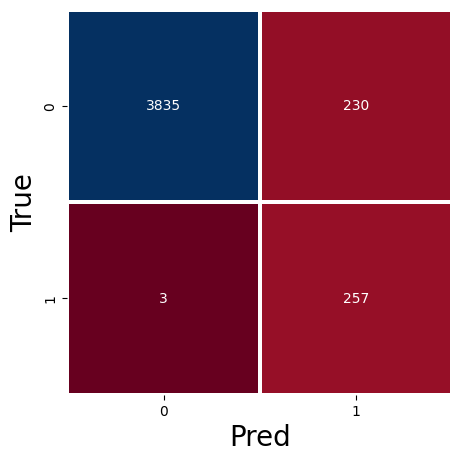

acc = 0.9461271676300578
precision = 0.5277207392197125
TPR = 0.9884615384615385
FAR = 0.056580565805658053
FRR = 0.011538461538461539


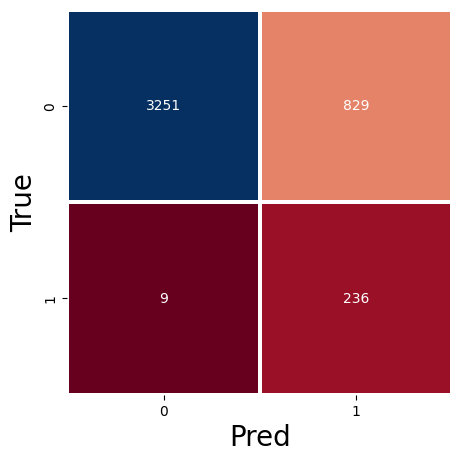

acc = 0.806242774566474
precision = 0.2215962441314554
TPR = 0.963265306122449
FAR = 0.20318627450980392
FRR = 0.036734693877551024


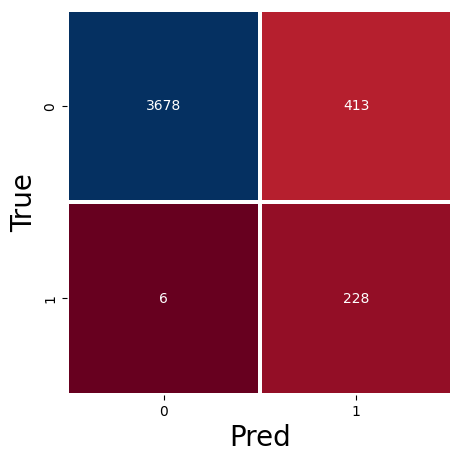

acc = 0.903121387283237
precision = 0.35569422776911075
TPR = 0.9743589743589743
FAR = 0.10095331214861893
FRR = 0.02564102564102564


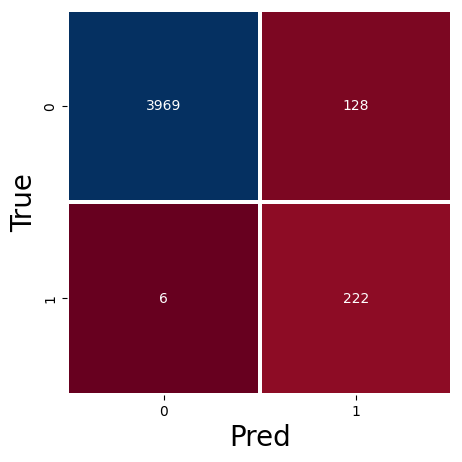

acc = 0.9690173410404624
precision = 0.6342857142857142
TPR = 0.9736842105263158
FAR = 0.031242372467659263
FRR = 0.02631578947368421


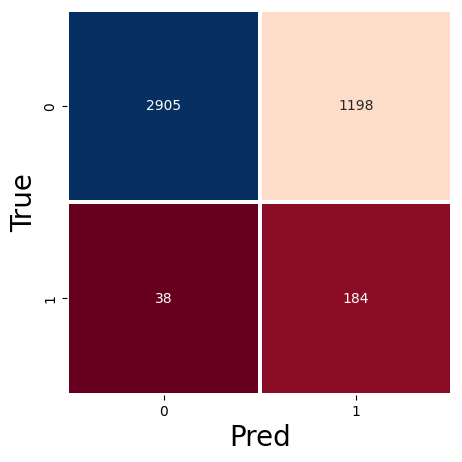

acc = 0.7142196531791908
precision = 0.13314037626628075
TPR = 0.8288288288288288
FAR = 0.29198147696807214
FRR = 0.17117117117117117


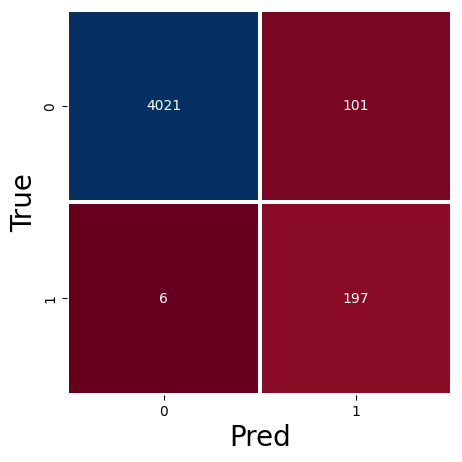

acc = 0.9752601156069364
precision = 0.6610738255033557
TPR = 0.9704433497536946
FAR = 0.024502668607472102
FRR = 0.029556650246305417


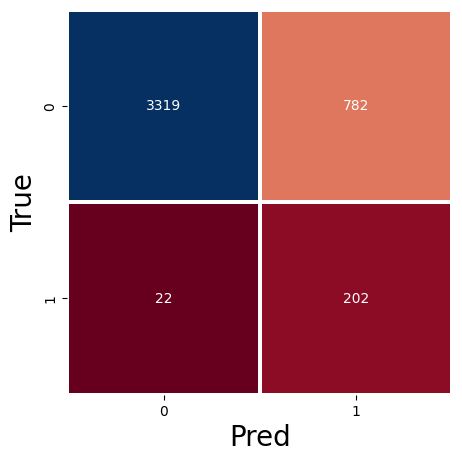

acc = 0.8141040462427745
precision = 0.20528455284552846
TPR = 0.9017857142857143
FAR = 0.1906851987320166
FRR = 0.09821428571428571


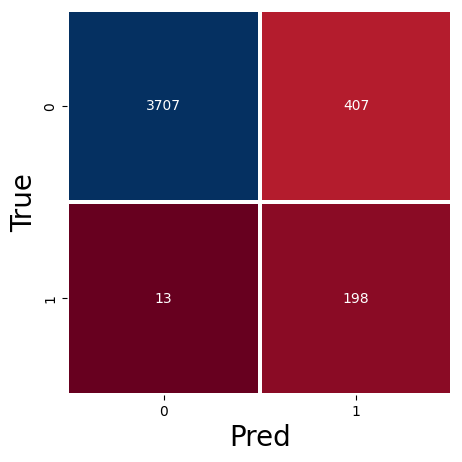

acc = 0.9028901734104047
precision = 0.32727272727272727
TPR = 0.9383886255924171
FAR = 0.09893048128342247
FRR = 0.061611374407582936


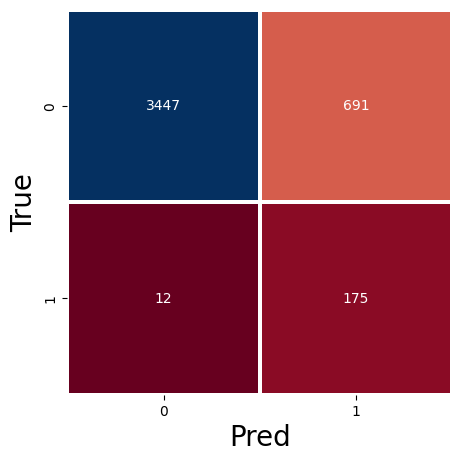

acc = 0.837456647398844
precision = 0.20207852193995382
TPR = 0.9358288770053476
FAR = 0.16698888351860802
FRR = 0.06417112299465241


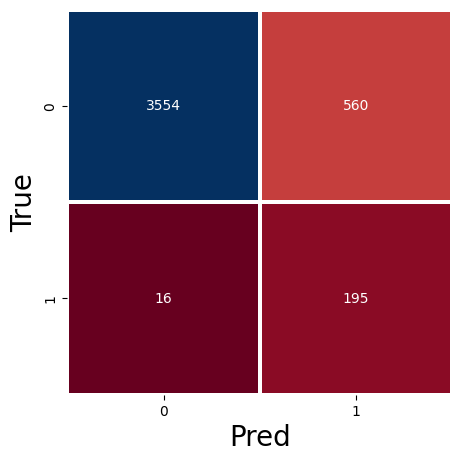

acc = 0.8668208092485549
precision = 0.2582781456953642
TPR = 0.9241706161137441
FAR = 0.13612056392805055
FRR = 0.07582938388625593


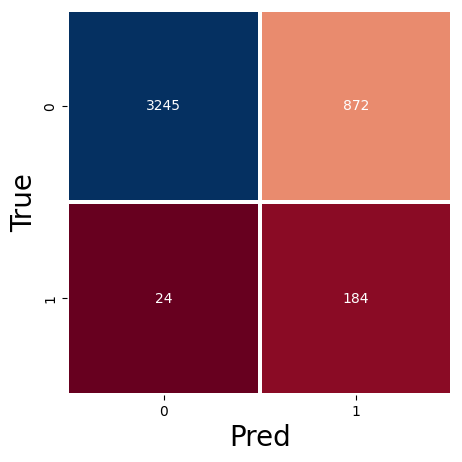

acc = 0.7928323699421965
precision = 0.17424242424242425
TPR = 0.8846153846153846
FAR = 0.21180471216905514
FRR = 0.11538461538461539


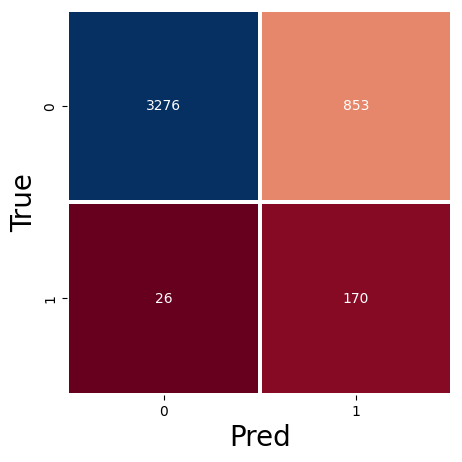

acc = 0.7967630057803469
precision = 0.16617790811339198
TPR = 0.8673469387755102
FAR = 0.20658755146524582
FRR = 0.1326530612244898


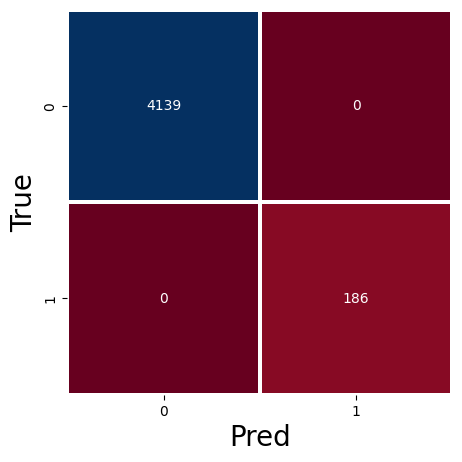

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


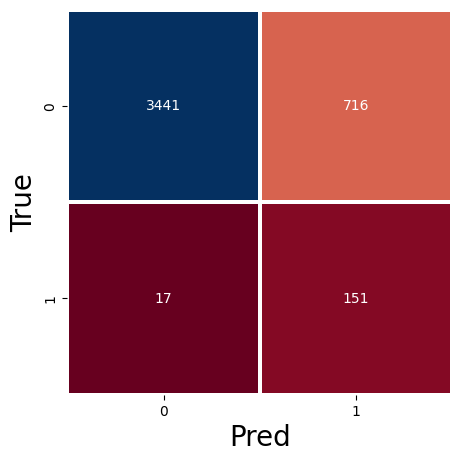

acc = 0.8305202312138729
precision = 0.17416378316032297
TPR = 0.8988095238095238
FAR = 0.17223959586240076
FRR = 0.10119047619047619


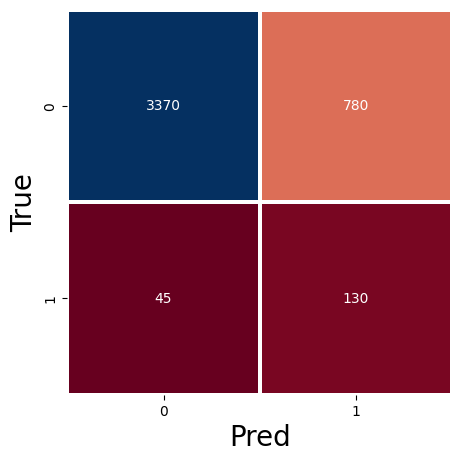

acc = 0.8092485549132948
precision = 0.14285714285714285
TPR = 0.7428571428571429
FAR = 0.18795180722891566
FRR = 0.2571428571428571


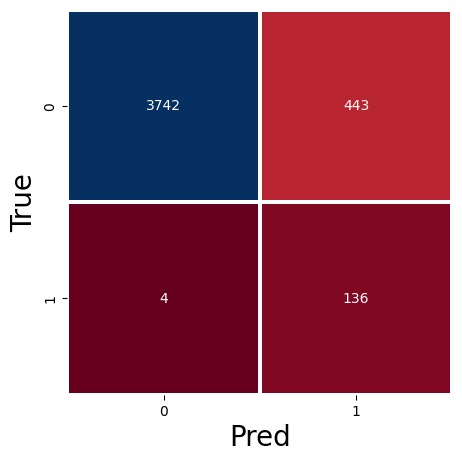

acc = 0.8966473988439306
precision = 0.23488773747841105
TPR = 0.9714285714285714
FAR = 0.1058542413381123
FRR = 0.02857142857142857


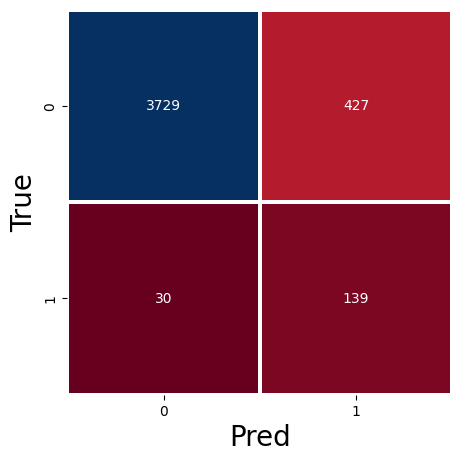

acc = 0.8943352601156069
precision = 0.24558303886925795
TPR = 0.8224852071005917
FAR = 0.10274302213666987
FRR = 0.17751479289940827


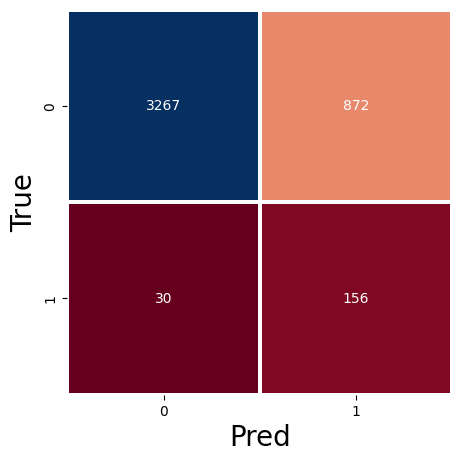

acc = 0.7914450867052023
precision = 0.1517509727626459
TPR = 0.8387096774193549
FAR = 0.2106789079487799
FRR = 0.16129032258064516


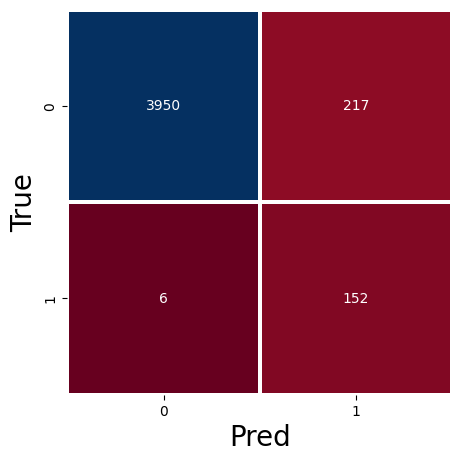

acc = 0.9484393063583815
precision = 0.41192411924119243
TPR = 0.9620253164556962
FAR = 0.05207583393328534
FRR = 0.0379746835443038


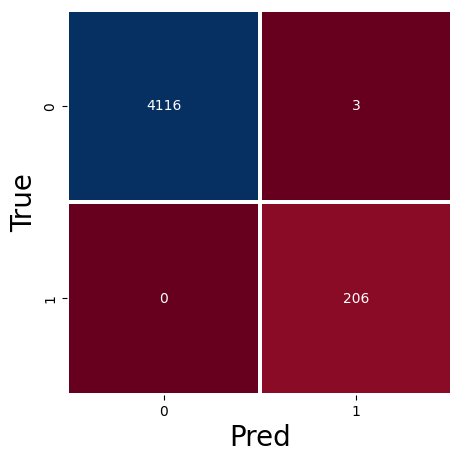

acc = 0.9993063583815028
precision = 0.9856459330143541
TPR = 1.0
FAR = 0.0007283321194464676
FRR = 0.0


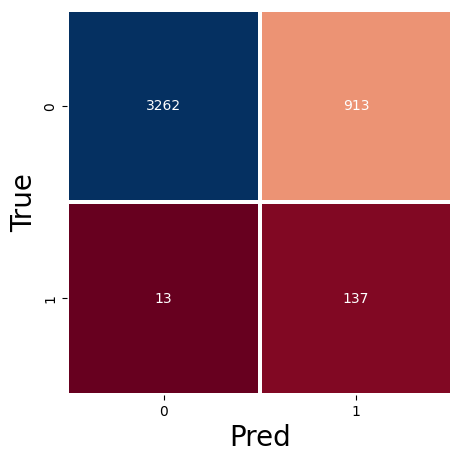

acc = 0.7858959537572254
precision = 0.13047619047619047
TPR = 0.9133333333333333
FAR = 0.21868263473053892
FRR = 0.08666666666666667


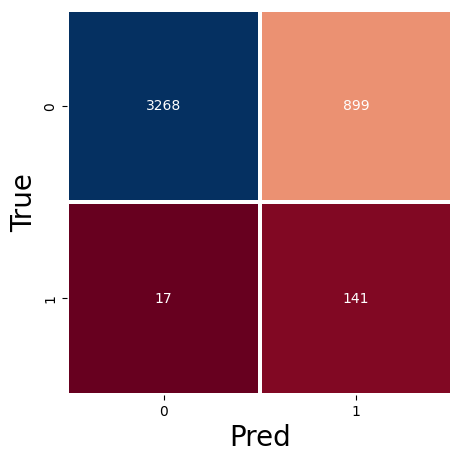

acc = 0.7882080924855491
precision = 0.13557692307692307
TPR = 0.8924050632911392
FAR = 0.21574274058075354
FRR = 0.10759493670886076
average acc = 0.8667682606410931
average precision = 0.3399868749191573
average TPR = 0.9178741909152397
average FAR = 0.13573914443102666
average FRR = 0.08212580908476035
average EER = 0.21574274058075354


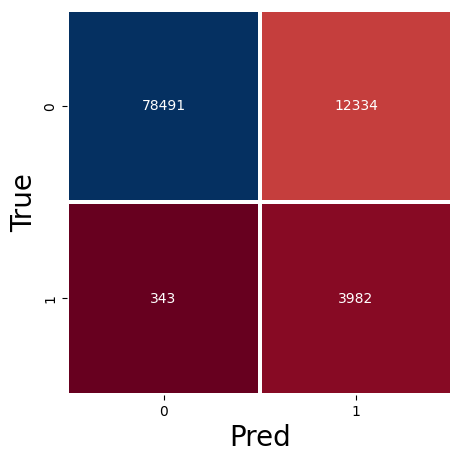

In [7]:
import pickle
#i=0
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set]
    k_fold = KFold(5, shuffle=True, random_state=42)
    
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        model = svm.SVC(kernel='rbf', C=10).fit(X_re, y_re)

        model.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = model.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set]
    
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


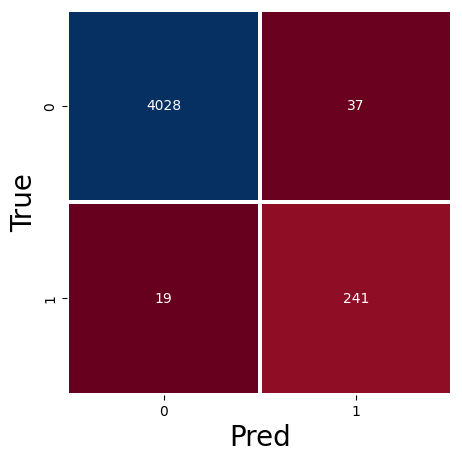

acc = 0.9870520231213873
precision = 0.8669064748201439
TPR = 0.926923076923077
FAR = 0.009102091020910209
FRR = 0.07307692307692308


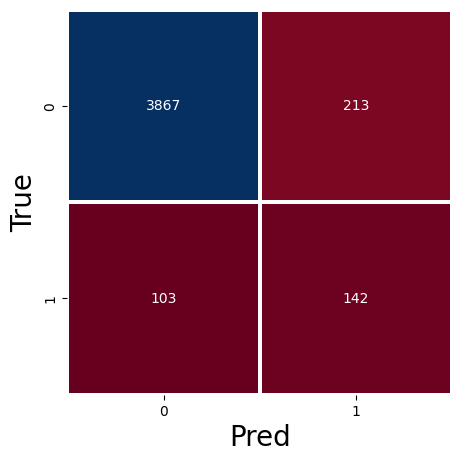

acc = 0.9269364161849711
precision = 0.4
TPR = 0.5795918367346938
FAR = 0.05220588235294118
FRR = 0.4204081632653061


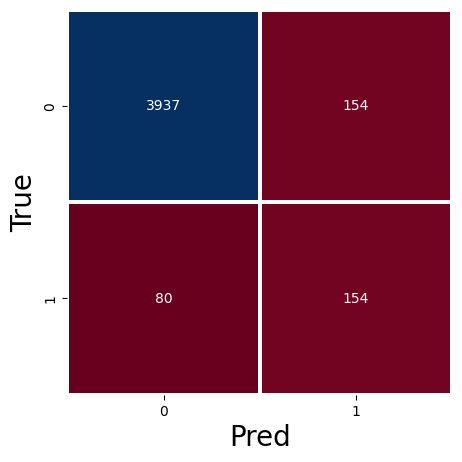

acc = 0.9458959537572255
precision = 0.5
TPR = 0.6581196581196581
FAR = 0.037643607919824004
FRR = 0.3418803418803419


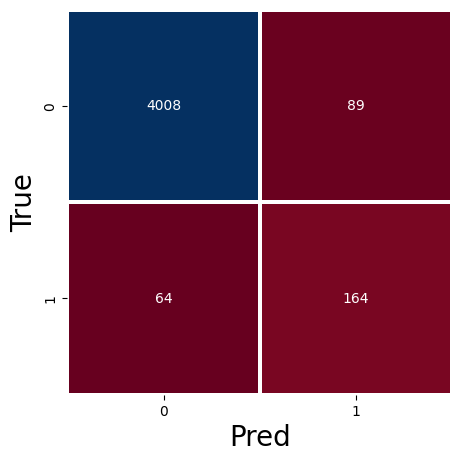

acc = 0.9646242774566474
precision = 0.6482213438735178
TPR = 0.7192982456140351
FAR = 0.02172321210641933
FRR = 0.2807017543859649


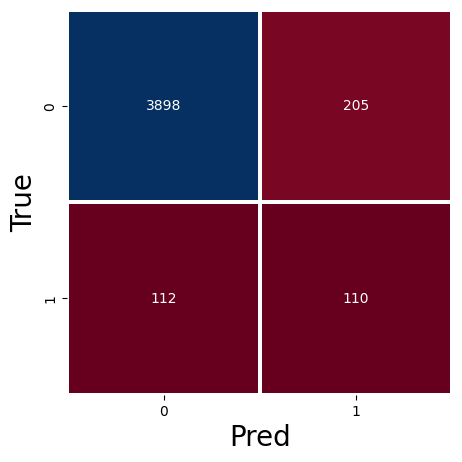

acc = 0.9267052023121387
precision = 0.3492063492063492
TPR = 0.4954954954954955
FAR = 0.049963441384352915
FRR = 0.5045045045045045


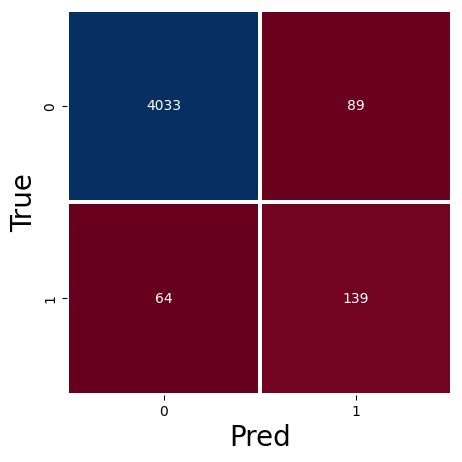

acc = 0.9646242774566474
precision = 0.6096491228070176
TPR = 0.6847290640394089
FAR = 0.021591460456089277
FRR = 0.31527093596059114


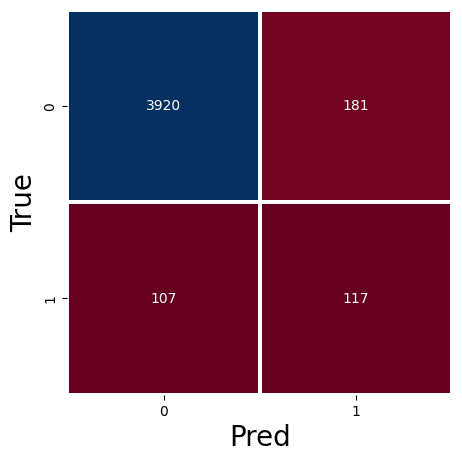

acc = 0.9334104046242775
precision = 0.3926174496644295
TPR = 0.5223214285714286
FAR = 0.04413557668861253
FRR = 0.47767857142857145


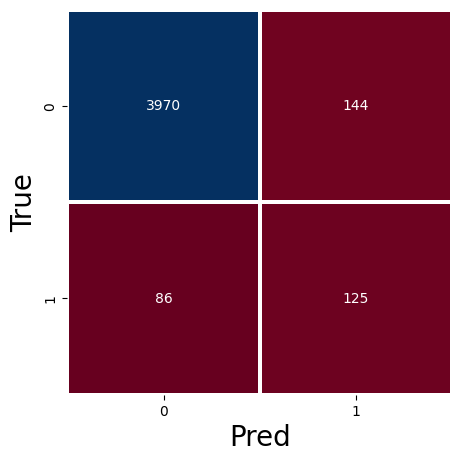

acc = 0.9468208092485549
precision = 0.4646840148698885
TPR = 0.5924170616113744
FAR = 0.03500243072435586
FRR = 0.4075829383886256


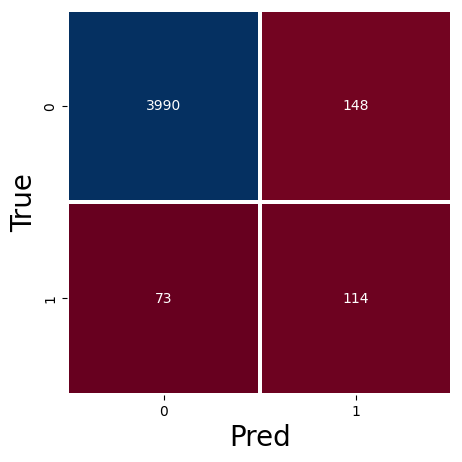

acc = 0.9489017341040462
precision = 0.4351145038167939
TPR = 0.6096256684491979
FAR = 0.035766070565490575
FRR = 0.39037433155080214


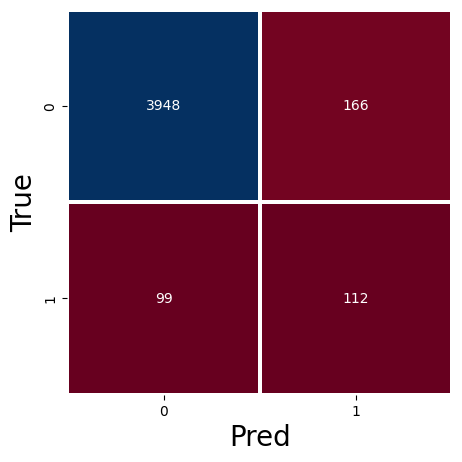

acc = 0.9387283236994219
precision = 0.4028776978417266
TPR = 0.5308056872037915
FAR = 0.040350024307243555
FRR = 0.46919431279620855


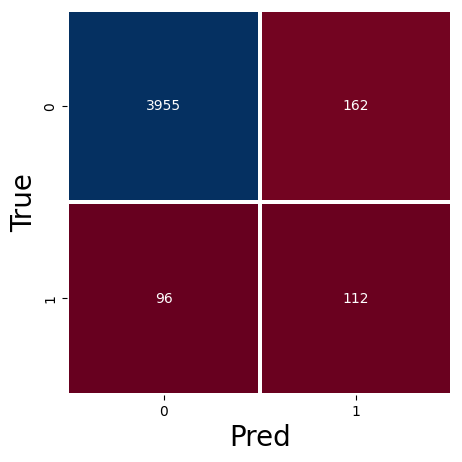

acc = 0.9403468208092486
precision = 0.40875912408759124
TPR = 0.5384615384615384
FAR = 0.039349040563517124
FRR = 0.46153846153846156


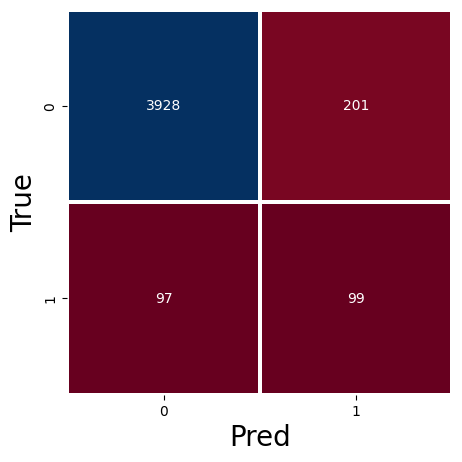

acc = 0.9310982658959538
precision = 0.33
TPR = 0.5051020408163265
FAR = 0.04868006781302979
FRR = 0.49489795918367346


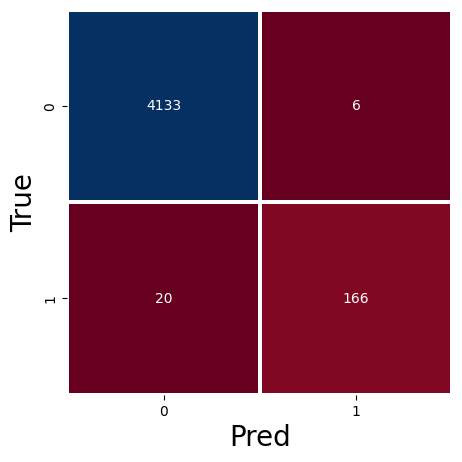

acc = 0.9939884393063584
precision = 0.9651162790697675
TPR = 0.8924731182795699
FAR = 0.001449625513409036
FRR = 0.10752688172043011


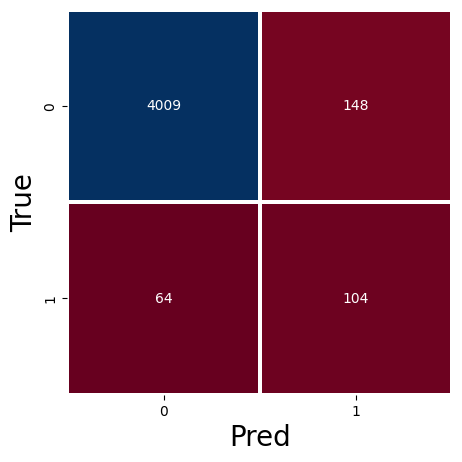

acc = 0.9509826589595376
precision = 0.4126984126984127
TPR = 0.6190476190476191
FAR = 0.035602598027423625
FRR = 0.38095238095238093


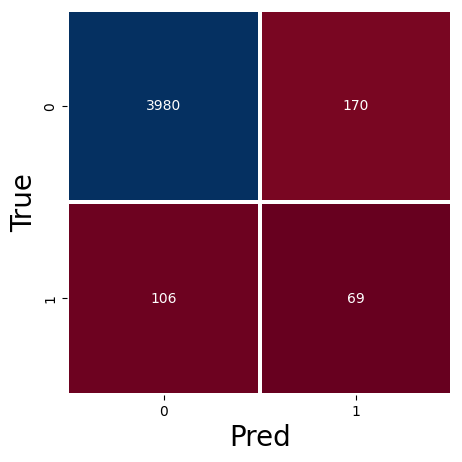

acc = 0.9361849710982659
precision = 0.28870292887029286
TPR = 0.3942857142857143
FAR = 0.04096385542168675
FRR = 0.6057142857142858


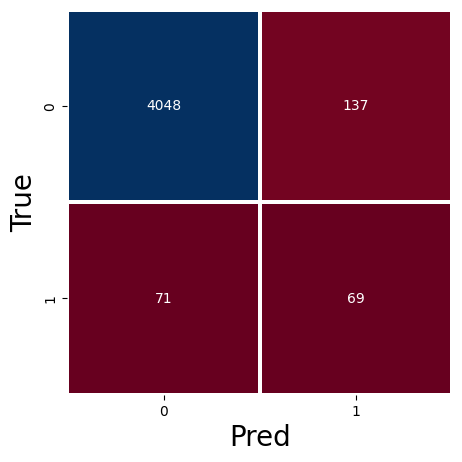

acc = 0.9519075144508671
precision = 0.33495145631067963
TPR = 0.4928571428571429
FAR = 0.032735961768219836
FRR = 0.5071428571428571


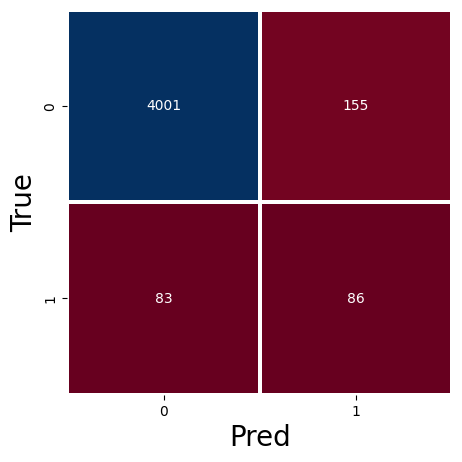

acc = 0.944971098265896
precision = 0.35684647302904565
TPR = 0.5088757396449705
FAR = 0.037295476419634266
FRR = 0.4911242603550296


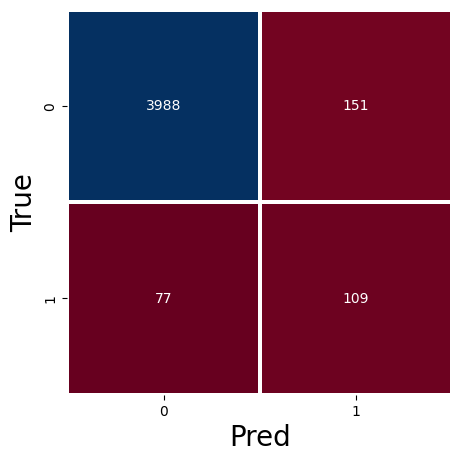

acc = 0.9472832369942197
precision = 0.41923076923076924
TPR = 0.5860215053763441
FAR = 0.03648224208746074
FRR = 0.41397849462365593


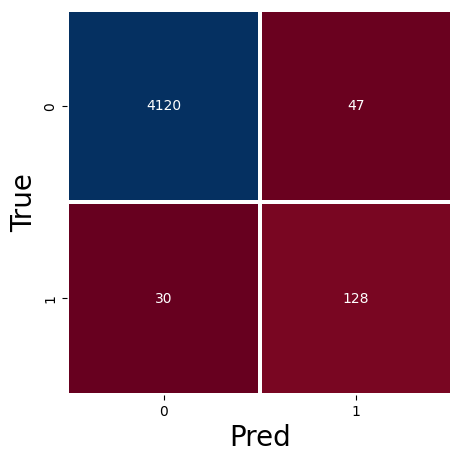

acc = 0.9821965317919075
precision = 0.7314285714285714
TPR = 0.810126582278481
FAR = 0.011279097672186225
FRR = 0.189873417721519


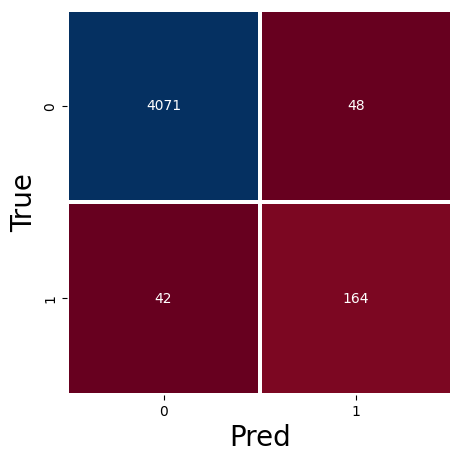

acc = 0.9791907514450867
precision = 0.7735849056603774
TPR = 0.7961165048543689
FAR = 0.011653313911143482
FRR = 0.20388349514563106


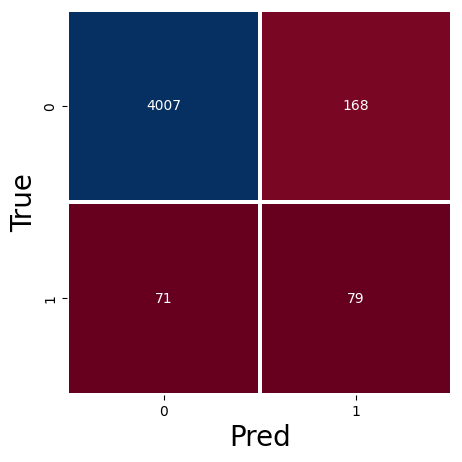

acc = 0.9447398843930636
precision = 0.31983805668016196
TPR = 0.5266666666666666
FAR = 0.040239520958083835
FRR = 0.47333333333333333


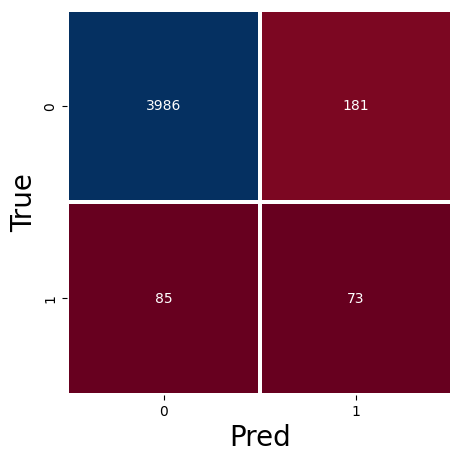

acc = 0.9384971098265896
precision = 0.2874015748031496
TPR = 0.4620253164556962
FAR = 0.04343652507799376
FRR = 0.5379746835443038
average acc = 0.9511403047819232
average precision = 0.4862652503985766
average TPR = 0.6114266687175728
average FAR = 0.03302959648909218
average FRR = 0.3885733312824273
average EER = 0.04343652507799376


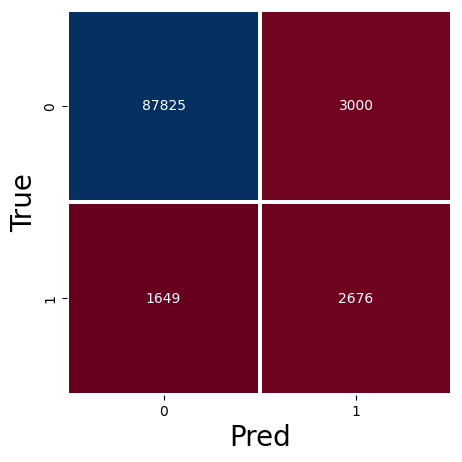

In [8]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        knn = KNeighborsClassifier(n_neighbors=2)

        knn.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = knn.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


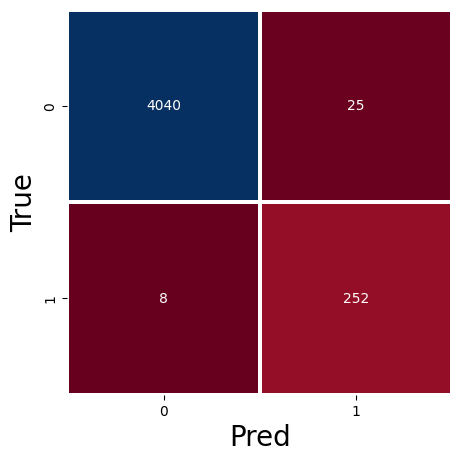

acc = 0.9923699421965317
precision = 0.9097472924187726
TPR = 0.9692307692307692
FAR = 0.006150061500615006
FRR = 0.03076923076923077


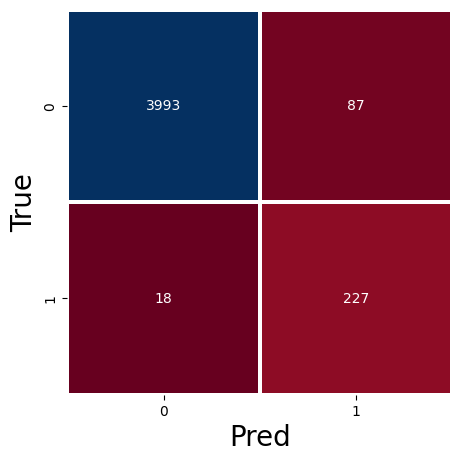

acc = 0.9757225433526011
precision = 0.7229299363057324
TPR = 0.926530612244898
FAR = 0.021323529411764706
FRR = 0.07346938775510205


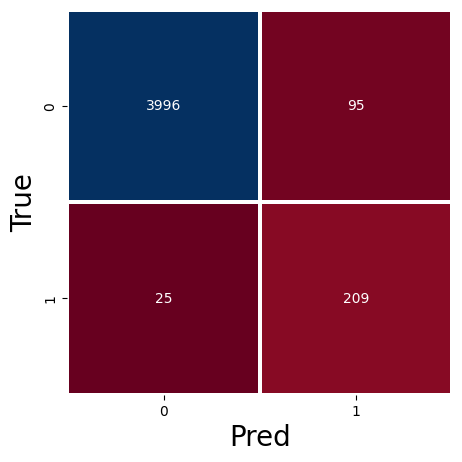

acc = 0.9722543352601156
precision = 0.6875
TPR = 0.8931623931623932
FAR = 0.023221706184307016
FRR = 0.10683760683760683


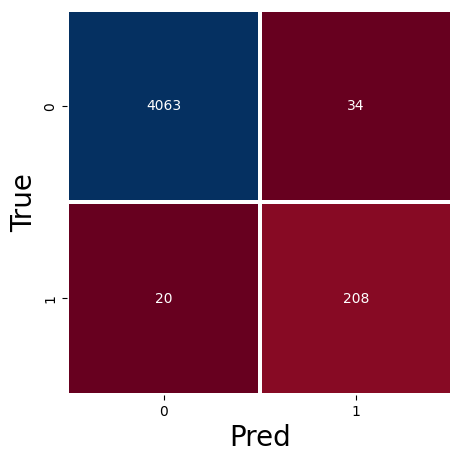

acc = 0.987514450867052
precision = 0.859504132231405
TPR = 0.9122807017543859
FAR = 0.008298755186721992
FRR = 0.08771929824561403


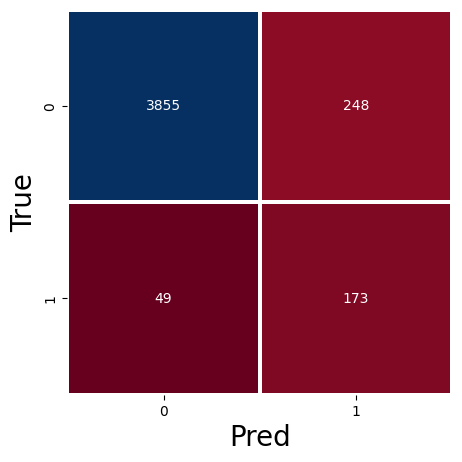

acc = 0.9313294797687861
precision = 0.41092636579572445
TPR = 0.7792792792792793
FAR = 0.06044357786985133
FRR = 0.22072072072072071


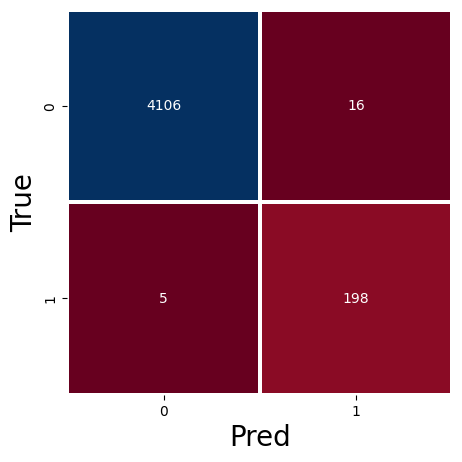

acc = 0.9951445086705202
precision = 0.9252336448598131
TPR = 0.9753694581280788
FAR = 0.0038816108685104317
FRR = 0.024630541871921183


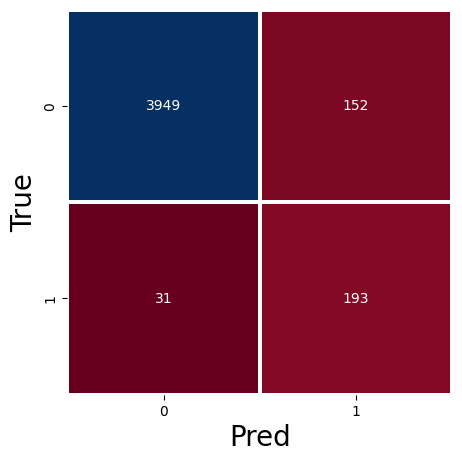

acc = 0.9576878612716763
precision = 0.5594202898550724
TPR = 0.8616071428571429
FAR = 0.03706413069982931
FRR = 0.13839285714285715


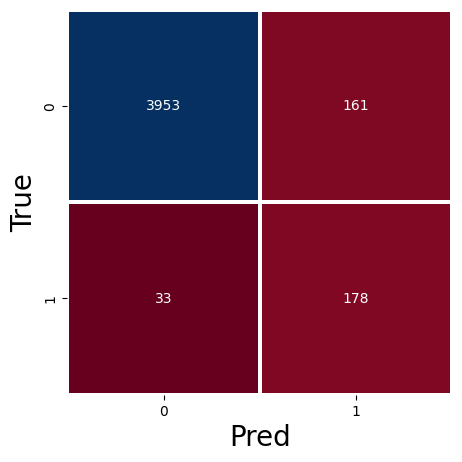

acc = 0.9551445086705203
precision = 0.5250737463126843
TPR = 0.8436018957345972
FAR = 0.03913466212931454
FRR = 0.15639810426540285


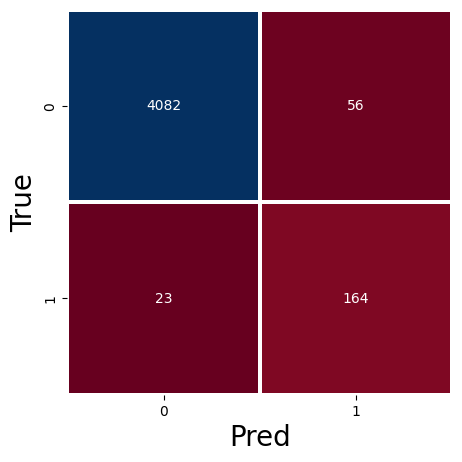

acc = 0.9817341040462427
precision = 0.7454545454545455
TPR = 0.8770053475935828
FAR = 0.013533107781536975
FRR = 0.12299465240641712


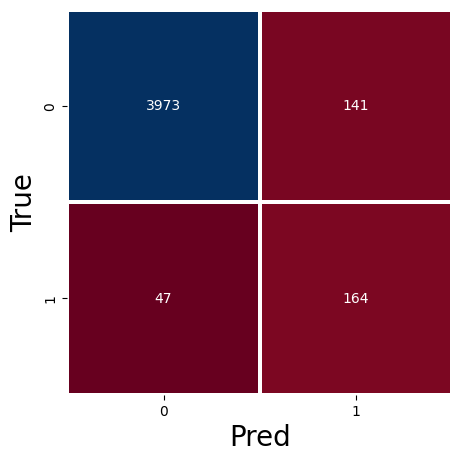

acc = 0.9565317919075145
precision = 0.5377049180327869
TPR = 0.7772511848341233
FAR = 0.034273213417598446
FRR = 0.22274881516587677


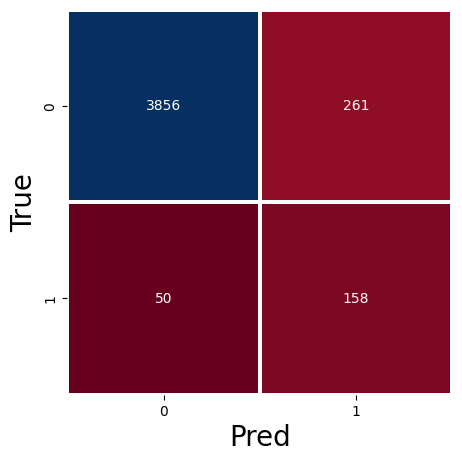

acc = 0.9280924855491329
precision = 0.37708830548926014
TPR = 0.7596153846153846
FAR = 0.06339567646344425
FRR = 0.2403846153846154


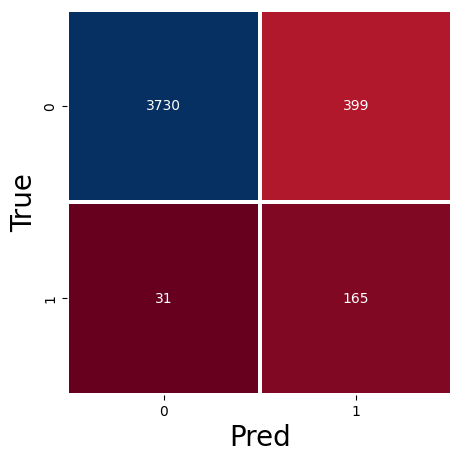

acc = 0.900578034682081
precision = 0.2925531914893617
TPR = 0.8418367346938775
FAR = 0.0966335674497457
FRR = 0.15816326530612246


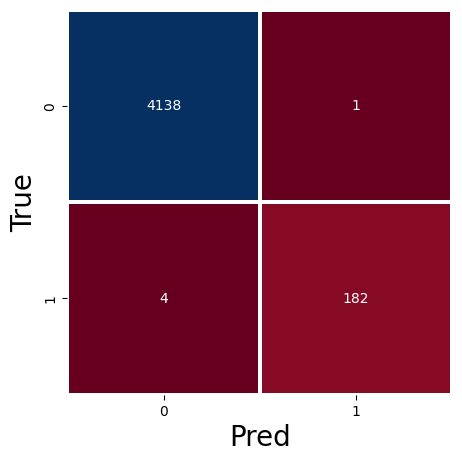

acc = 0.9988439306358381
precision = 0.994535519125683
TPR = 0.978494623655914
FAR = 0.00024160425223483932
FRR = 0.021505376344086023


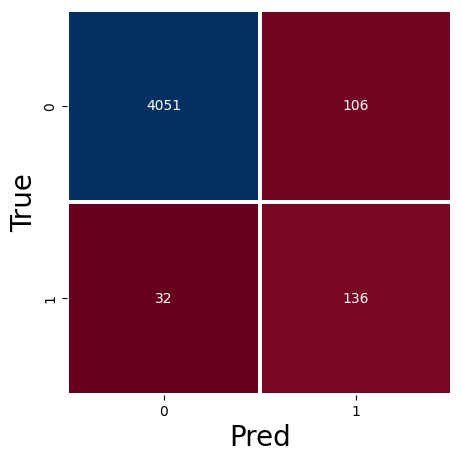

acc = 0.968092485549133
precision = 0.5619834710743802
TPR = 0.8095238095238095
FAR = 0.02549915804666827
FRR = 0.19047619047619047


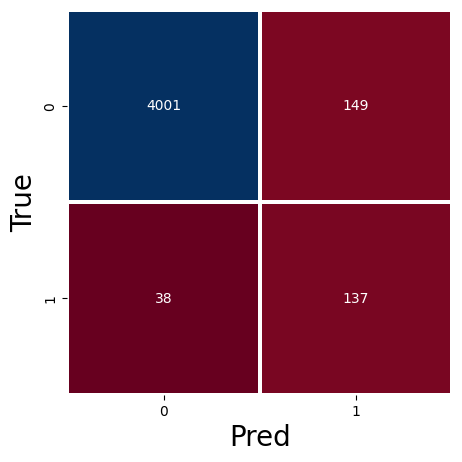

acc = 0.9567630057803468
precision = 0.479020979020979
TPR = 0.7828571428571428
FAR = 0.03590361445783133
FRR = 0.21714285714285714


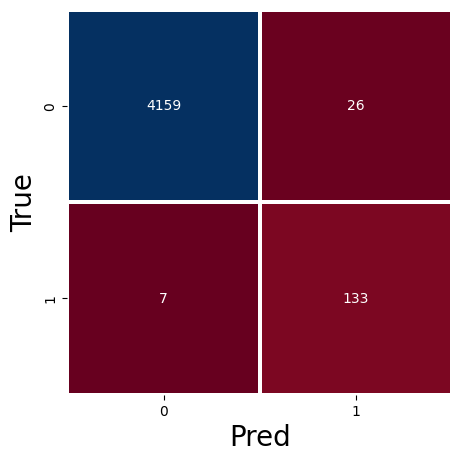

acc = 0.9923699421965317
precision = 0.8364779874213837
TPR = 0.95
FAR = 0.006212664277180406
FRR = 0.05


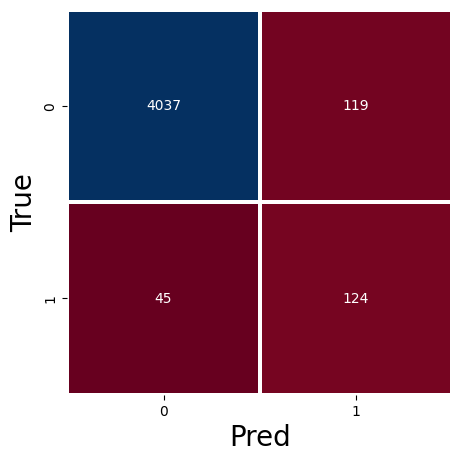

acc = 0.9620809248554913
precision = 0.5102880658436214
TPR = 0.7337278106508875
FAR = 0.02863330125120308
FRR = 0.26627218934911245


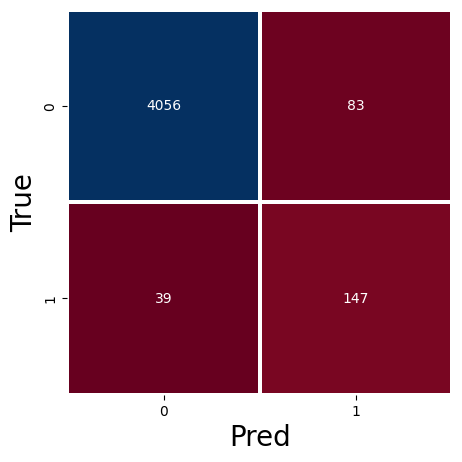

acc = 0.9717919075144509
precision = 0.6391304347826087
TPR = 0.7903225806451613
FAR = 0.020053152935491664
FRR = 0.20967741935483872


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


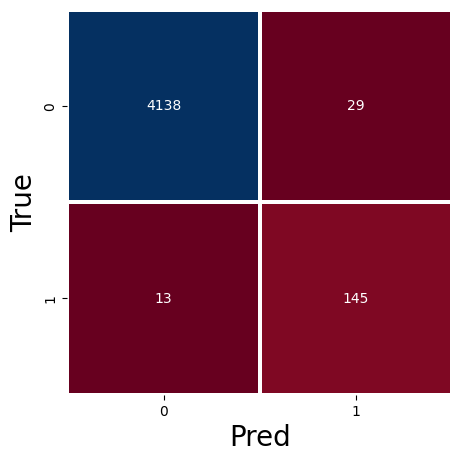

acc = 0.9902890173410405
precision = 0.8333333333333334
TPR = 0.9177215189873418
FAR = 0.0069594432445404366
FRR = 0.08227848101265822


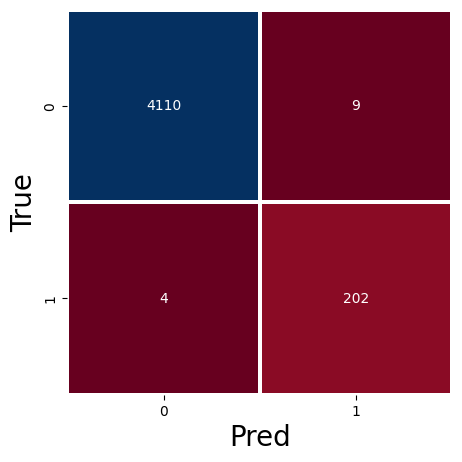

acc = 0.9969942196531791
precision = 0.957345971563981
TPR = 0.9805825242718447
FAR = 0.0021849963583394027
FRR = 0.019417475728155338


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


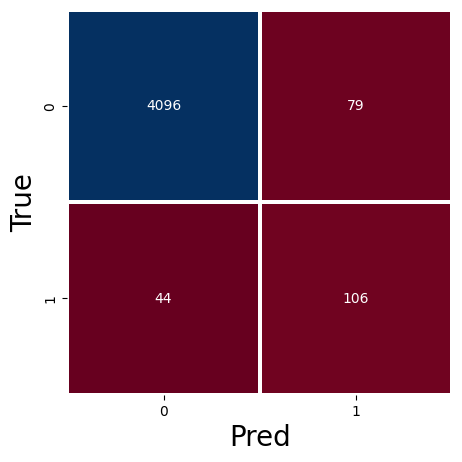

acc = 0.9715606936416185
precision = 0.572972972972973
TPR = 0.7066666666666667
FAR = 0.018922155688622756
FRR = 0.29333333333333333


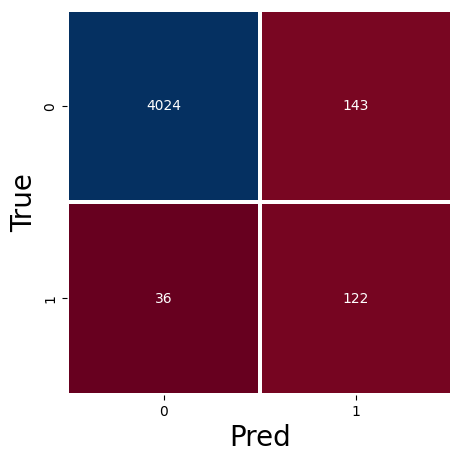

acc = 0.9586127167630057
precision = 0.46037735849056605
TPR = 0.7721518987341772
FAR = 0.03431725461963043
FRR = 0.22784810126582278
average acc = 0.9682501313715186
average precision = 0.6544819300852123
average TPR = 0.8563099763691572
average FAR = 0.026649133822499196
average FRR = 0.14369002363084277
average EER = 0.03431725461963043


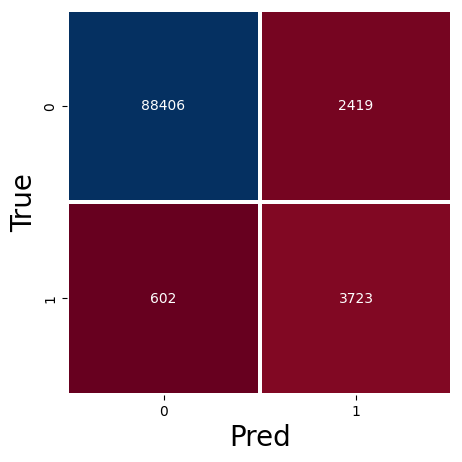

In [9]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        MLP = MLPClassifier(hidden_layer_sizes=(100,10))

        MLP.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = MLP.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


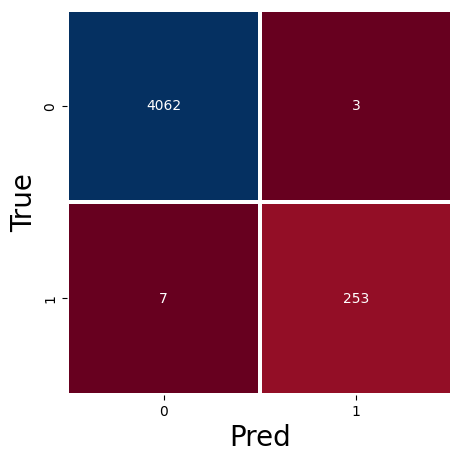

acc = 0.9976878612716763
precision = 0.98828125
TPR = 0.9730769230769231
FAR = 0.0007380073800738007
FRR = 0.026923076923076925


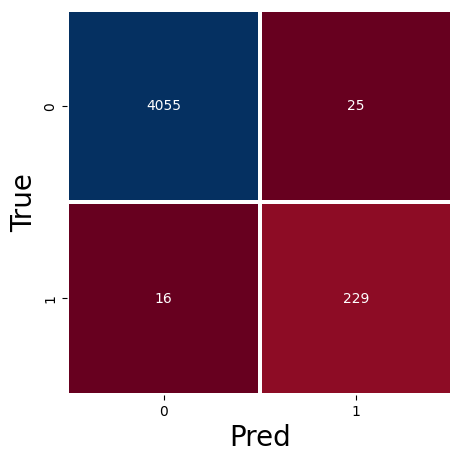

acc = 0.9905202312138728
precision = 0.9015748031496063
TPR = 0.9346938775510204
FAR = 0.006127450980392157
FRR = 0.0653061224489796


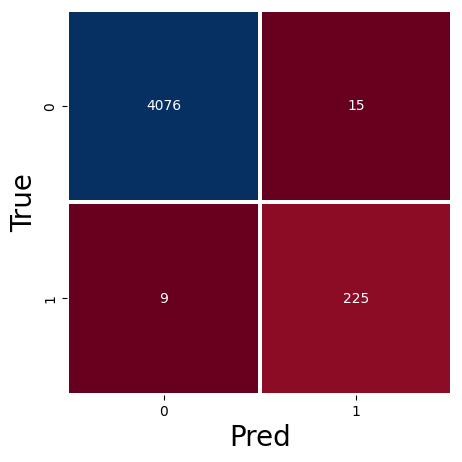

acc = 0.9944508670520231
precision = 0.9375
TPR = 0.9615384615384616
FAR = 0.0036665851869958446
FRR = 0.038461538461538464


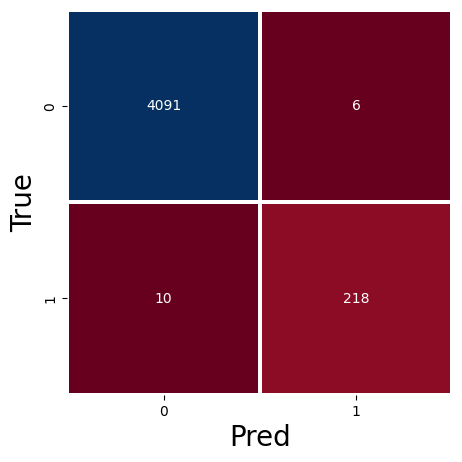

acc = 0.9963005780346821
precision = 0.9732142857142857
TPR = 0.956140350877193
FAR = 0.001464486209421528
FRR = 0.043859649122807015


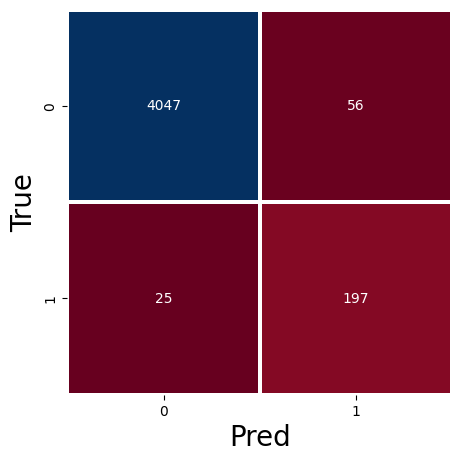

acc = 0.981271676300578
precision = 0.7786561264822134
TPR = 0.8873873873873874
FAR = 0.013648549841579332
FRR = 0.11261261261261261


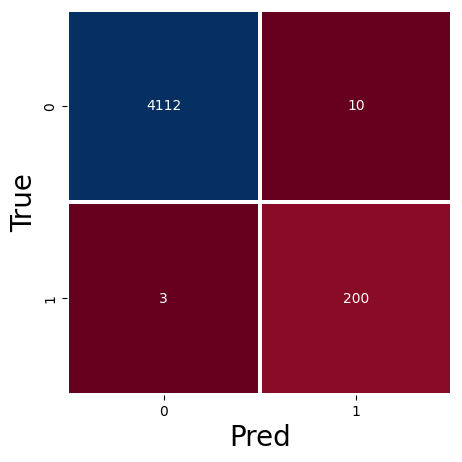

acc = 0.9969942196531791
precision = 0.9523809523809523
TPR = 0.9852216748768473
FAR = 0.0024260067928190197
FRR = 0.014778325123152709


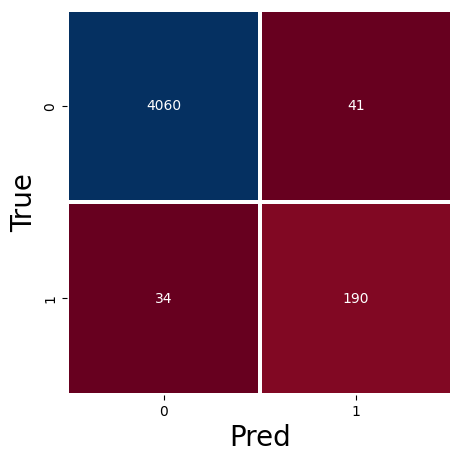

acc = 0.9826589595375722
precision = 0.8225108225108225
TPR = 0.8482142857142857
FAR = 0.009997561570348696
FRR = 0.15178571428571427


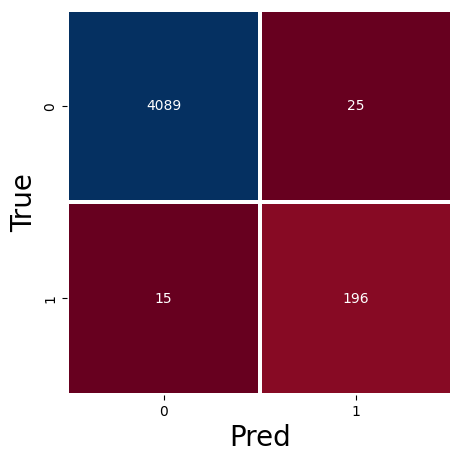

acc = 0.9907514450867052
precision = 0.8868778280542986
TPR = 0.9289099526066351
FAR = 0.006076810889645114
FRR = 0.07109004739336493


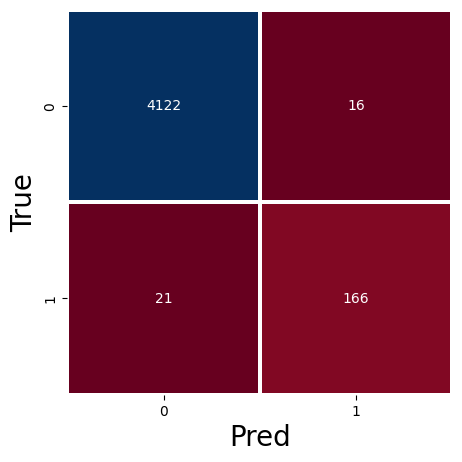

acc = 0.9914450867052023
precision = 0.9120879120879121
TPR = 0.8877005347593583
FAR = 0.0038666022232962784
FRR = 0.11229946524064172


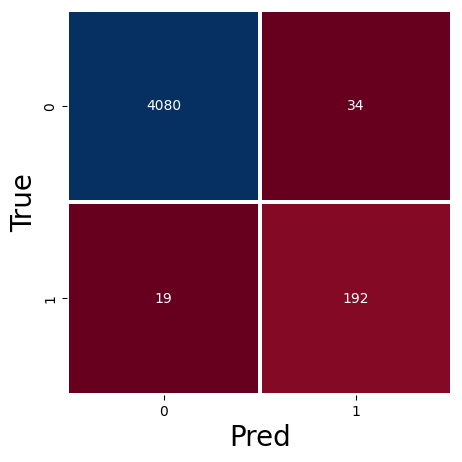

acc = 0.9877456647398843
precision = 0.8495575221238938
TPR = 0.909952606635071
FAR = 0.008264462809917356
FRR = 0.09004739336492891


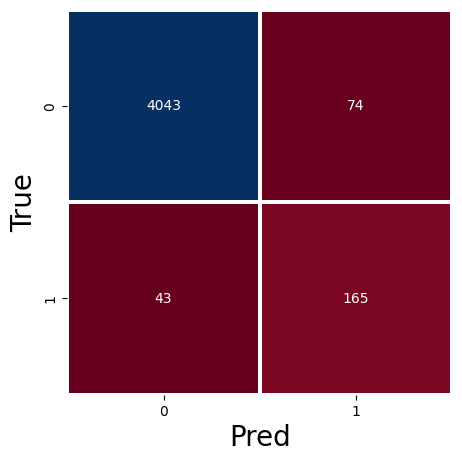

acc = 0.9729479768786127
precision = 0.6903765690376569
TPR = 0.7932692307692307
FAR = 0.01797425309691523
FRR = 0.20673076923076922


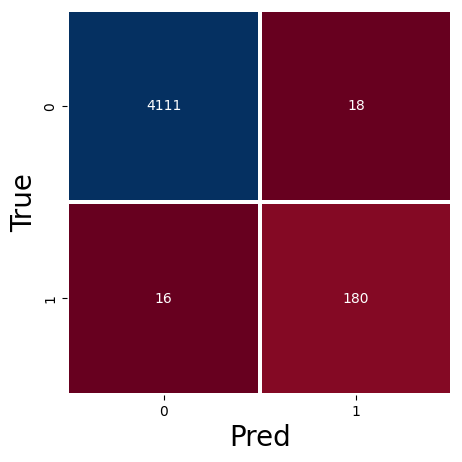

acc = 0.9921387283236994
precision = 0.9090909090909091
TPR = 0.9183673469387755
FAR = 0.004359409057883265
FRR = 0.08163265306122448


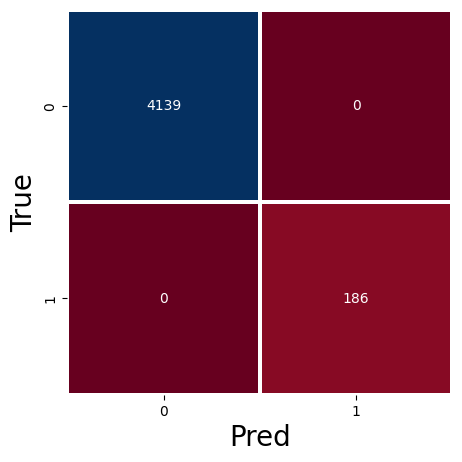

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


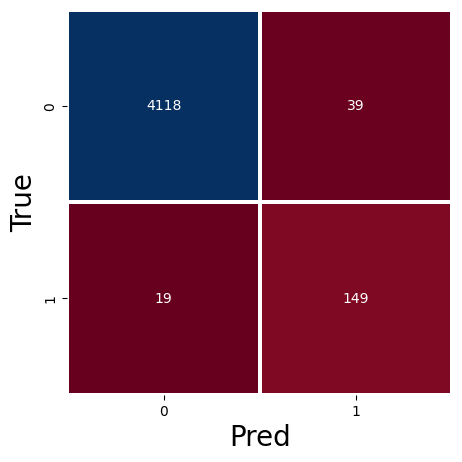

acc = 0.9865895953757226
precision = 0.7925531914893617
TPR = 0.8869047619047619
FAR = 0.009381765696415684
FRR = 0.1130952380952381


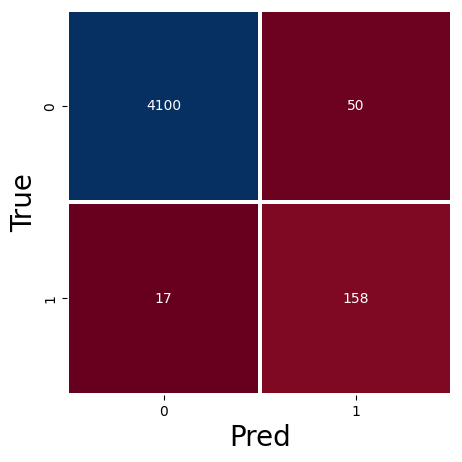

acc = 0.9845086705202312
precision = 0.7596153846153846
TPR = 0.9028571428571428
FAR = 0.012048192771084338
FRR = 0.09714285714285714


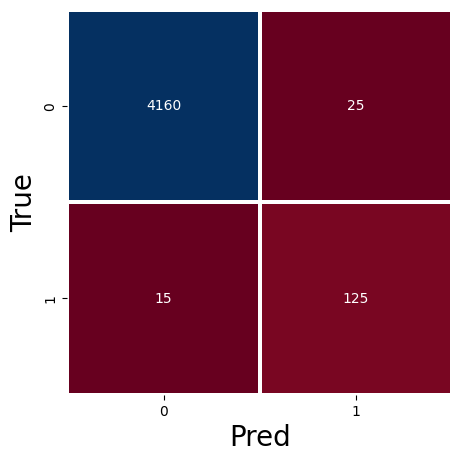

acc = 0.9907514450867052
precision = 0.8333333333333334
TPR = 0.8928571428571429
FAR = 0.005973715651135006
FRR = 0.10714285714285714


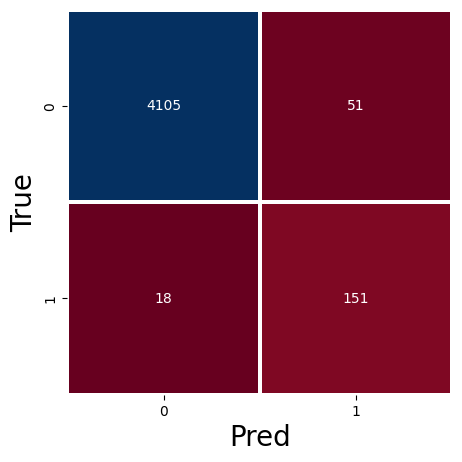

acc = 0.9840462427745664
precision = 0.7475247524752475
TPR = 0.893491124260355
FAR = 0.012271414821944177
FRR = 0.10650887573964497


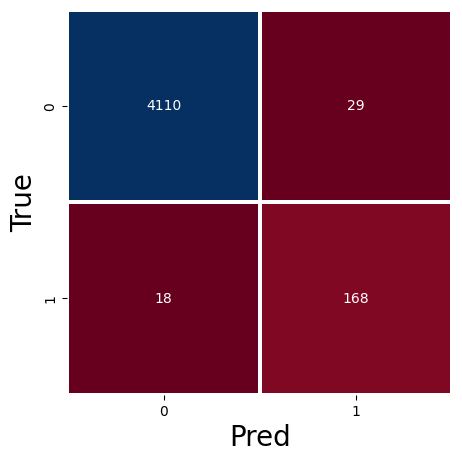

acc = 0.9891329479768786
precision = 0.8527918781725888
TPR = 0.9032258064516129
FAR = 0.007006523314810341
FRR = 0.0967741935483871


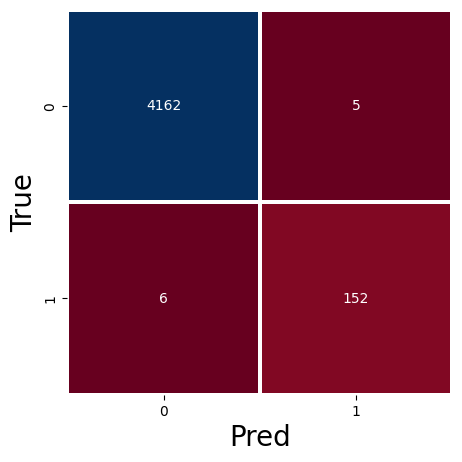

acc = 0.9974566473988439
precision = 0.9681528662420382
TPR = 0.9620253164556962
FAR = 0.0011999040076793857
FRR = 0.0379746835443038


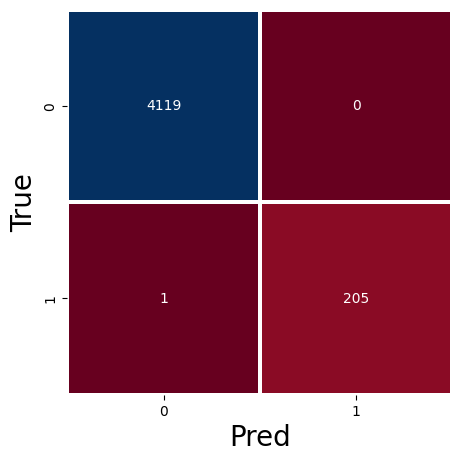

acc = 0.9997687861271676
precision = 1.0
TPR = 0.9951456310679612
FAR = 0.0
FRR = 0.0048543689320388345


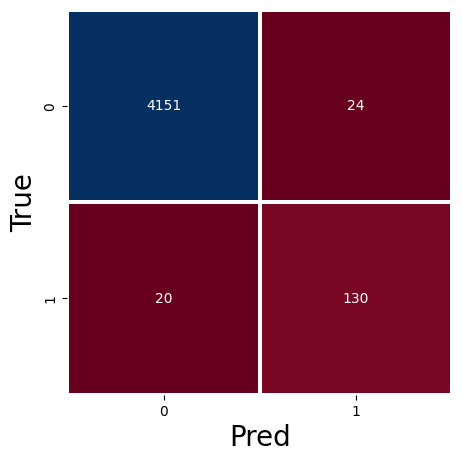

acc = 0.9898265895953757
precision = 0.8441558441558441
TPR = 0.8666666666666667
FAR = 0.005748502994011976
FRR = 0.13333333333333333


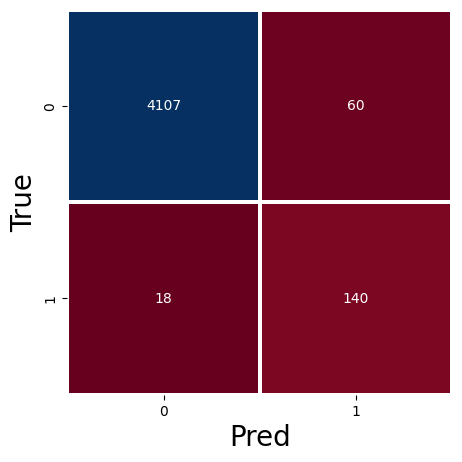

acc = 0.9819653179190752
precision = 0.7
TPR = 0.8860759493670886
FAR = 0.014398848092152628
FRR = 0.11392405063291139
average acc = 0.9899527062532841
average precision = 0.8681925559598338
average TPR = 0.9169873715736189
average FAR = 0.006665411517660053
average FRR = 0.08301262842638103
average EER = 0.014398848092152628


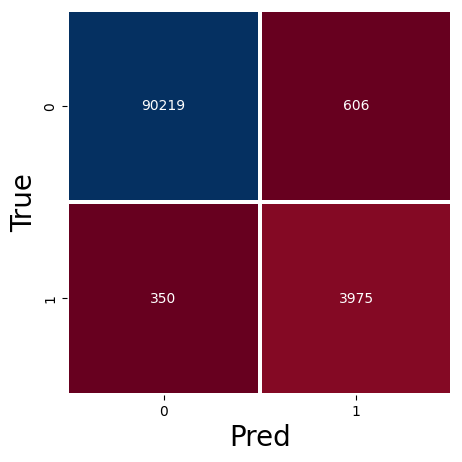

In [10]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        DT = DecisionTreeClassifier(criterion='entropy')

        DT.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = DT.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


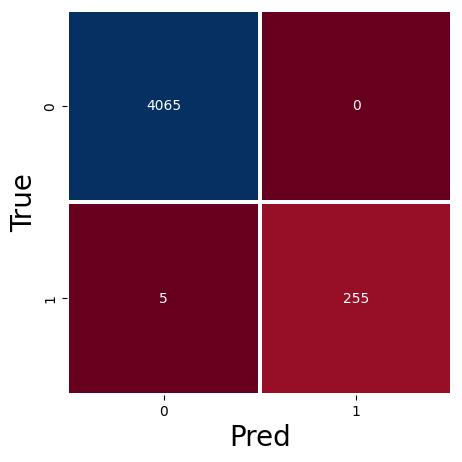

acc = 0.9988439306358381
precision = 1.0
TPR = 0.9807692307692307
FAR = 0.0
FRR = 0.019230769230769232


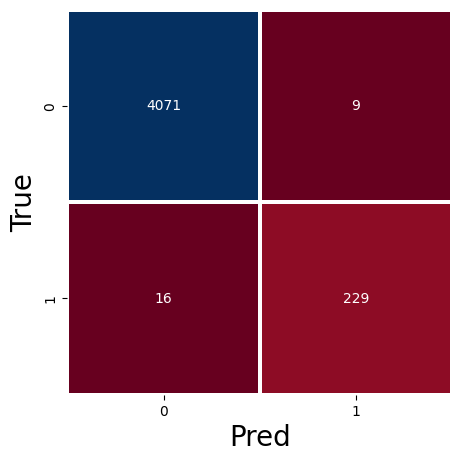

acc = 0.9942196531791907
precision = 0.9621848739495799
TPR = 0.9346938775510204
FAR = 0.0022058823529411764
FRR = 0.0653061224489796


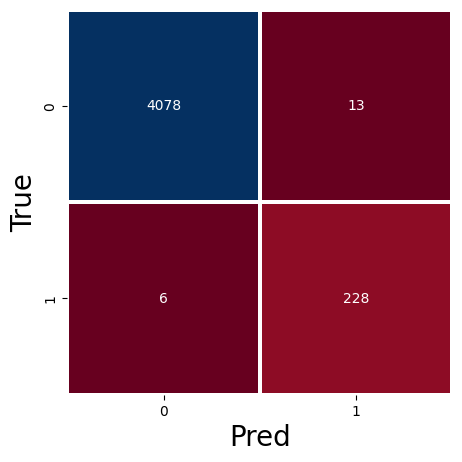

acc = 0.9956069364161849
precision = 0.946058091286307
TPR = 0.9743589743589743
FAR = 0.0031777071620630653
FRR = 0.02564102564102564


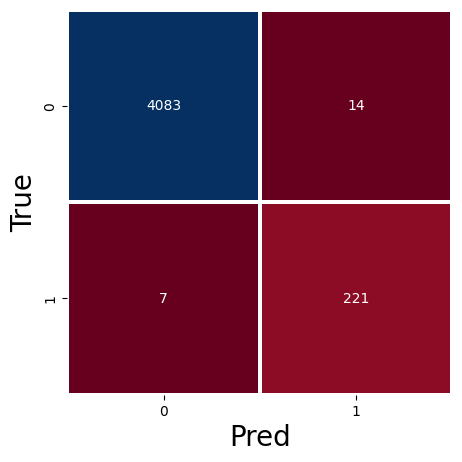

acc = 0.9951445086705202
precision = 0.9404255319148936
TPR = 0.9692982456140351
FAR = 0.003417134488650232
FRR = 0.03070175438596491


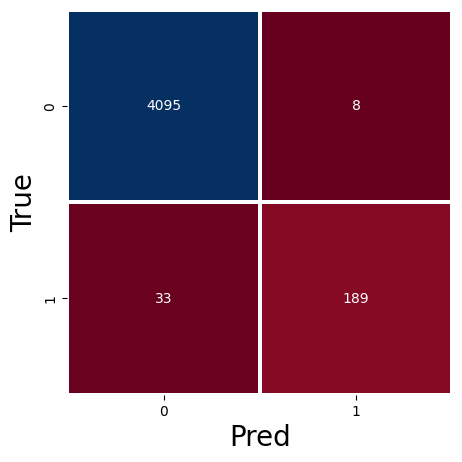

acc = 0.9905202312138728
precision = 0.9593908629441624
TPR = 0.8513513513513513
FAR = 0.0019497928345113332
FRR = 0.14864864864864866


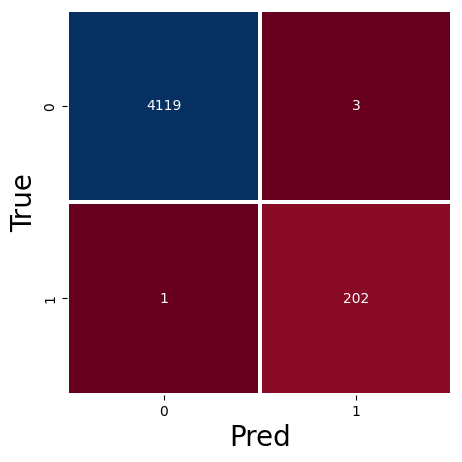

acc = 0.9990751445086705
precision = 0.9853658536585366
TPR = 0.9950738916256158
FAR = 0.000727802037845706
FRR = 0.0049261083743842365


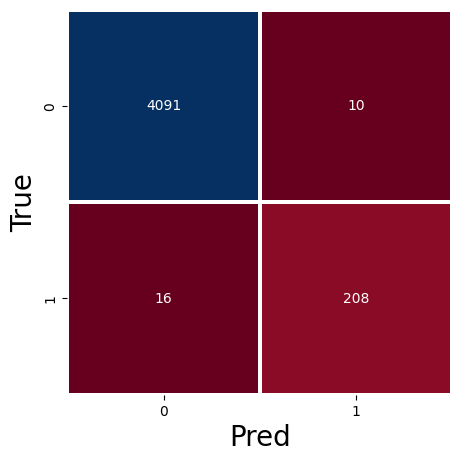

acc = 0.9939884393063584
precision = 0.9541284403669725
TPR = 0.9285714285714286
FAR = 0.00243842965130456
FRR = 0.07142857142857142


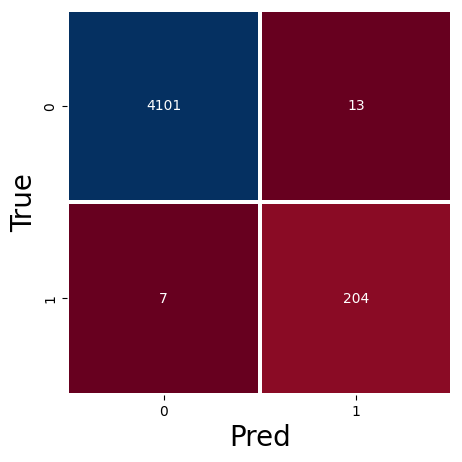

acc = 0.9953757225433526
precision = 0.9400921658986175
TPR = 0.966824644549763
FAR = 0.0031599416626154593
FRR = 0.03317535545023697


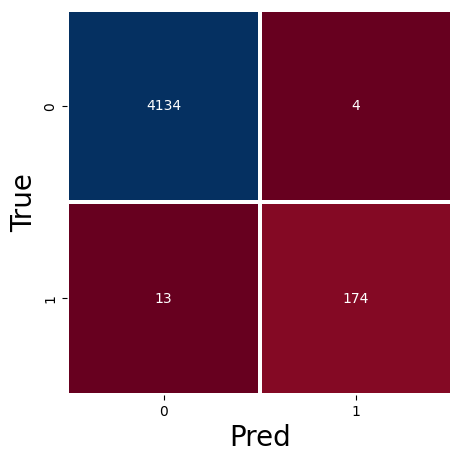

acc = 0.9960693641618497
precision = 0.9775280898876404
TPR = 0.93048128342246
FAR = 0.0009666505558240696
FRR = 0.06951871657754011


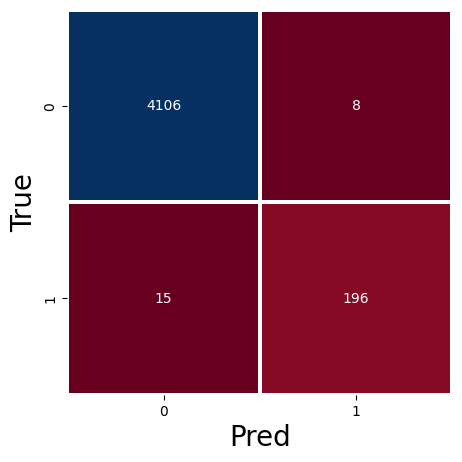

acc = 0.9946820809248554
precision = 0.9607843137254902
TPR = 0.9289099526066351
FAR = 0.0019445794846864365
FRR = 0.07109004739336493


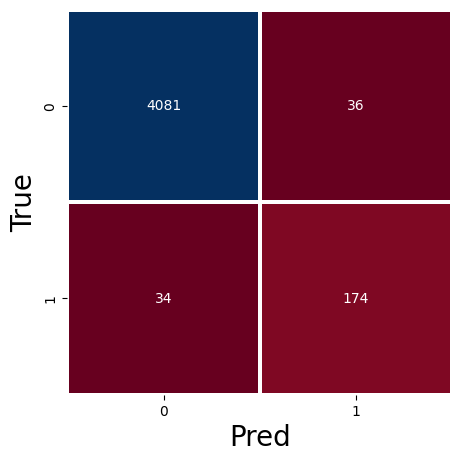

acc = 0.9838150289017341
precision = 0.8285714285714286
TPR = 0.8365384615384616
FAR = 0.008744231236337139
FRR = 0.16346153846153846


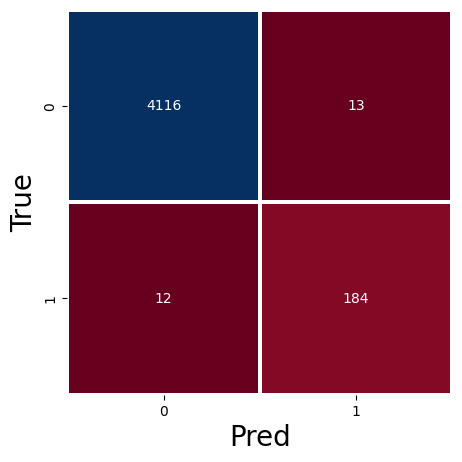

acc = 0.9942196531791907
precision = 0.934010152284264
TPR = 0.9387755102040817
FAR = 0.0031484620973601355
FRR = 0.061224489795918366


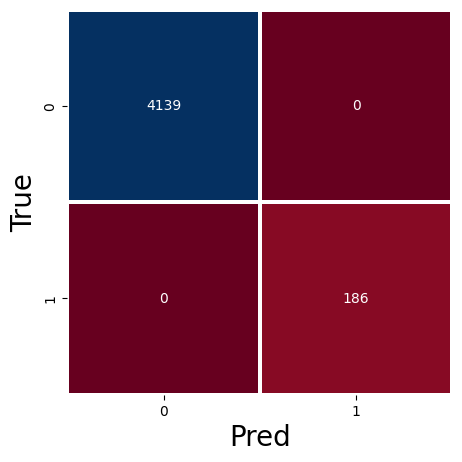

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


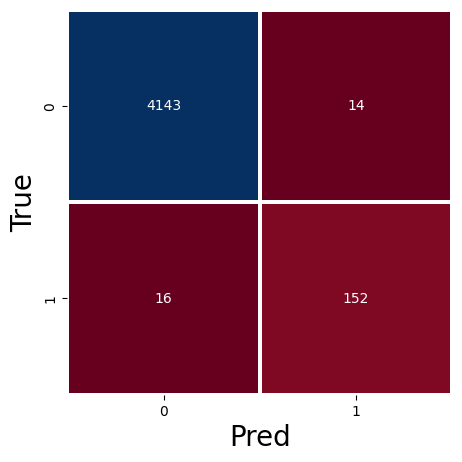

acc = 0.9930635838150289
precision = 0.9156626506024096
TPR = 0.9047619047619048
FAR = 0.003367813326918451
FRR = 0.09523809523809523


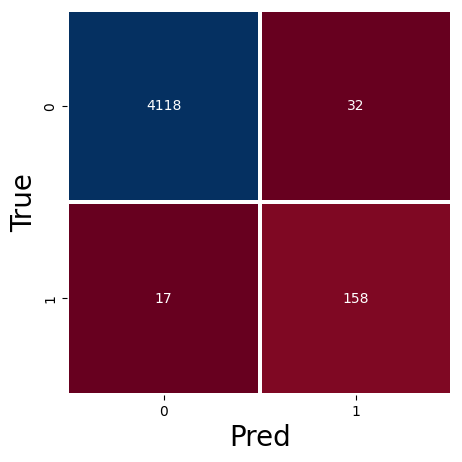

acc = 0.9886705202312138
precision = 0.8315789473684211
TPR = 0.9028571428571428
FAR = 0.0077108433734939755
FRR = 0.09714285714285714


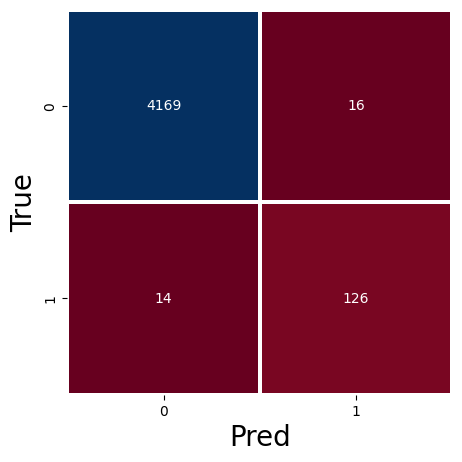

acc = 0.9930635838150289
precision = 0.8873239436619719
TPR = 0.9
FAR = 0.0038231780167264037
FRR = 0.1


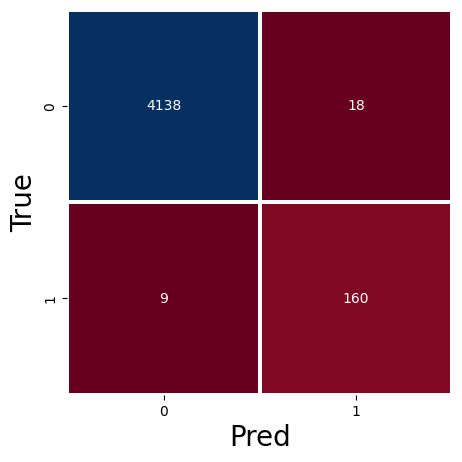

acc = 0.993757225433526
precision = 0.898876404494382
TPR = 0.9467455621301775
FAR = 0.004331087584215592
FRR = 0.05325443786982249


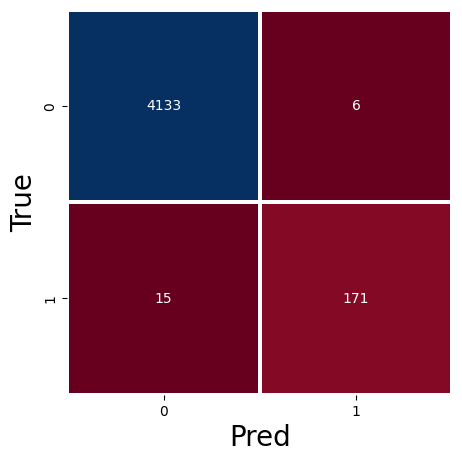

acc = 0.9951445086705202
precision = 0.9661016949152542
TPR = 0.9193548387096774
FAR = 0.001449625513409036
FRR = 0.08064516129032258


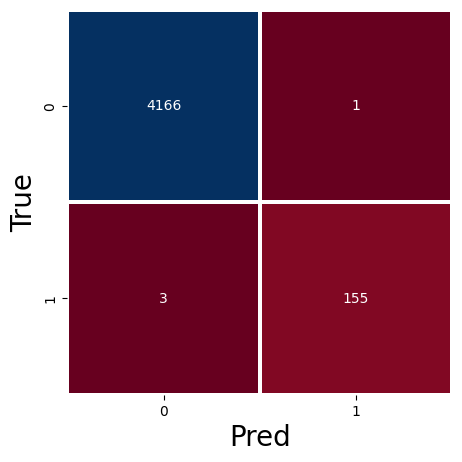

acc = 0.9990751445086705
precision = 0.9935897435897436
TPR = 0.9810126582278481
FAR = 0.00023998080153587713
FRR = 0.0189873417721519


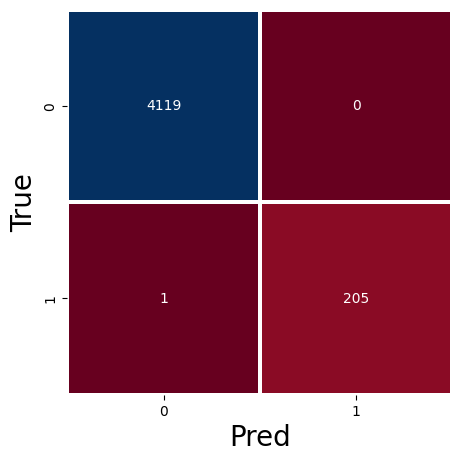

acc = 0.9997687861271676
precision = 1.0
TPR = 0.9951456310679612
FAR = 0.0
FRR = 0.0048543689320388345


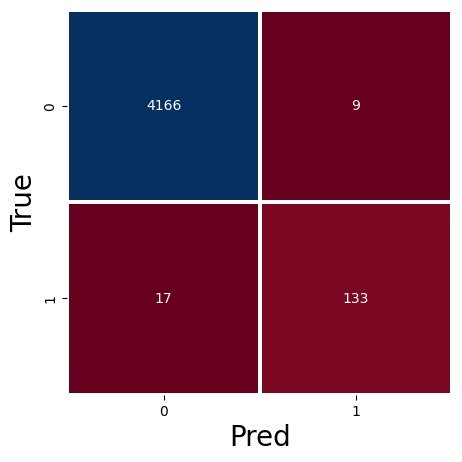

acc = 0.9939884393063584
precision = 0.9366197183098591
TPR = 0.8866666666666667
FAR = 0.002155688622754491
FRR = 0.11333333333333333


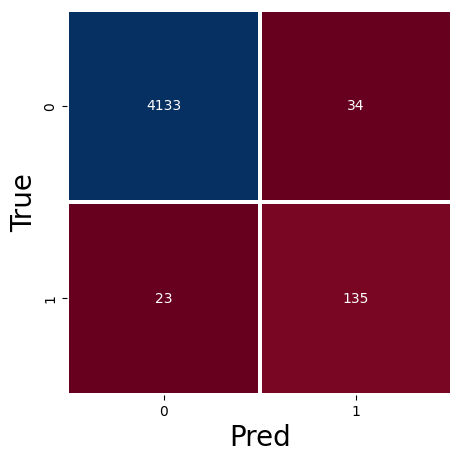

acc = 0.9868208092485549
precision = 0.7988165680473372
TPR = 0.8544303797468354
FAR = 0.008159347252219822
FRR = 0.14556962025316456
average acc = 0.9943142406726221
average precision = 0.9371413397944214
average TPR = 0.9330282561968756
average FAR = 0.0028690080934278615
average FRR = 0.06697174380312404
average EER = 0.008159347252219822


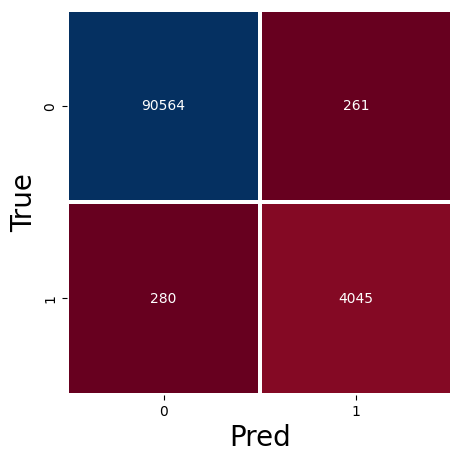

In [11]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

i=0
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        RF = RandomForestClassifier(n_estimators=22)

        RF.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = RF.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))

    '''
    initial_types = [
        ('input_data_type', FloatTensorType([None, 54]))
    ]

    converted_model = convert_sklearn(RF, initial_types=initial_types)
    with open(f"./models/model{i}.onnx", "wb") as f:
        f.write(converted_model.SerializeToString())
    i+=1
    '''
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


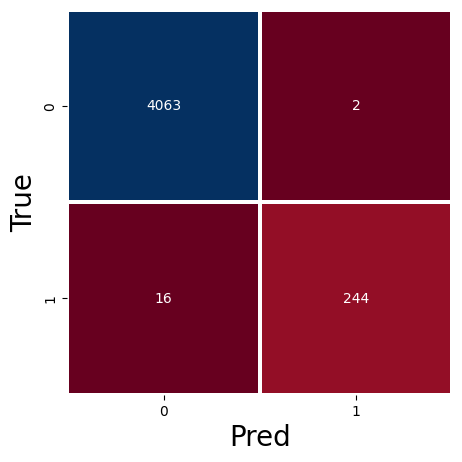

acc = 0.9958381502890173
precision = 0.991869918699187
TPR = 0.9384615384615385
FAR = 0.0004920049200492004
FRR = 0.06153846153846154


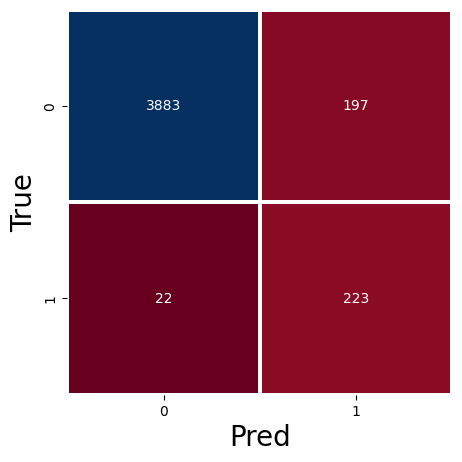

acc = 0.949364161849711
precision = 0.530952380952381
TPR = 0.9102040816326531
FAR = 0.0482843137254902
FRR = 0.08979591836734693


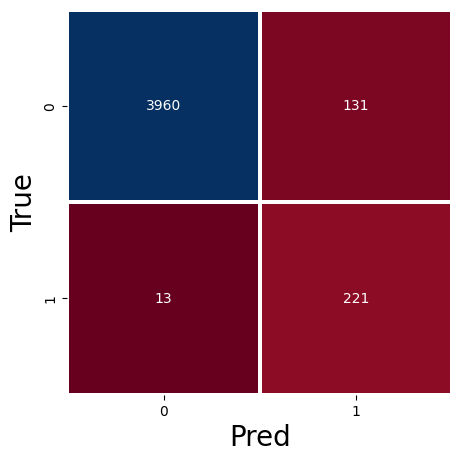

acc = 0.9667052023121387
precision = 0.6278409090909091
TPR = 0.9444444444444444
FAR = 0.03202151063309704
FRR = 0.05555555555555555


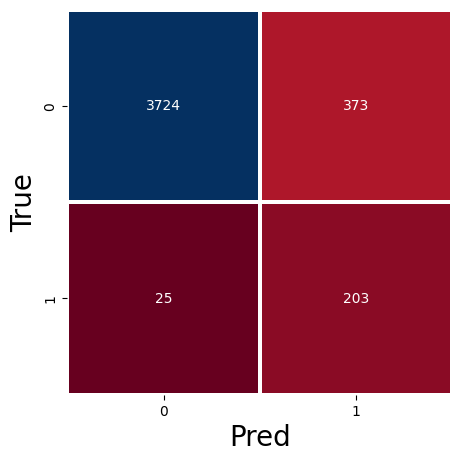

acc = 0.9079768786127168
precision = 0.3524305555555556
TPR = 0.8903508771929824
FAR = 0.09104222601903832
FRR = 0.10964912280701754


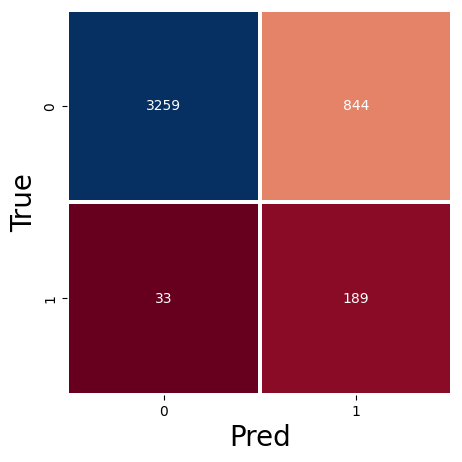

acc = 0.7972254335260116
precision = 0.1829622458857696
TPR = 0.8513513513513513
FAR = 0.20570314404094564
FRR = 0.14864864864864866


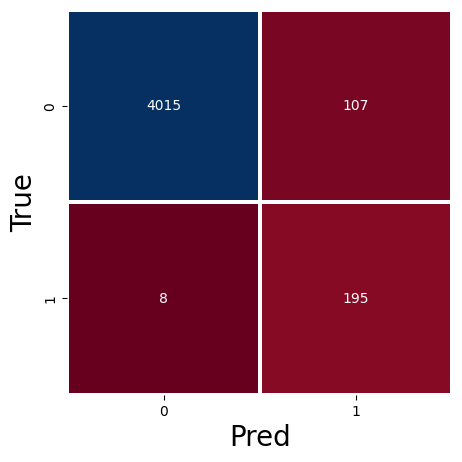

acc = 0.9734104046242774
precision = 0.6456953642384106
TPR = 0.9605911330049262
FAR = 0.025958272683163513
FRR = 0.03940886699507389


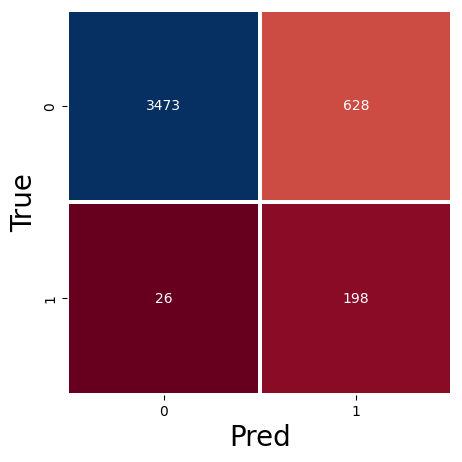

acc = 0.84878612716763
precision = 0.2397094430992736
TPR = 0.8839285714285714
FAR = 0.15313338210192637
FRR = 0.11607142857142858


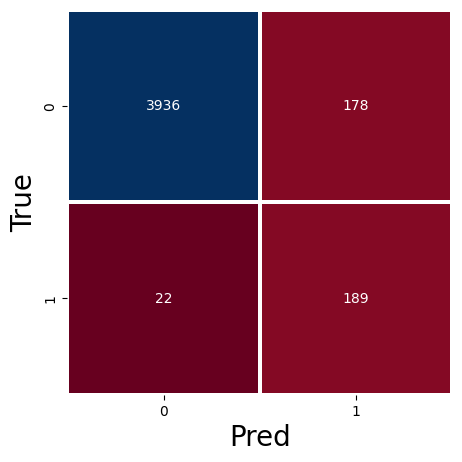

acc = 0.953757225433526
precision = 0.5149863760217984
TPR = 0.8957345971563981
FAR = 0.04326689353427322
FRR = 0.10426540284360189


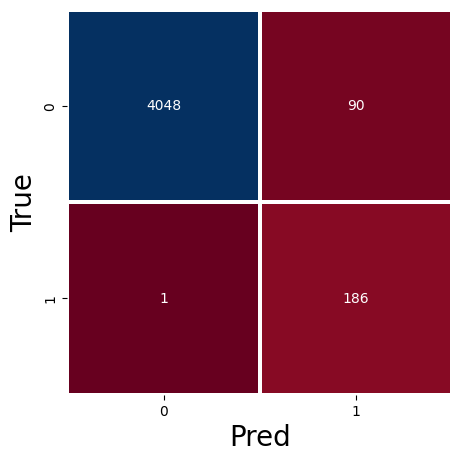

acc = 0.9789595375722543
precision = 0.6739130434782609
TPR = 0.9946524064171123
FAR = 0.021749637506041565
FRR = 0.0053475935828877


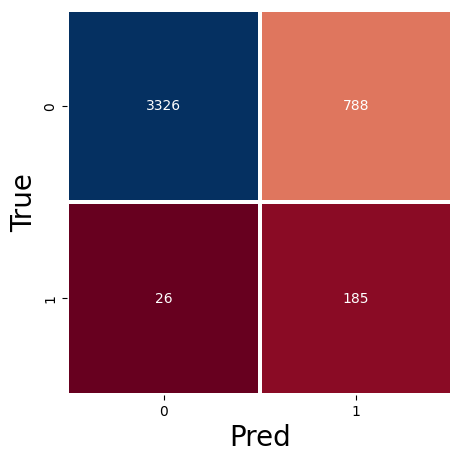

acc = 0.8117919075144509
precision = 0.19013360739979446
TPR = 0.8767772511848341
FAR = 0.191541079241614
FRR = 0.12322274881516587


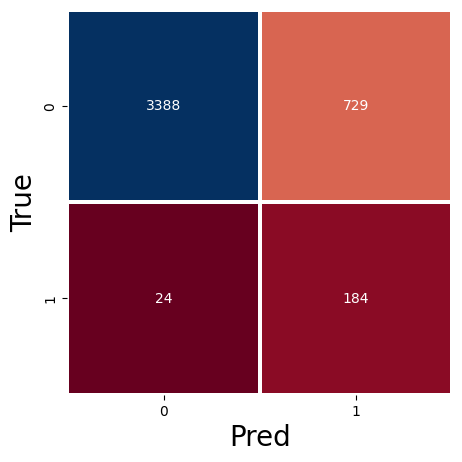

acc = 0.8258959537572255
precision = 0.20153340635268346
TPR = 0.8846153846153846
FAR = 0.17707068253582706
FRR = 0.11538461538461539


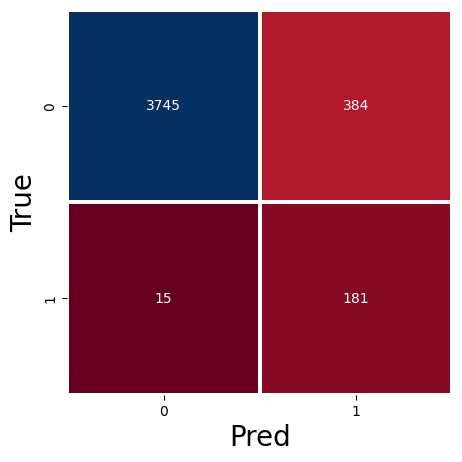

acc = 0.9077456647398844
precision = 0.32035398230088497
TPR = 0.923469387755102
FAR = 0.09300072656817632
FRR = 0.07653061224489796


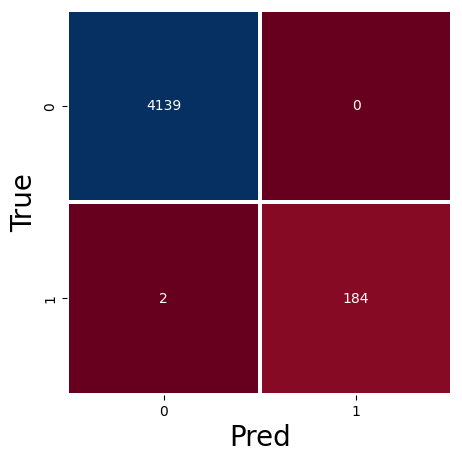

acc = 0.9995375722543353
precision = 1.0
TPR = 0.989247311827957
FAR = 0.0
FRR = 0.010752688172043012


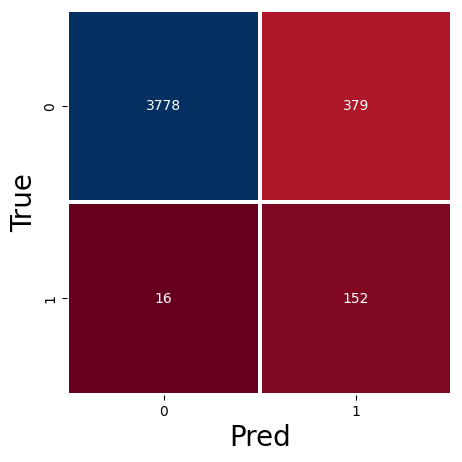

acc = 0.9086705202312139
precision = 0.2862523540489642
TPR = 0.9047619047619048
FAR = 0.09117151792157806
FRR = 0.09523809523809523


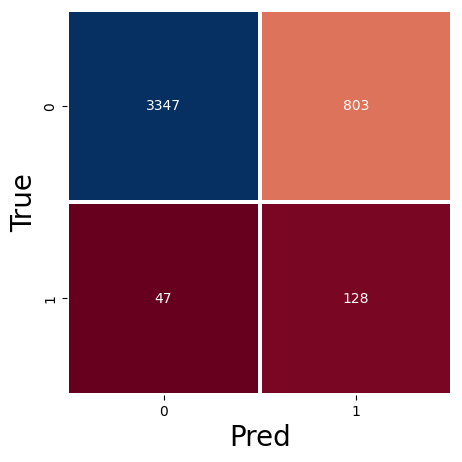

acc = 0.8034682080924855
precision = 0.13748657357679914
TPR = 0.7314285714285714
FAR = 0.19349397590361445
FRR = 0.26857142857142857


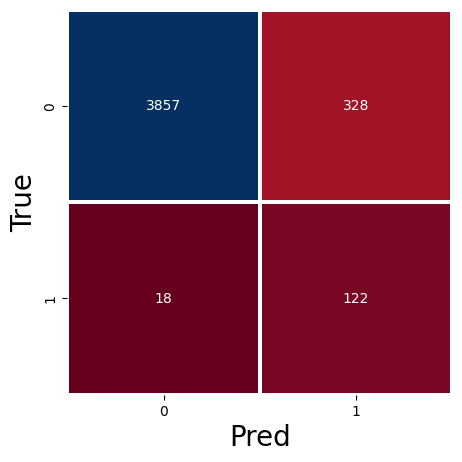

acc = 0.92
precision = 0.27111111111111114
TPR = 0.8714285714285714
FAR = 0.07837514934289128
FRR = 0.12857142857142856


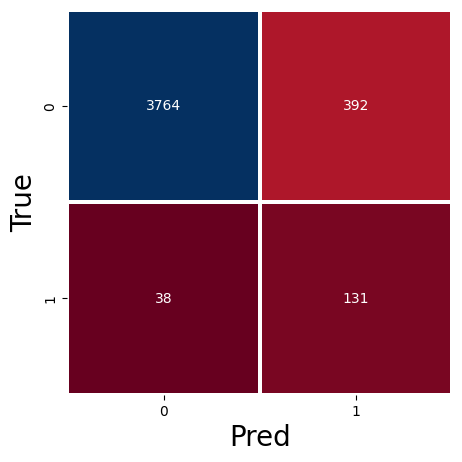

acc = 0.900578034682081
precision = 0.25047801147227533
TPR = 0.7751479289940828
FAR = 0.09432146294513956
FRR = 0.22485207100591717


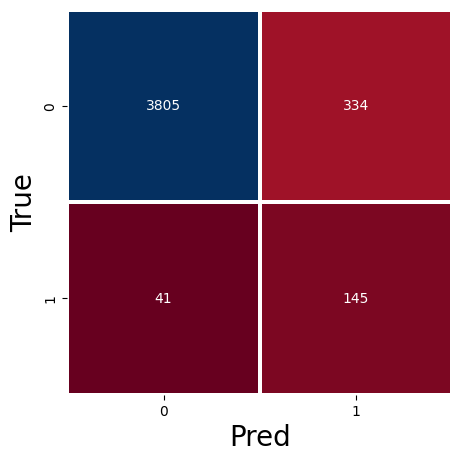

acc = 0.9132947976878613
precision = 0.302713987473904
TPR = 0.7795698924731183
FAR = 0.08069582024643633
FRR = 0.22043010752688172


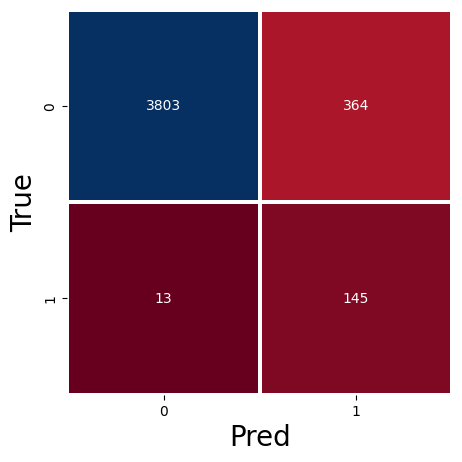

acc = 0.9128323699421965
precision = 0.28487229862475444
TPR = 0.9177215189873418
FAR = 0.08735301175905928
FRR = 0.08227848101265822


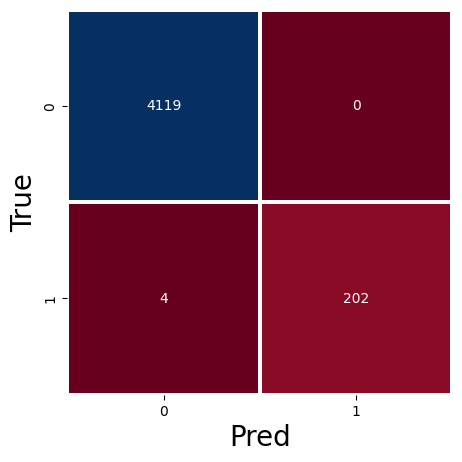

acc = 0.9990751445086705
precision = 1.0
TPR = 0.9805825242718447
FAR = 0.0
FRR = 0.019417475728155338


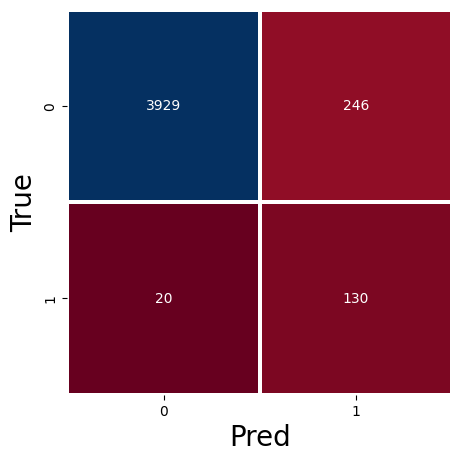

acc = 0.9384971098265896
precision = 0.34574468085106386
TPR = 0.8666666666666667
FAR = 0.05892215568862275
FRR = 0.13333333333333333


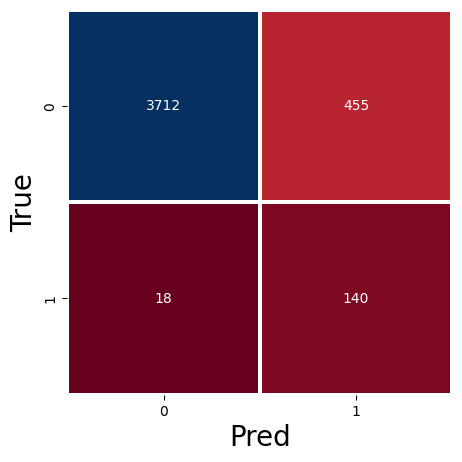

acc = 0.890635838150289
precision = 0.23529411764705882
TPR = 0.8860759493670886
FAR = 0.10919126469882409
FRR = 0.11392405063291139
average acc = 0.9138202837624803
average precision = 0.43574247126731086
average TPR = 0.8935096302205658
average FAR = 0.08530855600071856
average FRR = 0.10649036977943428
average EER = 0.10919126469882409


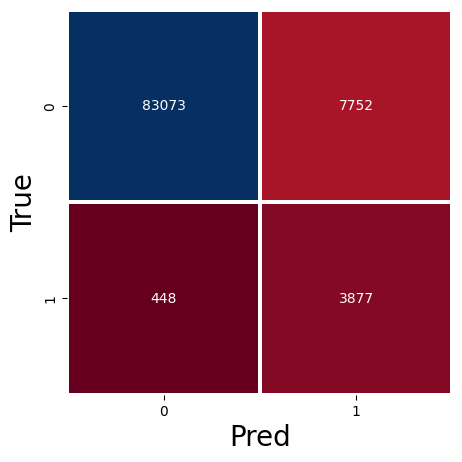

In [12]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        GNB = GaussianNB()

        GNB.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = GNB.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


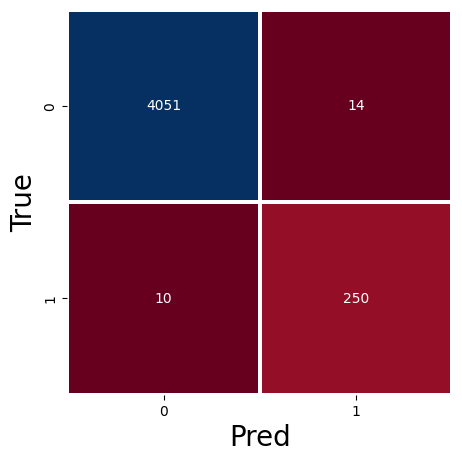

acc = 0.9944508670520231
precision = 0.946969696969697
TPR = 0.9615384615384616
FAR = 0.0034440344403444036
FRR = 0.038461538461538464


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


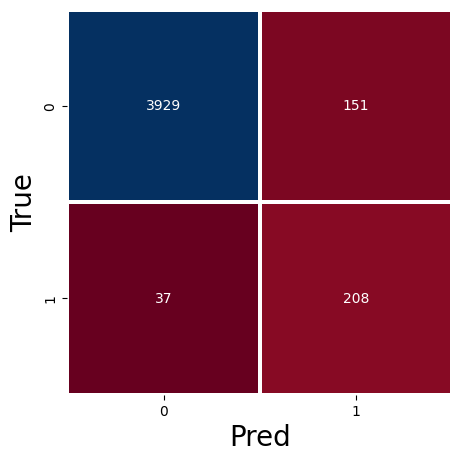

acc = 0.9565317919075145
precision = 0.5793871866295265
TPR = 0.8489795918367347
FAR = 0.03700980392156863
FRR = 0.1510204081632653


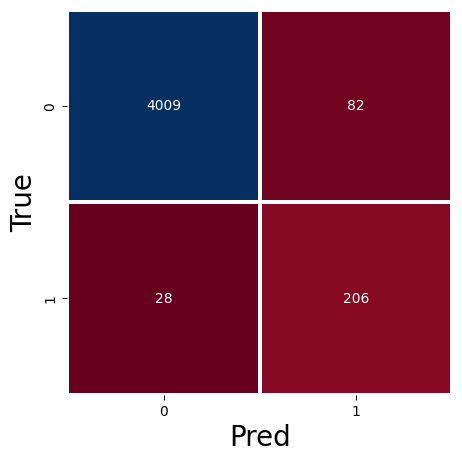

acc = 0.9745664739884393
precision = 0.7152777777777778
TPR = 0.8803418803418803
FAR = 0.02004399902224395
FRR = 0.11965811965811966


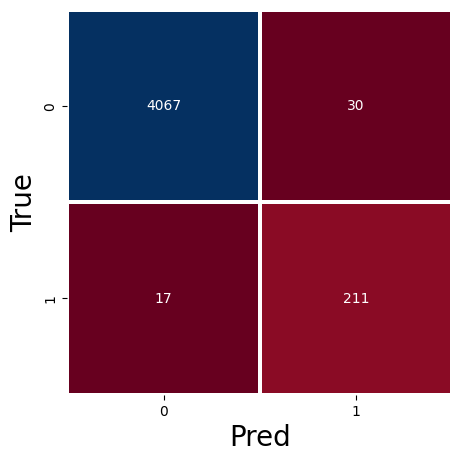

acc = 0.9891329479768786
precision = 0.8755186721991701
TPR = 0.9254385964912281
FAR = 0.00732243104710764
FRR = 0.07456140350877193


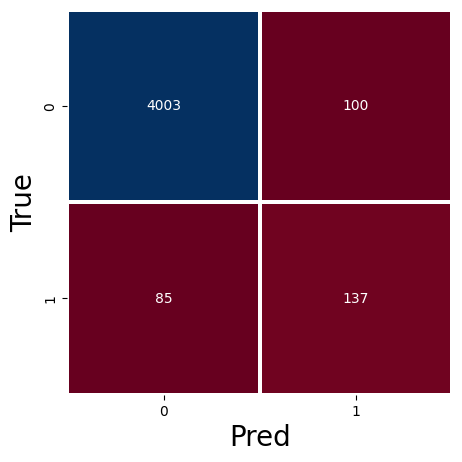

acc = 0.9572254335260115
precision = 0.5780590717299579
TPR = 0.6171171171171171
FAR = 0.024372410431391666
FRR = 0.38288288288288286


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


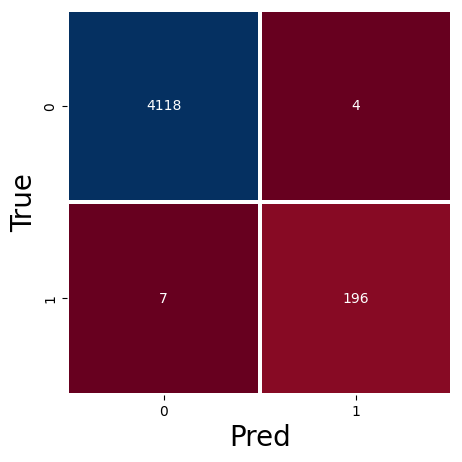

acc = 0.9974566473988439
precision = 0.98
TPR = 0.9655172413793104
FAR = 0.0009704027171276079
FRR = 0.034482758620689655


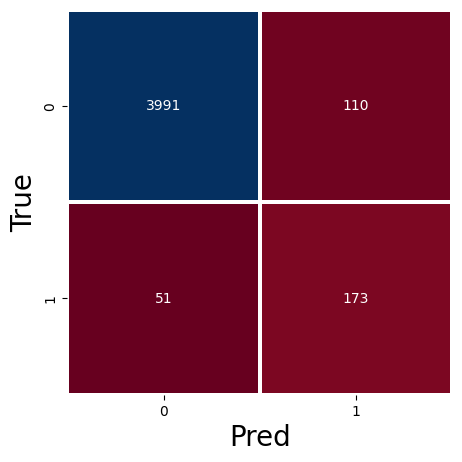

acc = 0.9627745664739884
precision = 0.6113074204946997
TPR = 0.7723214285714286
FAR = 0.02682272616435016
FRR = 0.22767857142857142


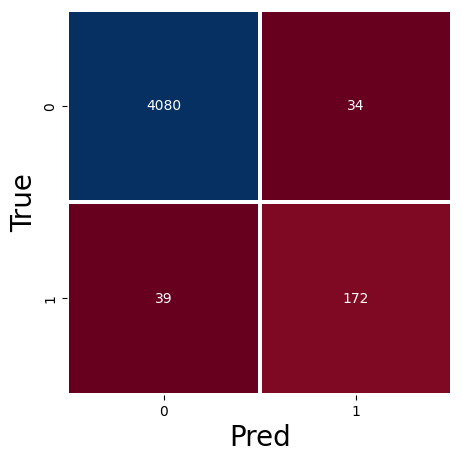

acc = 0.983121387283237
precision = 0.8349514563106796
TPR = 0.8151658767772512
FAR = 0.008264462809917356
FRR = 0.1848341232227488


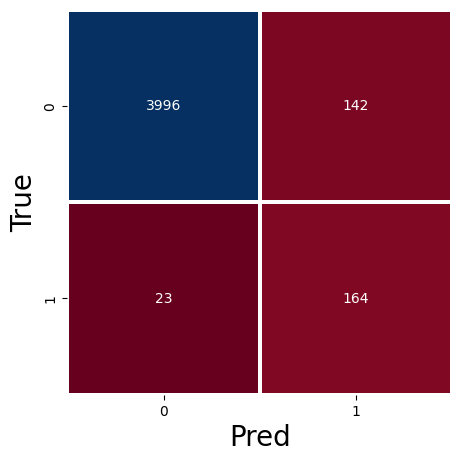

acc = 0.9618497109826589
precision = 0.5359477124183006
TPR = 0.8770053475935828
FAR = 0.03431609473175447
FRR = 0.12299465240641712


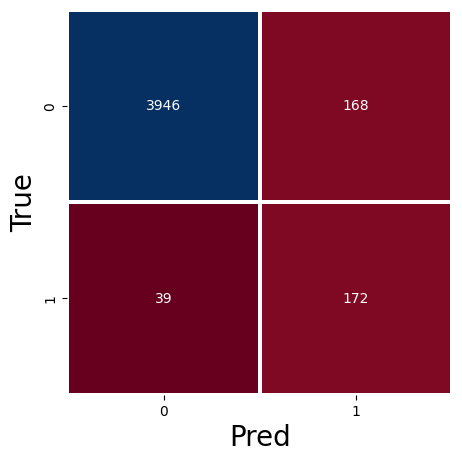

acc = 0.9521387283236994
precision = 0.5058823529411764
TPR = 0.8151658767772512
FAR = 0.04083616917841517
FRR = 0.1848341232227488


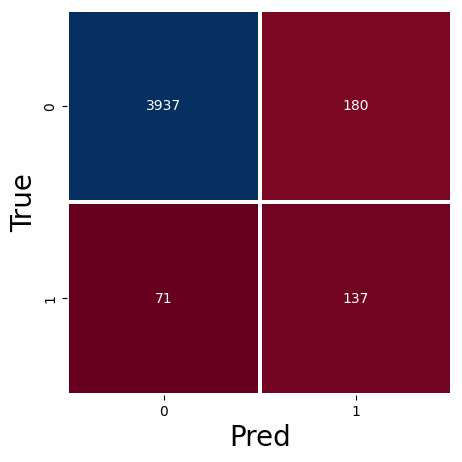

acc = 0.9419653179190751
precision = 0.43217665615141954
TPR = 0.6586538461538461
FAR = 0.04372115618168569
FRR = 0.34134615384615385


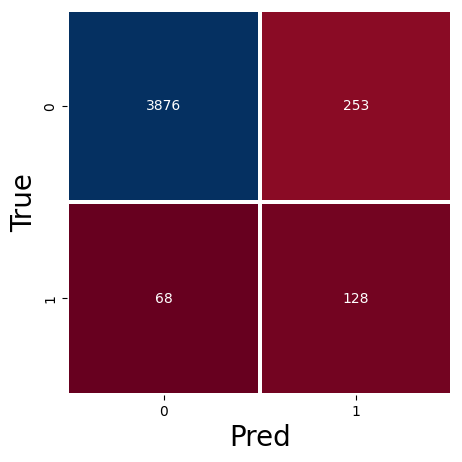

acc = 0.9257803468208092
precision = 0.3359580052493438
TPR = 0.6530612244897959
FAR = 0.06127391620247033
FRR = 0.3469387755102041


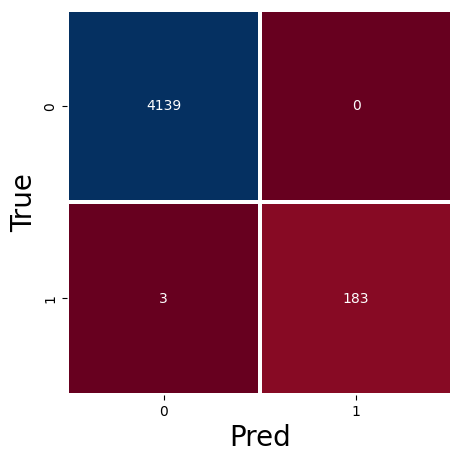

acc = 0.9993063583815028
precision = 1.0
TPR = 0.9838709677419355
FAR = 0.0
FRR = 0.016129032258064516


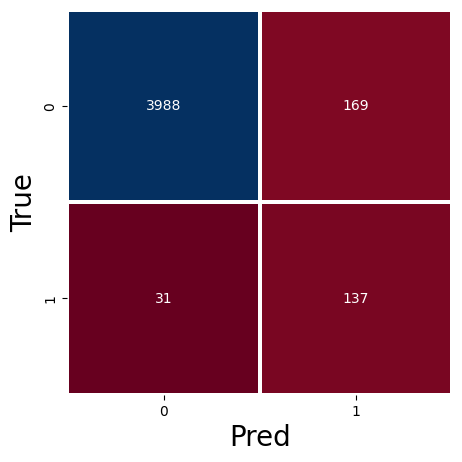

acc = 0.953757225433526
precision = 0.4477124183006536
TPR = 0.8154761904761905
FAR = 0.0406543180178013
FRR = 0.18452380952380953


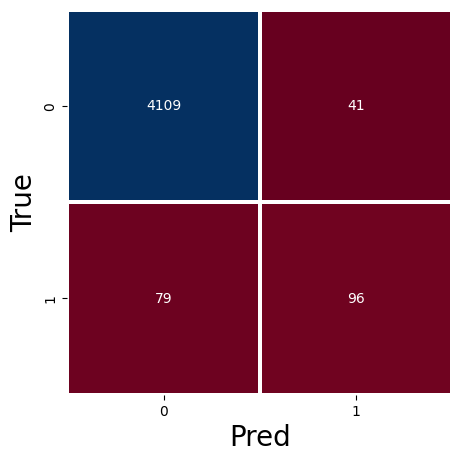

acc = 0.9722543352601156
precision = 0.7007299270072993
TPR = 0.5485714285714286
FAR = 0.009879518072289156
FRR = 0.4514285714285714


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


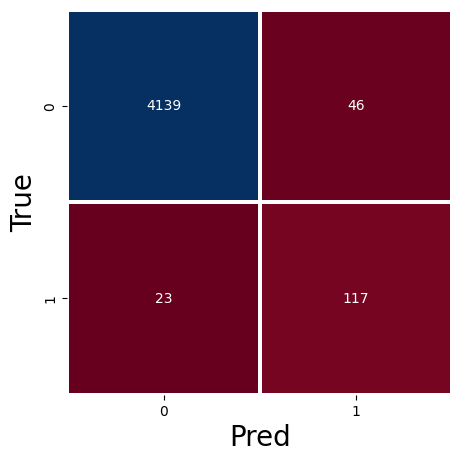

acc = 0.9840462427745664
precision = 0.7177914110429447
TPR = 0.8357142857142857
FAR = 0.01099163679808841
FRR = 0.16428571428571428


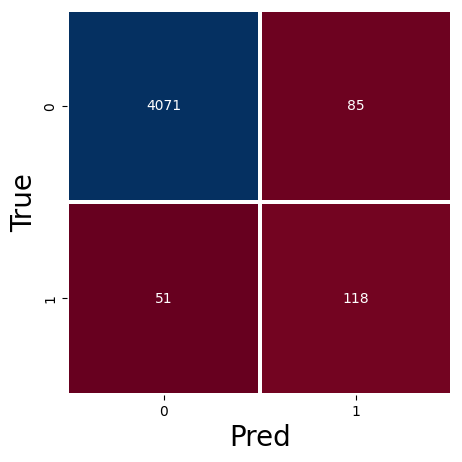

acc = 0.9685549132947977
precision = 0.5812807881773399
TPR = 0.6982248520710059
FAR = 0.02045235803657363
FRR = 0.30177514792899407


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


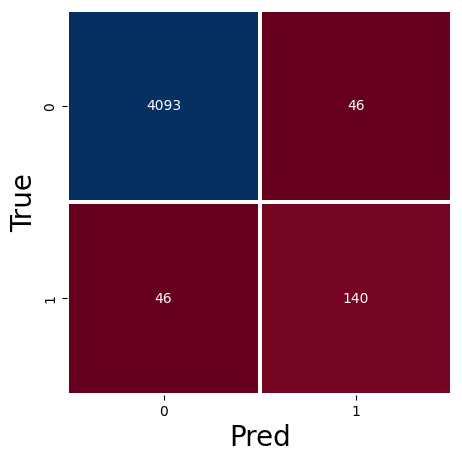

acc = 0.978728323699422
precision = 0.7526881720430108
TPR = 0.7526881720430108
FAR = 0.01111379560280261
FRR = 0.24731182795698925


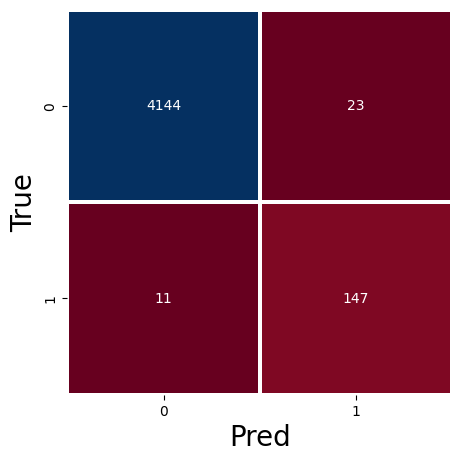

acc = 0.9921387283236994
precision = 0.8647058823529412
TPR = 0.930379746835443
FAR = 0.005519558435325174
FRR = 0.06962025316455696


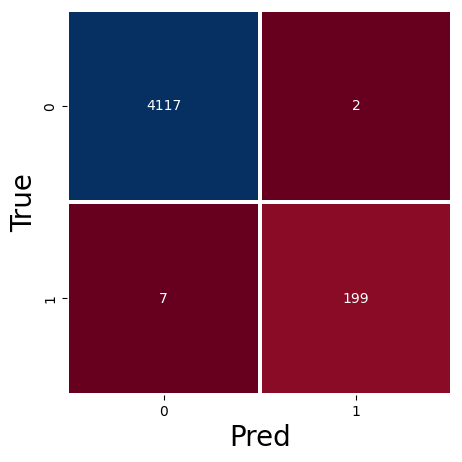

acc = 0.9979190751445086
precision = 0.9900497512437811
TPR = 0.9660194174757282
FAR = 0.00048555474629764507
FRR = 0.03398058252427184


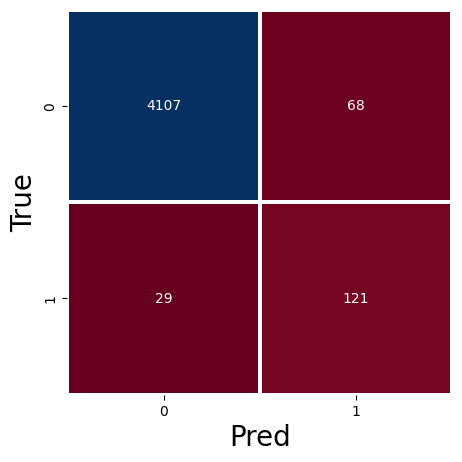

acc = 0.9775722543352601
precision = 0.6402116402116402
TPR = 0.8066666666666666
FAR = 0.0162874251497006
FRR = 0.19333333333333333


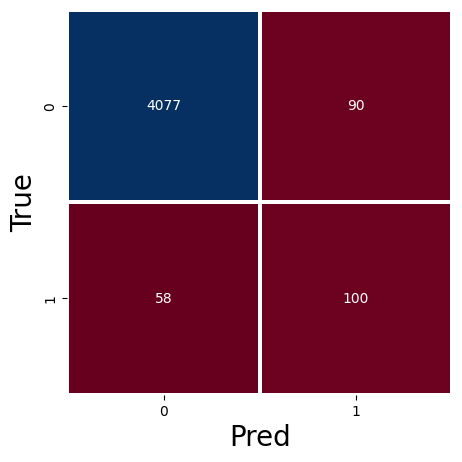

acc = 0.9657803468208093
precision = 0.5263157894736842
TPR = 0.6329113924050633
FAR = 0.02159827213822894
FRR = 0.3670886075949367
average acc = 0.9721387283236994
average precision = 0.6887691722147747
average TPR = 0.8073104367758475
average FAR = 0.020244547447522025
average FRR = 0.19268956322415248
average EER = 0.02159827213822894


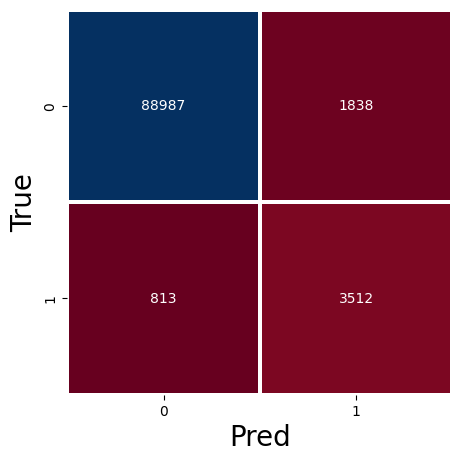

In [13]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        clf1 = svm.SVC(kernel='rbf', C=10)
        clf2 = MLPClassifier(hidden_layer_sizes=(100,10))
        voting_clf1 = VotingClassifier(estimators=[('svm', clf1), ('mlp', clf2)], voting='hard')
        
        voting_clf1.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf1.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


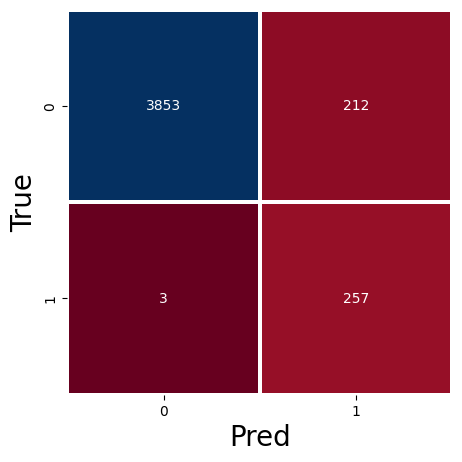

acc = 0.9502890173410404
precision = 0.5479744136460555
TPR = 0.9884615384615385
FAR = 0.052152521525215254
FRR = 0.011538461538461539


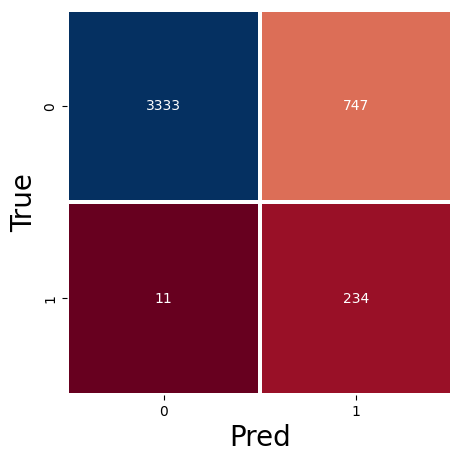

acc = 0.8247398843930636
precision = 0.23853211009174313
TPR = 0.9551020408163265
FAR = 0.18308823529411763
FRR = 0.044897959183673466


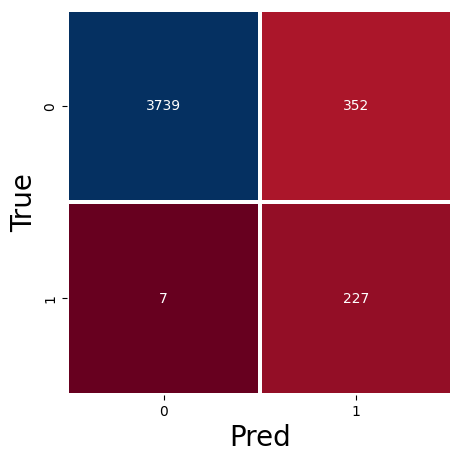

acc = 0.9169942196531792
precision = 0.3920552677029361
TPR = 0.9700854700854701
FAR = 0.08604253238816915
FRR = 0.029914529914529916


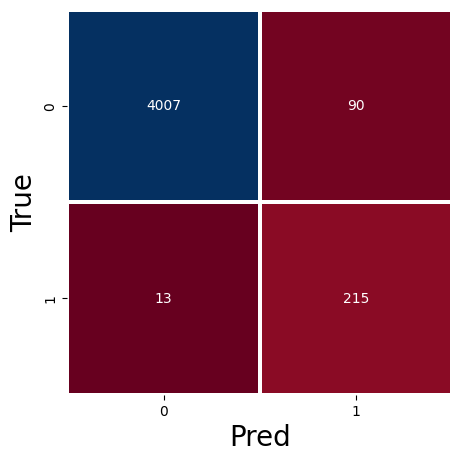

acc = 0.9761849710982659
precision = 0.7049180327868853
TPR = 0.9429824561403509
FAR = 0.021967293141322917
FRR = 0.05701754385964912


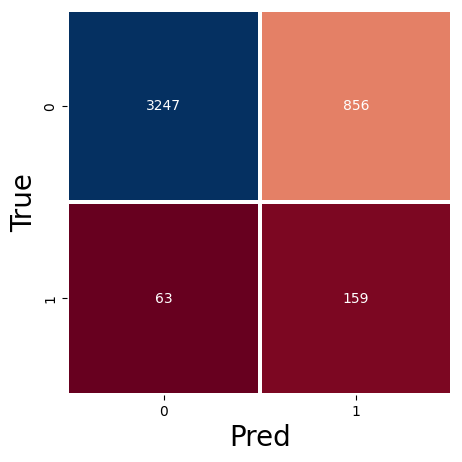

acc = 0.7875144508670521
precision = 0.1566502463054187
TPR = 0.7162162162162162
FAR = 0.20862783329271264
FRR = 0.28378378378378377


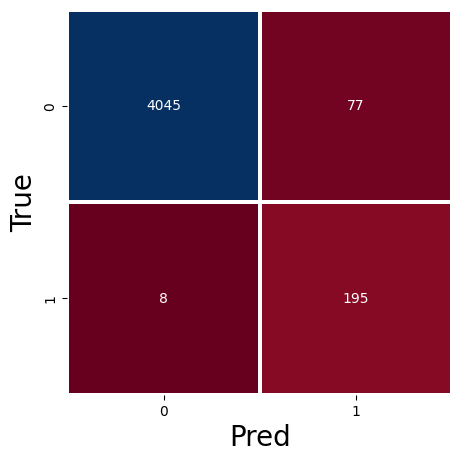

acc = 0.9803468208092485
precision = 0.7169117647058824
TPR = 0.9605911330049262
FAR = 0.018680252304706452
FRR = 0.03940886699507389


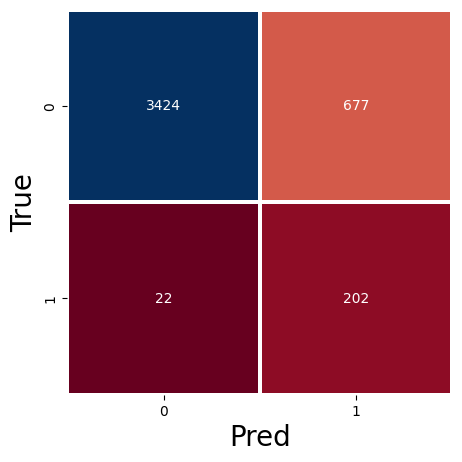

acc = 0.8383815028901734
precision = 0.229806598407281
TPR = 0.9017857142857143
FAR = 0.16508168739331872
FRR = 0.09821428571428571


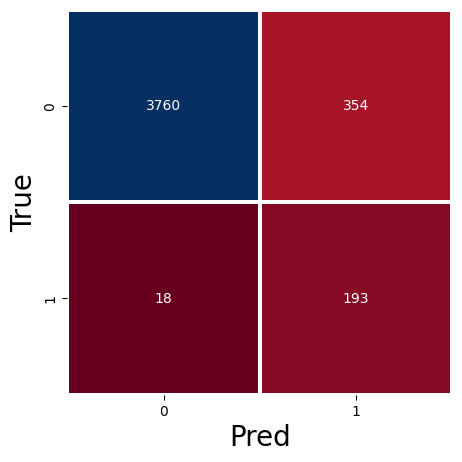

acc = 0.9139884393063584
precision = 0.35283363802559414
TPR = 0.9146919431279621
FAR = 0.08604764219737482
FRR = 0.08530805687203792


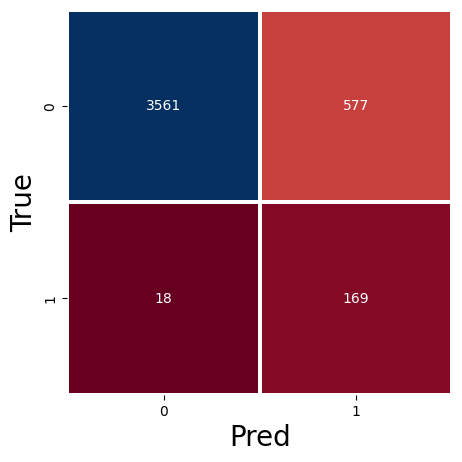

acc = 0.8624277456647399
precision = 0.22654155495978553
TPR = 0.9037433155080213
FAR = 0.13943934267762204
FRR = 0.0962566844919786


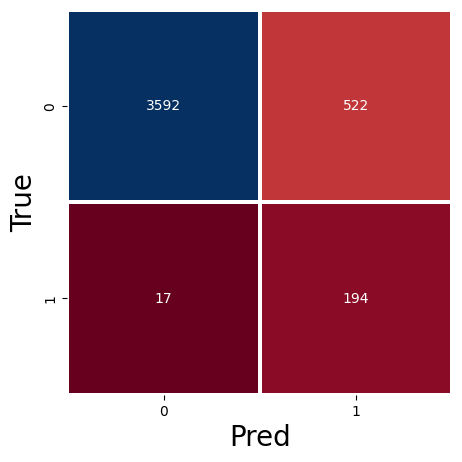

acc = 0.8753757225433526
precision = 0.2709497206703911
TPR = 0.919431279620853
FAR = 0.12688381137579
FRR = 0.08056872037914692


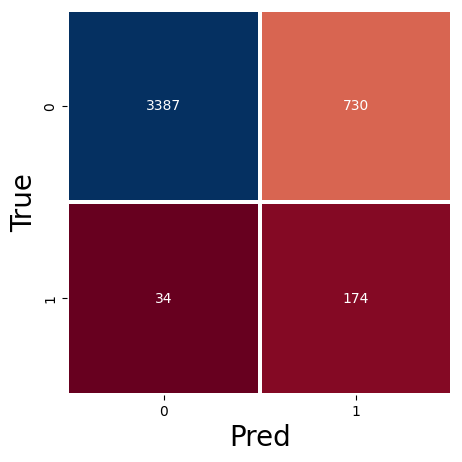

acc = 0.8233526011560693
precision = 0.19247787610619468
TPR = 0.8365384615384616
FAR = 0.17731357784794755
FRR = 0.16346153846153846


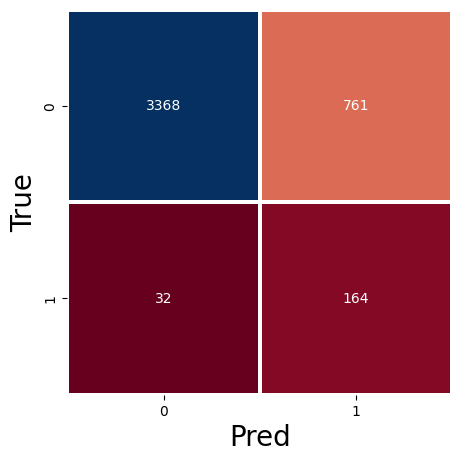

acc = 0.8166473988439307
precision = 0.1772972972972973
TPR = 0.8367346938775511
FAR = 0.18430612739162025
FRR = 0.16326530612244897


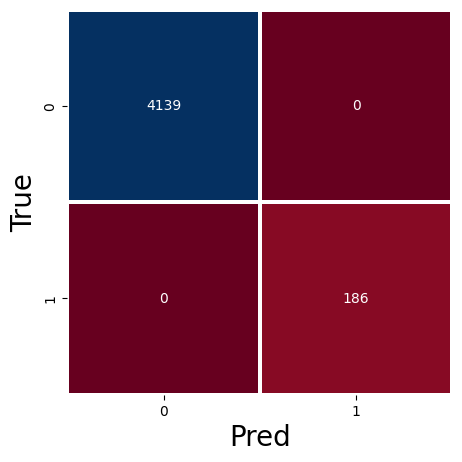

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


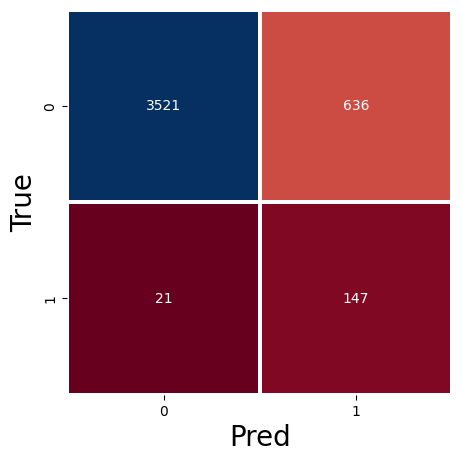

acc = 0.848092485549133
precision = 0.18773946360153257
TPR = 0.875
FAR = 0.15299494828000962
FRR = 0.125


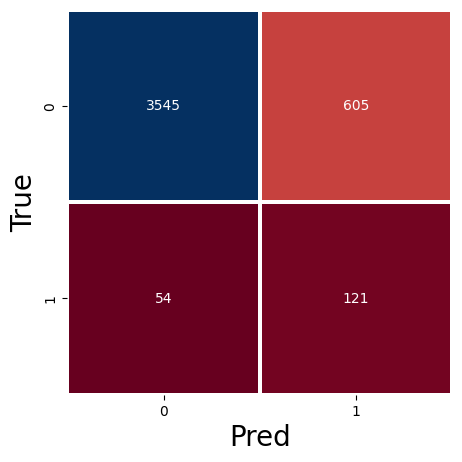

acc = 0.8476300578034682
precision = 0.16666666666666666
TPR = 0.6914285714285714
FAR = 0.14578313253012049
FRR = 0.30857142857142855


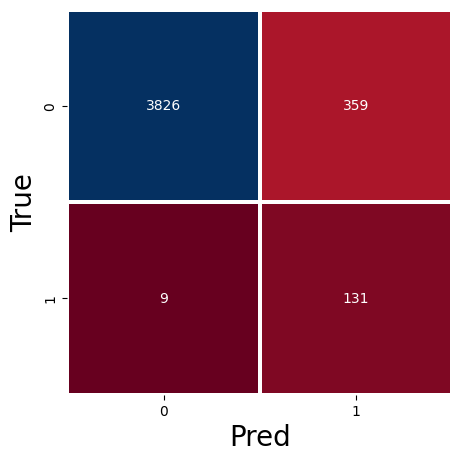

acc = 0.9149132947976879
precision = 0.2673469387755102
TPR = 0.9357142857142857
FAR = 0.08578255675029868
FRR = 0.06428571428571428


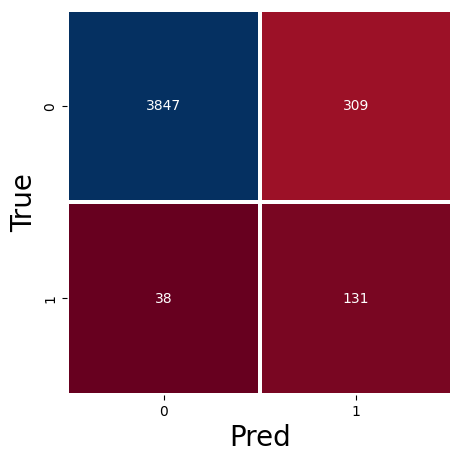

acc = 0.9197687861271676
precision = 0.29772727272727273
TPR = 0.7751479289940828
FAR = 0.07435033686236767
FRR = 0.22485207100591717


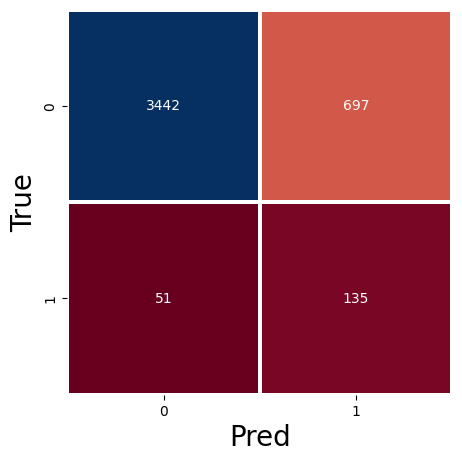

acc = 0.8270520231213873
precision = 0.1622596153846154
TPR = 0.7258064516129032
FAR = 0.16839816380768302
FRR = 0.27419354838709675


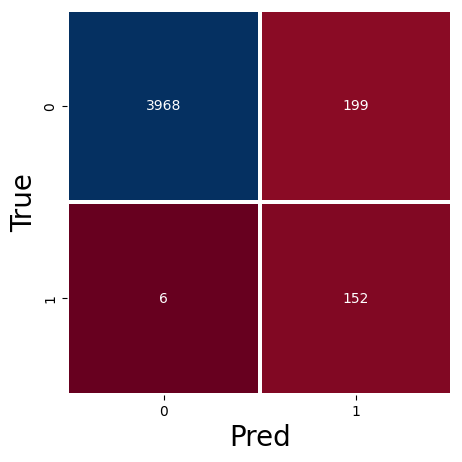

acc = 0.9526011560693641
precision = 0.43304843304843305
TPR = 0.9620253164556962
FAR = 0.04775617950563955
FRR = 0.0379746835443038


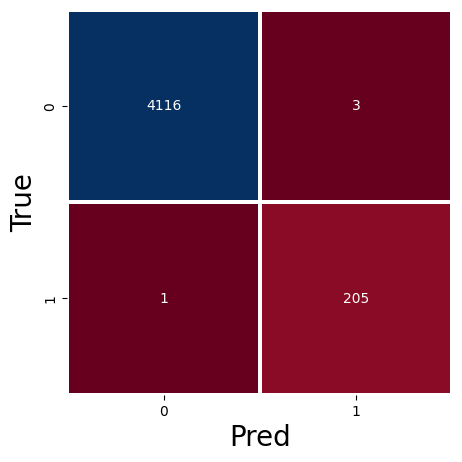

acc = 0.9990751445086705
precision = 0.9855769230769231
TPR = 0.9951456310679612
FAR = 0.0007283321194464676
FRR = 0.0048543689320388345


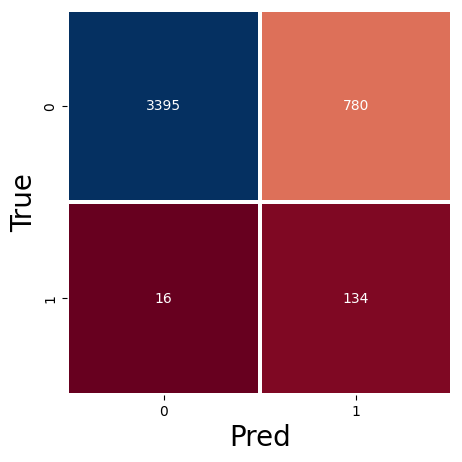

acc = 0.8159537572254335
precision = 0.14660831509846828
TPR = 0.8933333333333333
FAR = 0.18682634730538922
FRR = 0.10666666666666667


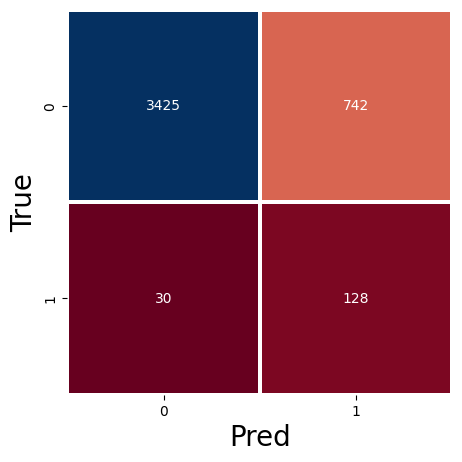

acc = 0.8215028901734104
precision = 0.1471264367816092
TPR = 0.810126582278481
FAR = 0.17806575473962083
FRR = 0.189873417721519
average acc = 0.8869469259064633
average precision = 0.36368402663029525
average TPR = 0.8868223801622139
average FAR = 0.11319620948774968
average FRR = 0.11317761983778607
average EER = 0.17806575473962083


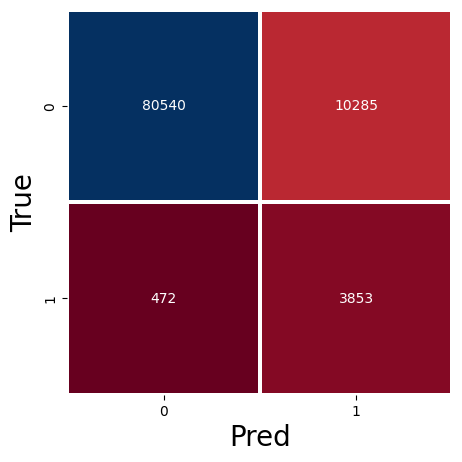

In [14]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        clf1 = svm.SVC(kernel='poly', C=10)
        clf2 = svm.SVC(kernel='rbf', C=10)
        voting_clf2 = VotingClassifier(estimators=[('svm1', clf1), ('svm2', clf2)], voting='hard')
        
        voting_clf2.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf2.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


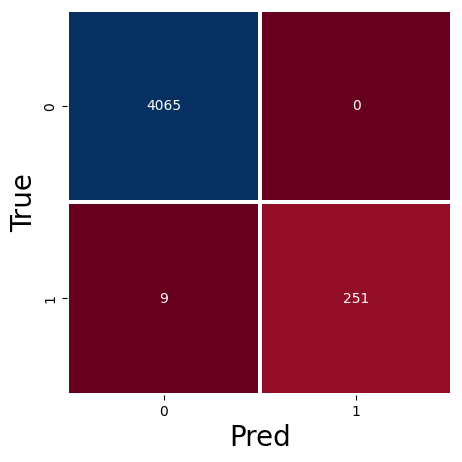

acc = 0.9979190751445086
precision = 1.0
TPR = 0.9653846153846154
FAR = 0.0
FRR = 0.03461538461538462


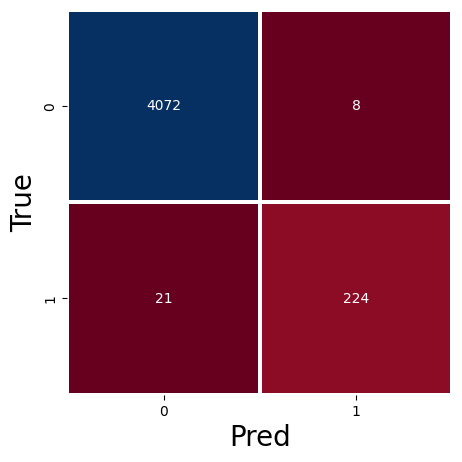

acc = 0.9932947976878612
precision = 0.9655172413793104
TPR = 0.9142857142857143
FAR = 0.00196078431372549
FRR = 0.08571428571428572


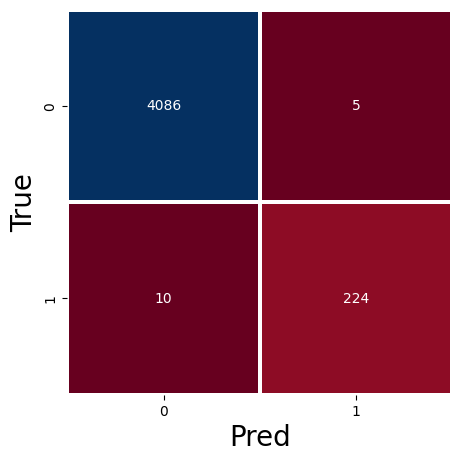

acc = 0.9965317919075144
precision = 0.9781659388646288
TPR = 0.9572649572649573
FAR = 0.0012221950623319481
FRR = 0.042735042735042736


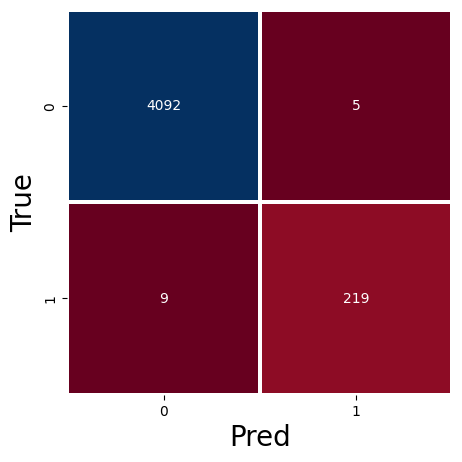

acc = 0.9967630057803468
precision = 0.9776785714285714
TPR = 0.9605263157894737
FAR = 0.00122040517451794
FRR = 0.039473684210526314


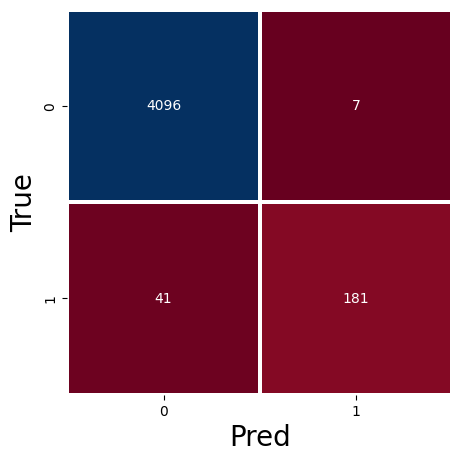

acc = 0.9889017341040462
precision = 0.9627659574468085
TPR = 0.8153153153153153
FAR = 0.0017060687301974165
FRR = 0.18468468468468469


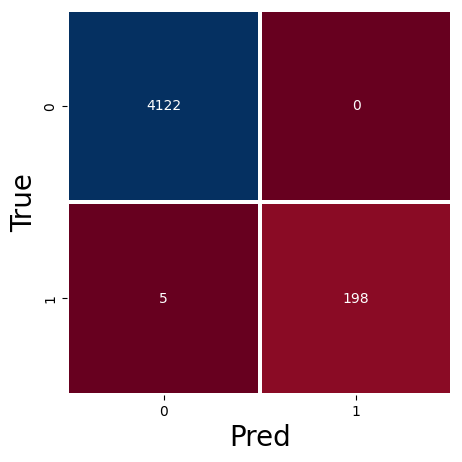

acc = 0.9988439306358381
precision = 1.0
TPR = 0.9753694581280788
FAR = 0.0
FRR = 0.024630541871921183


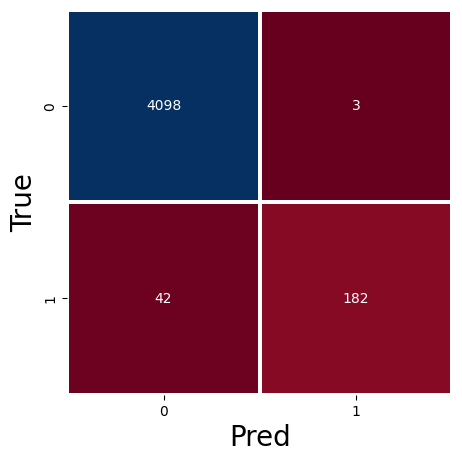

acc = 0.9895953757225433
precision = 0.9837837837837838
TPR = 0.8125
FAR = 0.000731528895391368
FRR = 0.1875


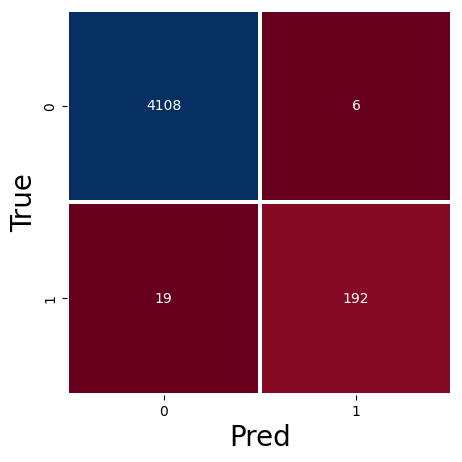

acc = 0.9942196531791907
precision = 0.9696969696969697
TPR = 0.909952606635071
FAR = 0.0014584346135148275
FRR = 0.09004739336492891


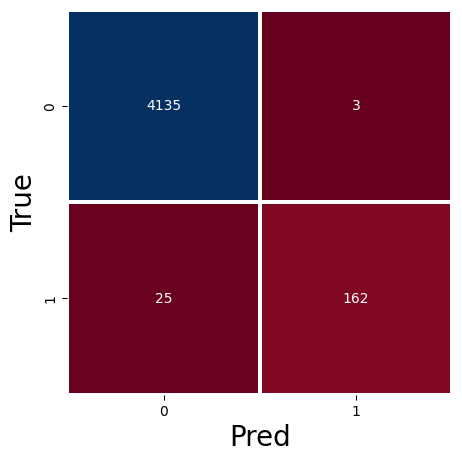

acc = 0.9935260115606936
precision = 0.9818181818181818
TPR = 0.8663101604278075
FAR = 0.0007249879168680521
FRR = 0.13368983957219252


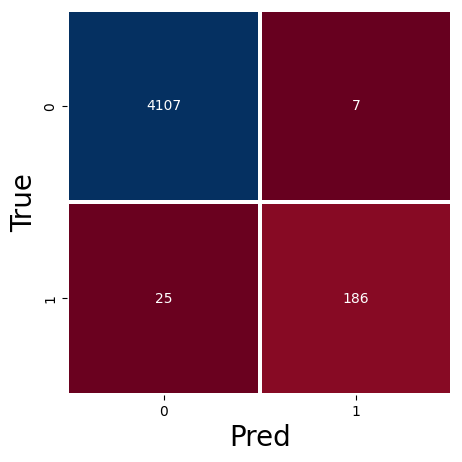

acc = 0.9926011560693642
precision = 0.9637305699481865
TPR = 0.8815165876777251
FAR = 0.001701507049100632
FRR = 0.11848341232227488


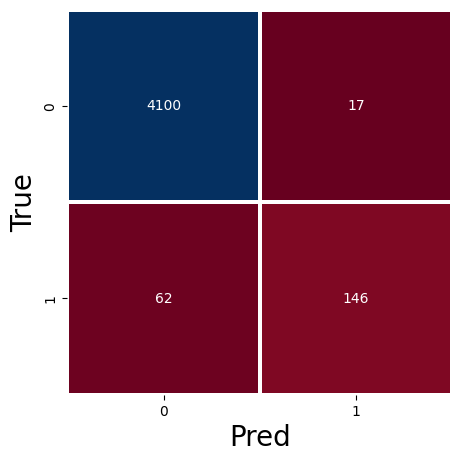

acc = 0.9817341040462427
precision = 0.8957055214723927
TPR = 0.7019230769230769
FAR = 0.004129220306048093
FRR = 0.2980769230769231


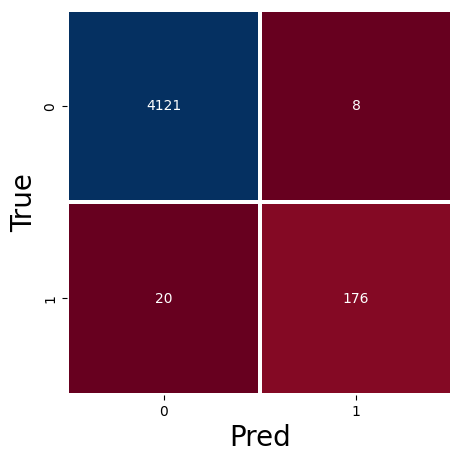

acc = 0.9935260115606936
precision = 0.9565217391304348
TPR = 0.8979591836734694
FAR = 0.0019375151368370065
FRR = 0.10204081632653061


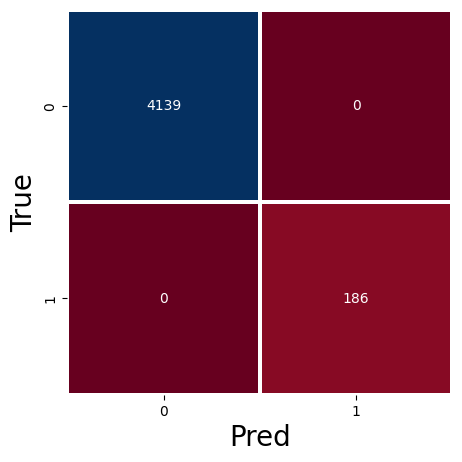

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


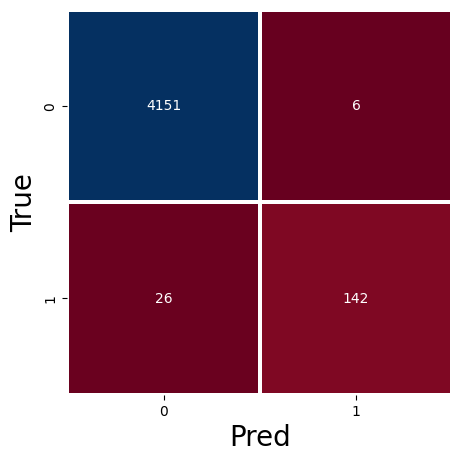

acc = 0.9926011560693642
precision = 0.9594594594594594
TPR = 0.8452380952380952
FAR = 0.0014433485686793362
FRR = 0.15476190476190477


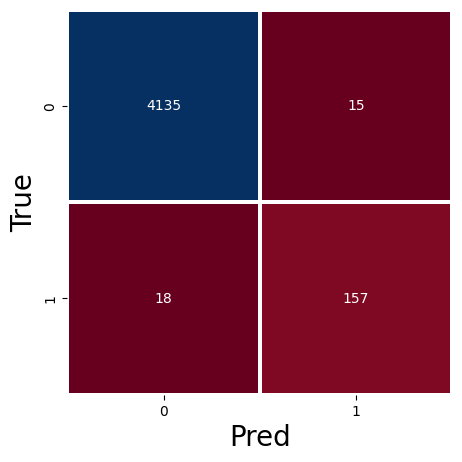

acc = 0.9923699421965317
precision = 0.9127906976744186
TPR = 0.8971428571428571
FAR = 0.0036144578313253013
FRR = 0.10285714285714286


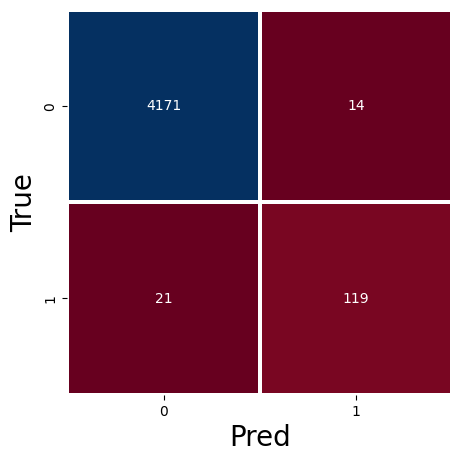

acc = 0.991907514450867
precision = 0.8947368421052632
TPR = 0.85
FAR = 0.0033452807646356035
FRR = 0.15


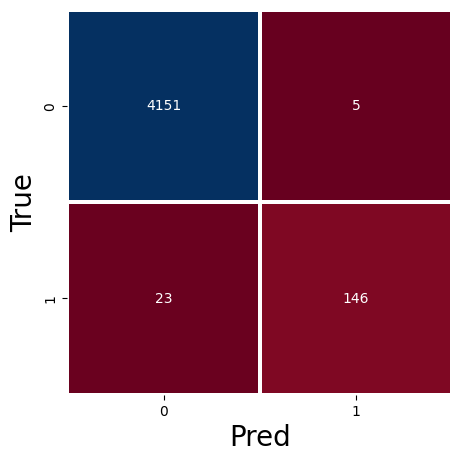

acc = 0.9935260115606936
precision = 0.9668874172185431
TPR = 0.863905325443787
FAR = 0.001203079884504331
FRR = 0.13609467455621302


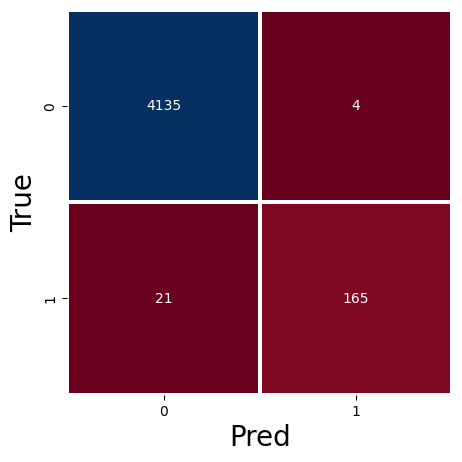

acc = 0.9942196531791907
precision = 0.9763313609467456
TPR = 0.8870967741935484
FAR = 0.0009664170089393573
FRR = 0.11290322580645161


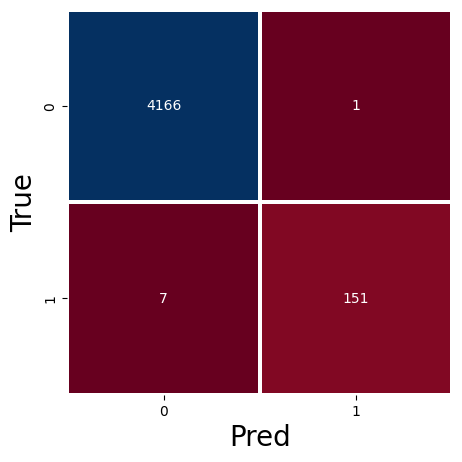

acc = 0.998150289017341
precision = 0.993421052631579
TPR = 0.9556962025316456
FAR = 0.00023998080153587713
FRR = 0.04430379746835443


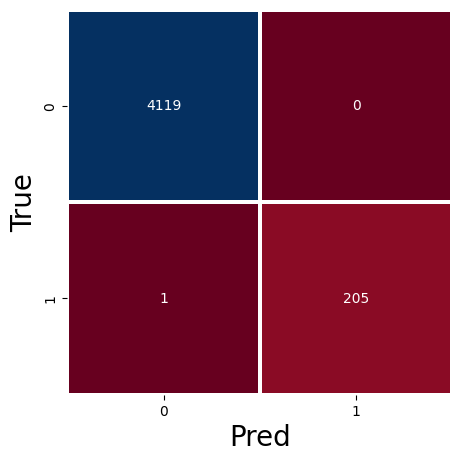

acc = 0.9997687861271676
precision = 1.0
TPR = 0.9951456310679612
FAR = 0.0
FRR = 0.0048543689320388345


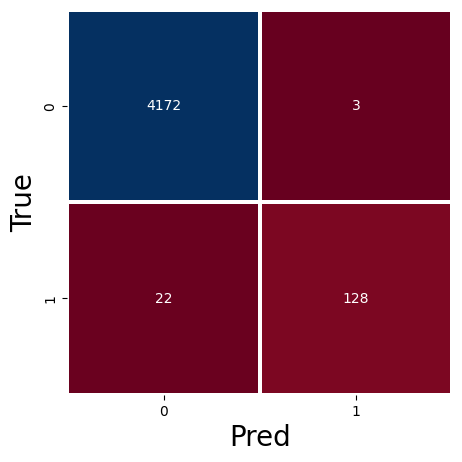

acc = 0.9942196531791907
precision = 0.9770992366412213
TPR = 0.8533333333333334
FAR = 0.000718562874251497
FRR = 0.14666666666666667


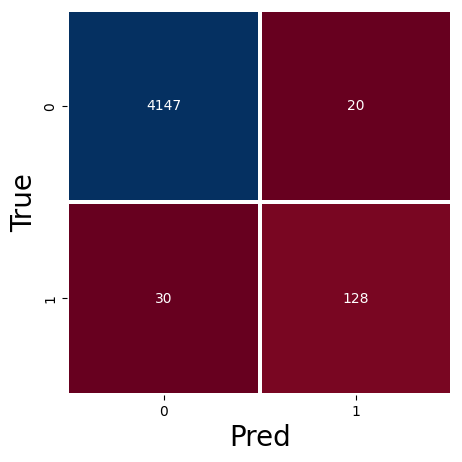

acc = 0.9884393063583815
precision = 0.8648648648648649
TPR = 0.810126582278481
FAR = 0.004799616030717543
FRR = 0.189873417721519
average acc = 0.9937572254335258
average precision = 0.9627716093868802
average TPR = 0.8916360360334096
average FAR = 0.0015056086801418919
average FRR = 0.10836396396659027
average EER = 0.004799616030717543


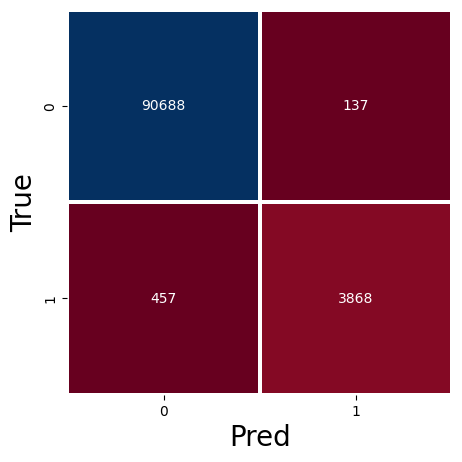

In [15]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        clf1 = DecisionTreeClassifier(criterion='entropy')
        clf2 = RandomForestClassifier(n_estimators=22)
        voting_clf3 = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2)], voting='hard')
        
        voting_clf3.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf3.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


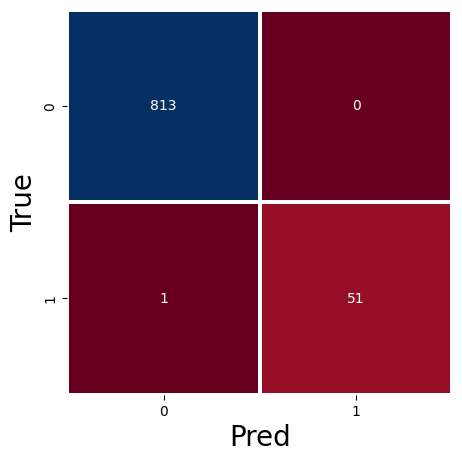

acc = 0.9988439306358381
precision = 1.0
TPR = 0.9807692307692307
FAR = 0.0
FRR = 0.019230769230769232


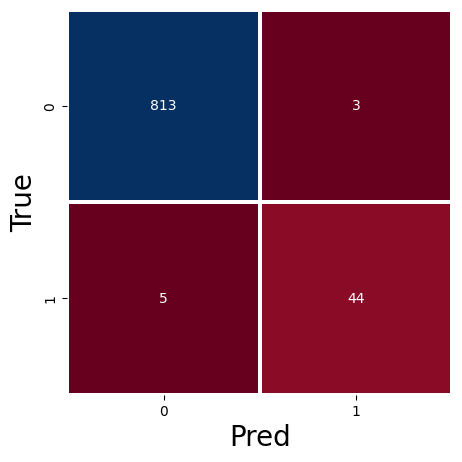

acc = 0.9907514450867052
precision = 0.9361702127659575
TPR = 0.8979591836734694
FAR = 0.003676470588235294
FRR = 0.10204081632653061


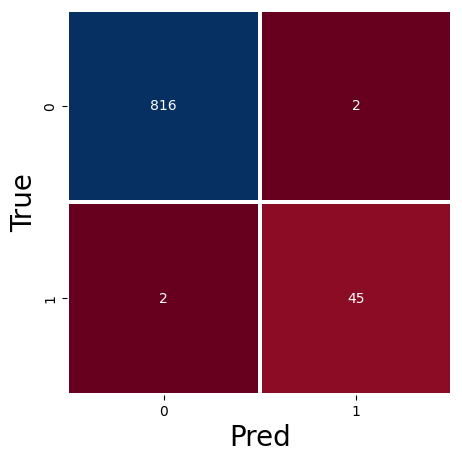

acc = 0.9953757225433526
precision = 0.9574468085106383
TPR = 0.9574468085106383
FAR = 0.0024449877750611247
FRR = 0.0425531914893617


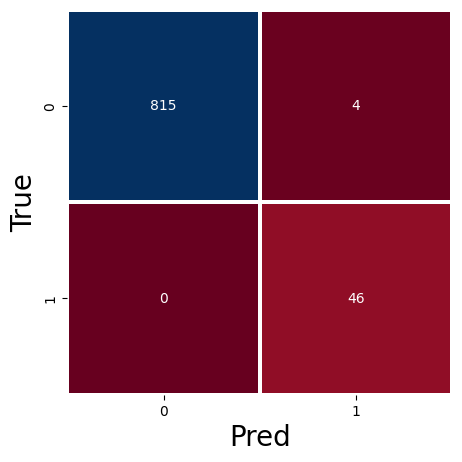

acc = 0.9953757225433526
precision = 0.92
TPR = 1.0
FAR = 0.004884004884004884
FRR = 0.0


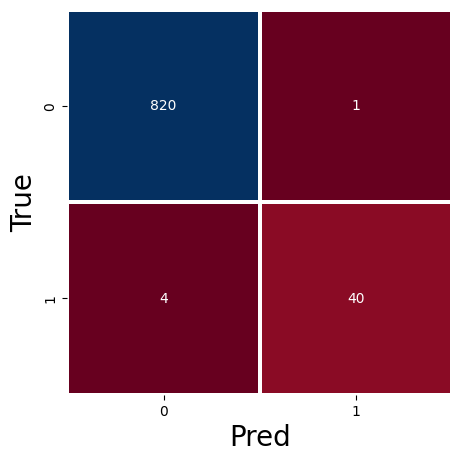

acc = 0.9942196531791907
precision = 0.975609756097561
TPR = 0.9090909090909091
FAR = 0.001218026796589525
FRR = 0.09090909090909091


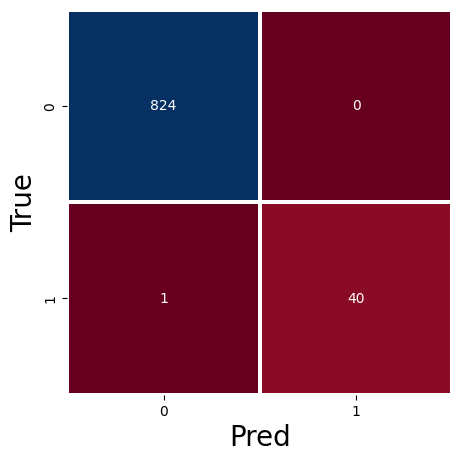

acc = 0.9988439306358381
precision = 1.0
TPR = 0.975609756097561
FAR = 0.0
FRR = 0.024390243902439025


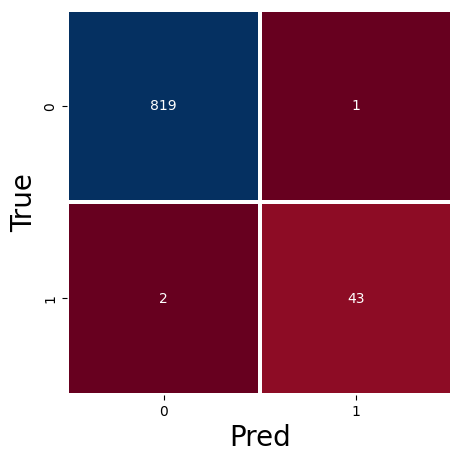

acc = 0.9965317919075144
precision = 0.9772727272727273
TPR = 0.9555555555555556
FAR = 0.0012195121951219512
FRR = 0.044444444444444446


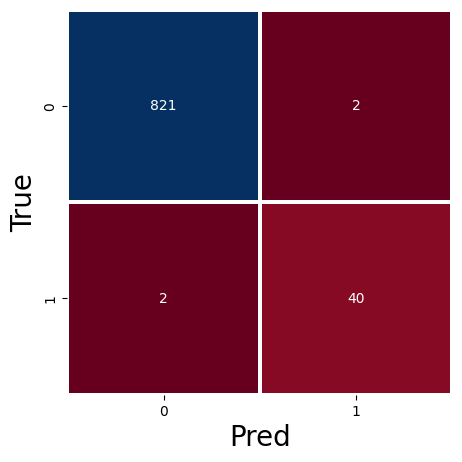

acc = 0.9953757225433526
precision = 0.9523809523809523
TPR = 0.9523809523809523
FAR = 0.002430133657351154
FRR = 0.047619047619047616


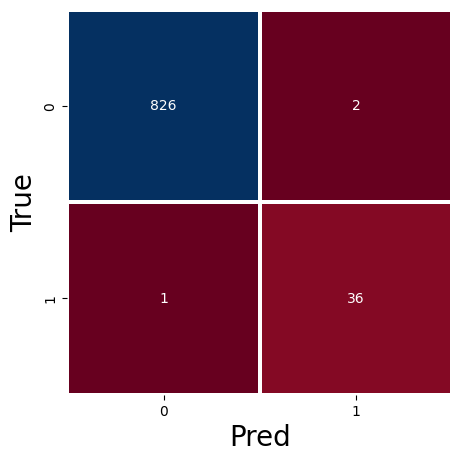

acc = 0.9965317919075144
precision = 0.9473684210526315
TPR = 0.972972972972973
FAR = 0.0024154589371980675
FRR = 0.02702702702702703


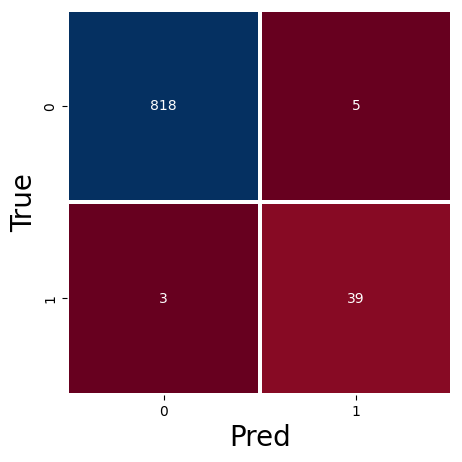

acc = 0.9907514450867052
precision = 0.8863636363636364
TPR = 0.9285714285714286
FAR = 0.006075334143377886
FRR = 0.07142857142857142


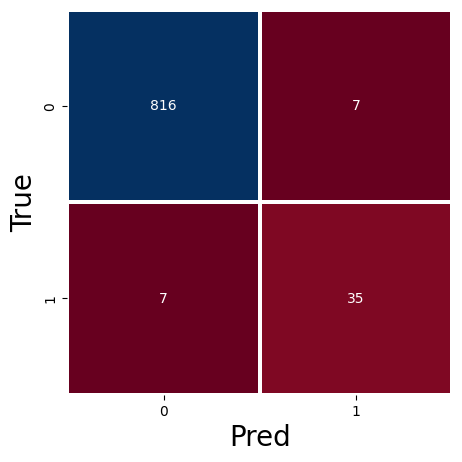

acc = 0.9838150289017341
precision = 0.8333333333333334
TPR = 0.8333333333333334
FAR = 0.00850546780072904
FRR = 0.16666666666666666


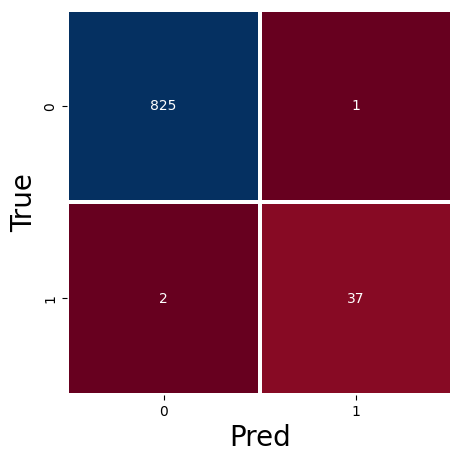

acc = 0.9965317919075144
precision = 0.9736842105263158
TPR = 0.9487179487179487
FAR = 0.0012106537530266344
FRR = 0.05128205128205128


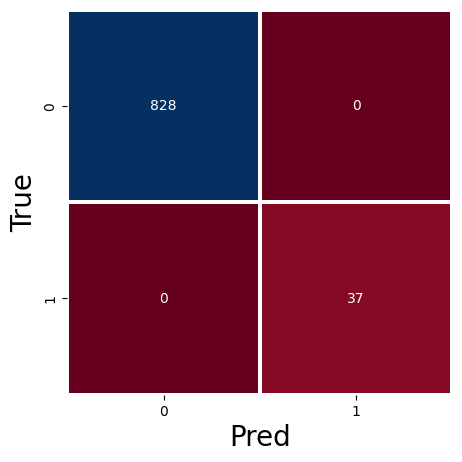

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


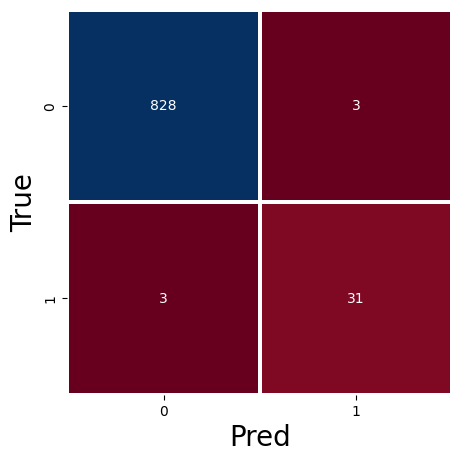

acc = 0.9930635838150289
precision = 0.9117647058823529
TPR = 0.9117647058823529
FAR = 0.0036101083032490976
FRR = 0.08823529411764706


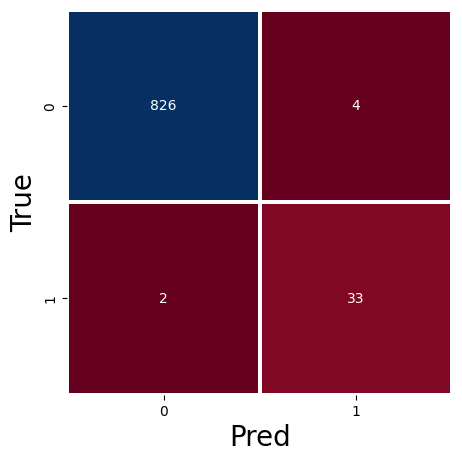

acc = 0.9930635838150289
precision = 0.8918918918918919
TPR = 0.9428571428571428
FAR = 0.004819277108433735
FRR = 0.05714285714285714


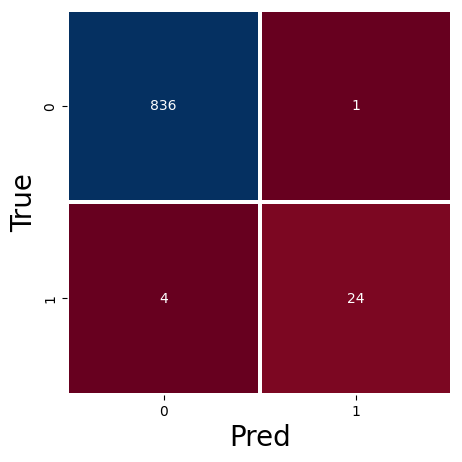

acc = 0.9942196531791907
precision = 0.96
TPR = 0.8571428571428571
FAR = 0.0011947431302270011
FRR = 0.14285714285714285


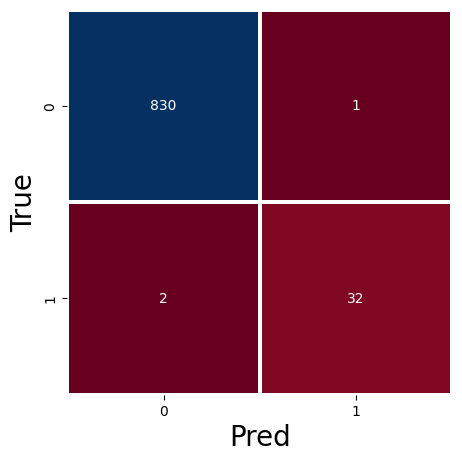

acc = 0.9965317919075144
precision = 0.9696969696969697
TPR = 0.9411764705882353
FAR = 0.0012033694344163659
FRR = 0.058823529411764705


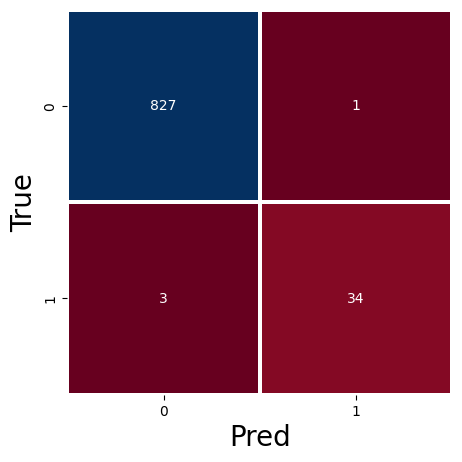

acc = 0.9953757225433526
precision = 0.9714285714285714
TPR = 0.918918918918919
FAR = 0.0012077294685990338
FRR = 0.08108108108108109


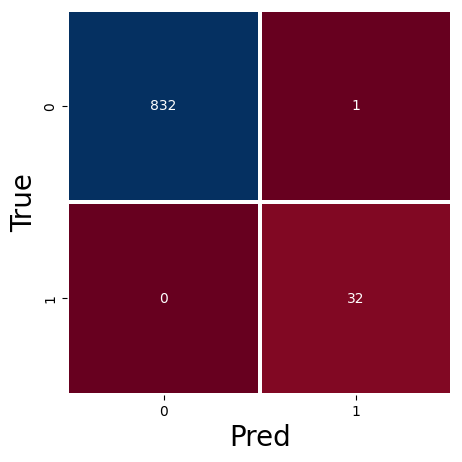

acc = 0.9988439306358381
precision = 0.9696969696969697
TPR = 1.0
FAR = 0.0012004801920768306
FRR = 0.0


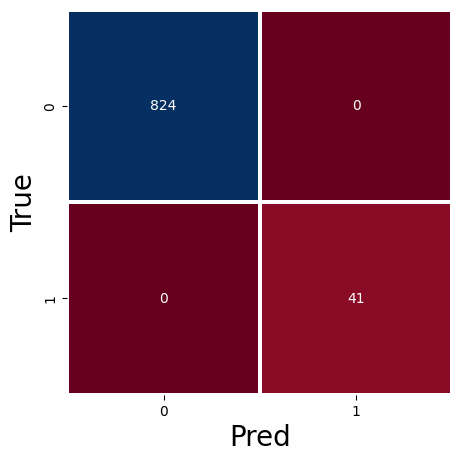

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


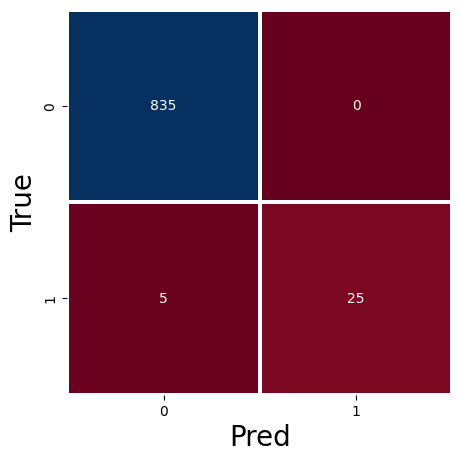

acc = 0.9942196531791907
precision = 1.0
TPR = 0.8333333333333334
FAR = 0.0
FRR = 0.16666666666666666


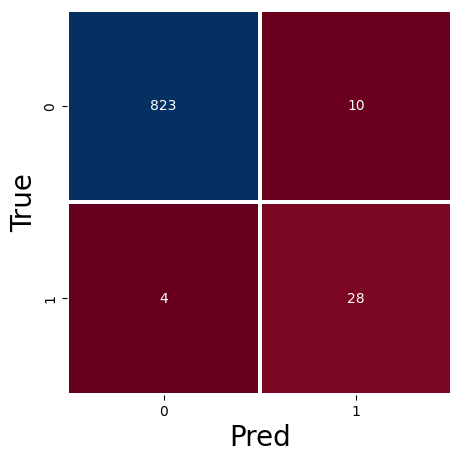

acc = 0.9838150289017341
precision = 0.7368421052631579
TPR = 0.875
FAR = 0.012004801920768308
FRR = 0.125
average acc = 0.9946400420388861
average precision = 0.944134148734712
average TPR = 0.9360273412907656
average FAR = 0.00269638909493027
average FRR = 0.06397265870923453
average EER = 0.012004801920768308


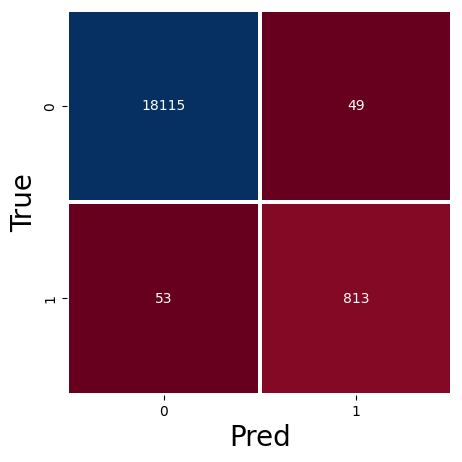

In [5]:
#Truly train the RF models that are going to be used

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

i=0
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    #print(X_train.shape)
    #print(X_re.shape)
    #k_fold = KFold(5, shuffle=True, random_state=42)
    '''
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        
    
        RF = RandomForestClassifier(n_estimators=22)

        RF.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = RF.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    '''
    RF_model = RandomForestClassifier(n_estimators=22)
    RF_model.fit(X_re,y_re)
    
    import pickle
    pickle.dump(RF_model, open(f"./models/rf{i}.pickle", "wb"))
    
    y_pred = RF_model.predict(X_test)
    predicted_targets = np.append(predicted_targets, y_pred)
    actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))

    initial_types = [
        ('input_data_type', FloatTensorType([None, 54]))
    ]

    converted_model = convert_sklearn(RF_model, initial_types=initial_types)
    with open(f"./models/model{i}.onnx", "wb") as f:
        f.write(converted_model.SerializeToString())
    i+=1
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


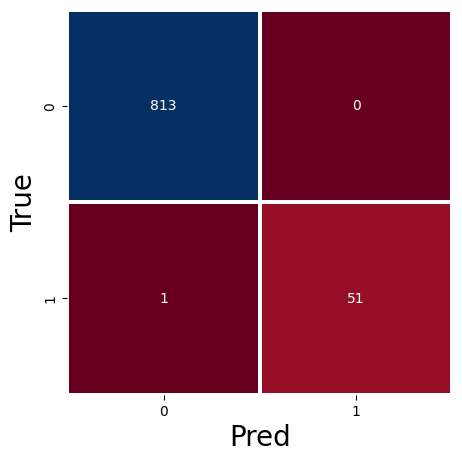

acc = 0.9988439306358381
precision = 1.0
TPR = 0.9807692307692307
FAR = 0.0
FRR = 0.019230769230769232


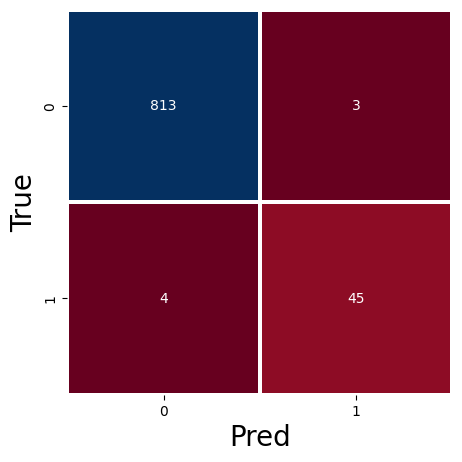

acc = 0.991907514450867
precision = 0.9375
TPR = 0.9183673469387755
FAR = 0.003676470588235294
FRR = 0.08163265306122448


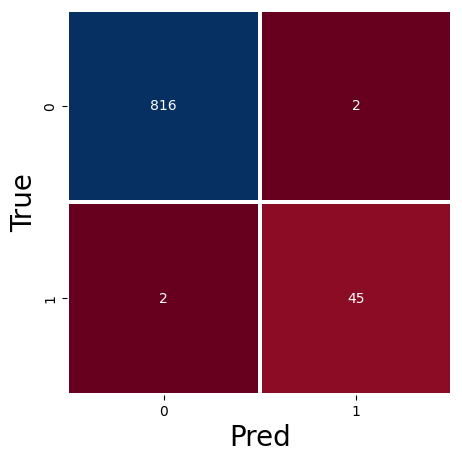

acc = 0.9953757225433526
precision = 0.9574468085106383
TPR = 0.9574468085106383
FAR = 0.0024449877750611247
FRR = 0.0425531914893617


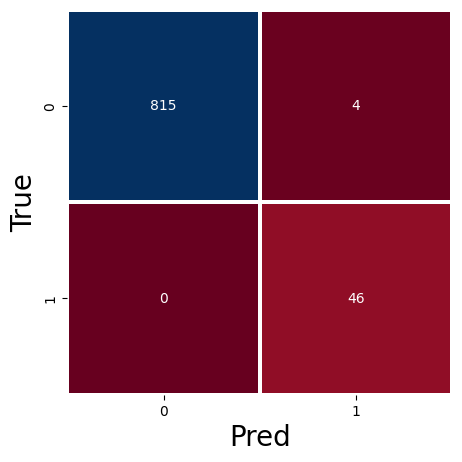

acc = 0.9953757225433526
precision = 0.92
TPR = 1.0
FAR = 0.004884004884004884
FRR = 0.0


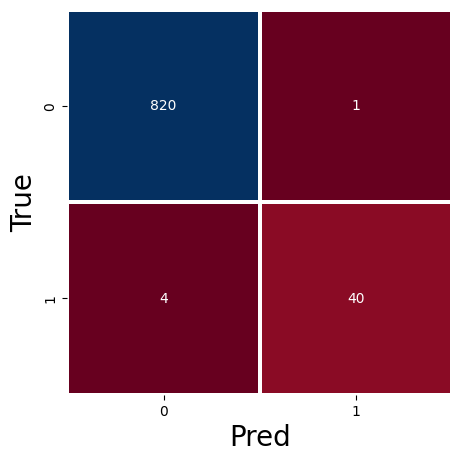

acc = 0.9942196531791907
precision = 0.975609756097561
TPR = 0.9090909090909091
FAR = 0.001218026796589525
FRR = 0.09090909090909091


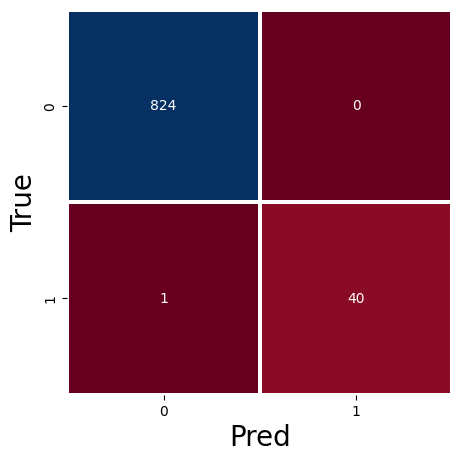

acc = 0.9988439306358381
precision = 1.0
TPR = 0.975609756097561
FAR = 0.0
FRR = 0.024390243902439025


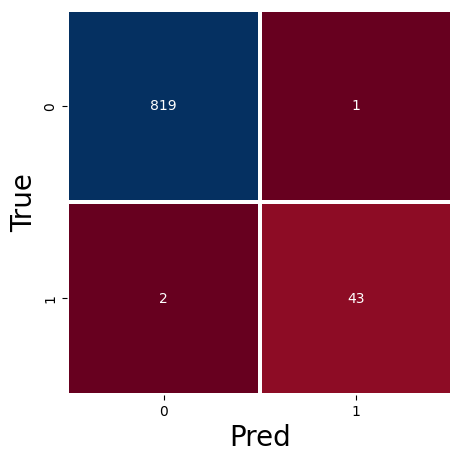

acc = 0.9965317919075144
precision = 0.9772727272727273
TPR = 0.9555555555555556
FAR = 0.0012195121951219512
FRR = 0.044444444444444446


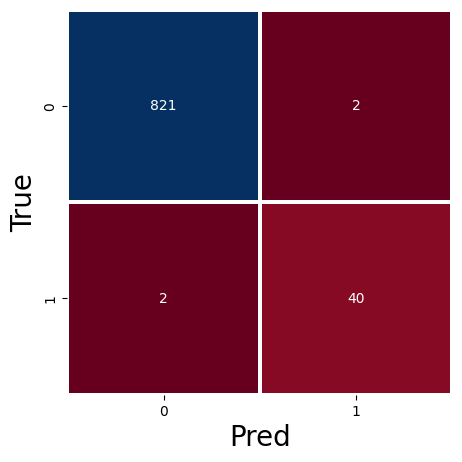

acc = 0.9953757225433526
precision = 0.9523809523809523
TPR = 0.9523809523809523
FAR = 0.002430133657351154
FRR = 0.047619047619047616


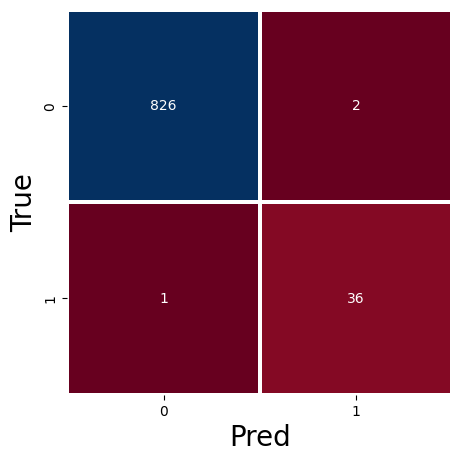

acc = 0.9965317919075144
precision = 0.9473684210526315
TPR = 0.972972972972973
FAR = 0.0024154589371980675
FRR = 0.02702702702702703


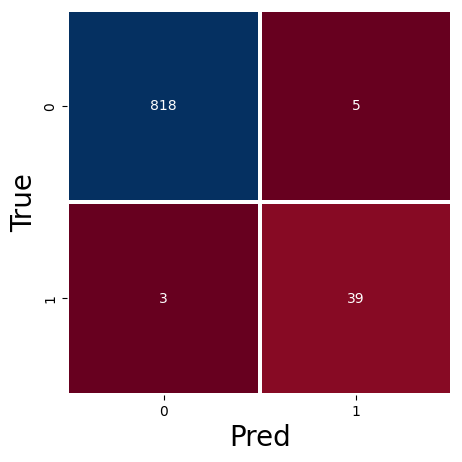

acc = 0.9907514450867052
precision = 0.8863636363636364
TPR = 0.9285714285714286
FAR = 0.006075334143377886
FRR = 0.07142857142857142


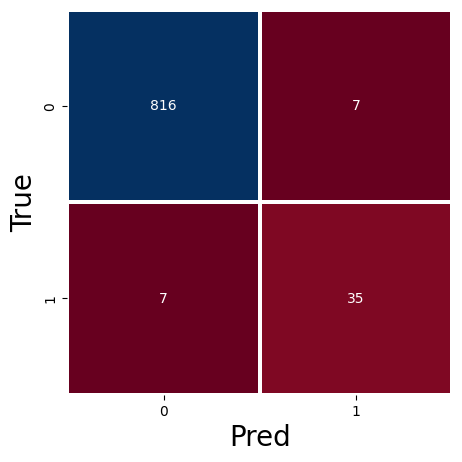

acc = 0.9838150289017341
precision = 0.8333333333333334
TPR = 0.8333333333333334
FAR = 0.00850546780072904
FRR = 0.16666666666666666


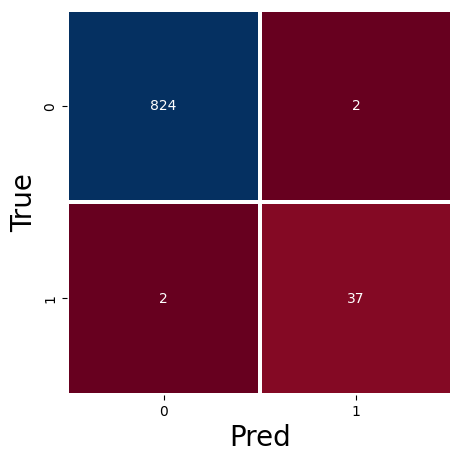

acc = 0.9953757225433526
precision = 0.9487179487179487
TPR = 0.9487179487179487
FAR = 0.002421307506053269
FRR = 0.05128205128205128


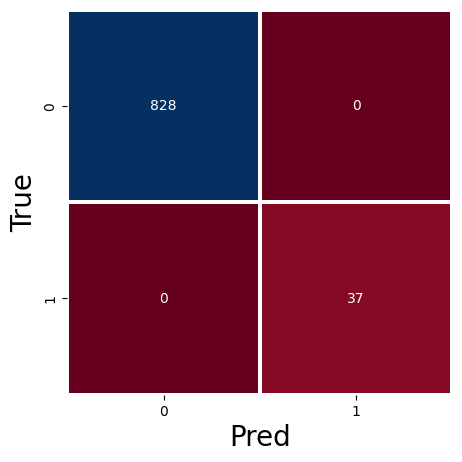

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


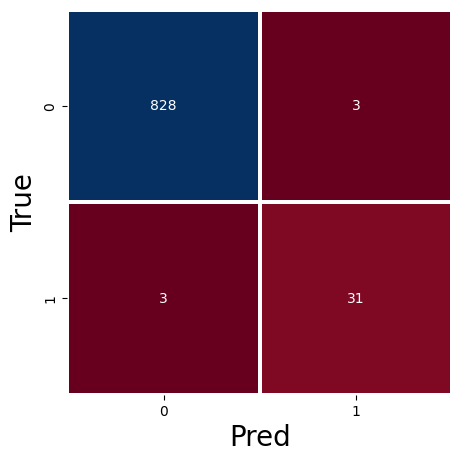

acc = 0.9930635838150289
precision = 0.9117647058823529
TPR = 0.9117647058823529
FAR = 0.0036101083032490976
FRR = 0.08823529411764706


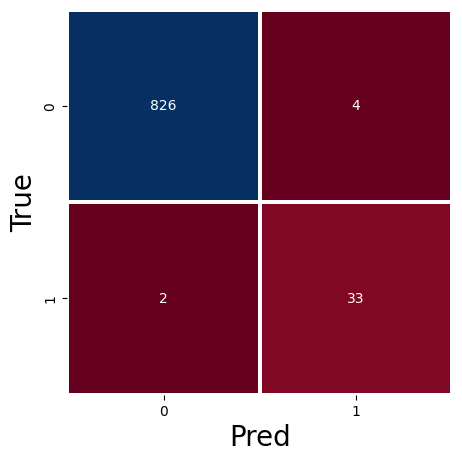

acc = 0.9930635838150289
precision = 0.8918918918918919
TPR = 0.9428571428571428
FAR = 0.004819277108433735
FRR = 0.05714285714285714


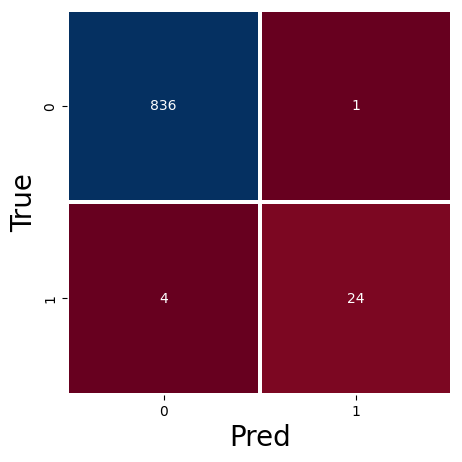

acc = 0.9942196531791907
precision = 0.96
TPR = 0.8571428571428571
FAR = 0.0011947431302270011
FRR = 0.14285714285714285


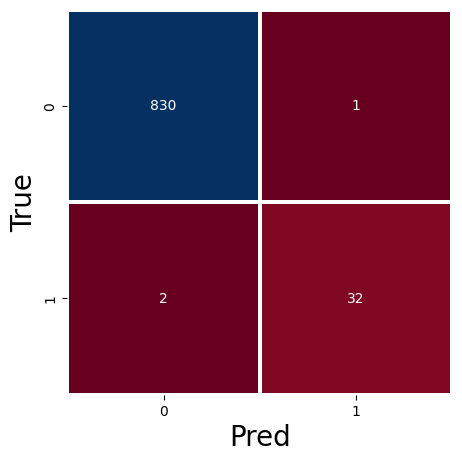

acc = 0.9965317919075144
precision = 0.9696969696969697
TPR = 0.9411764705882353
FAR = 0.0012033694344163659
FRR = 0.058823529411764705


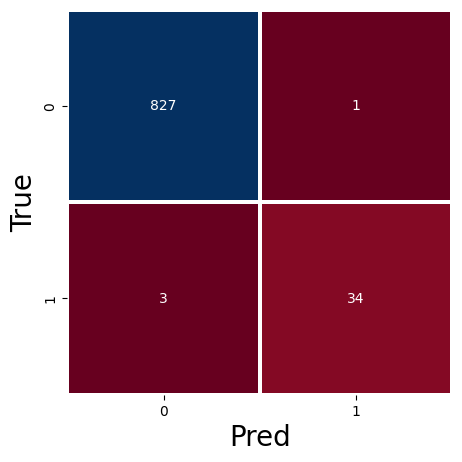

acc = 0.9953757225433526
precision = 0.9714285714285714
TPR = 0.918918918918919
FAR = 0.0012077294685990338
FRR = 0.08108108108108109


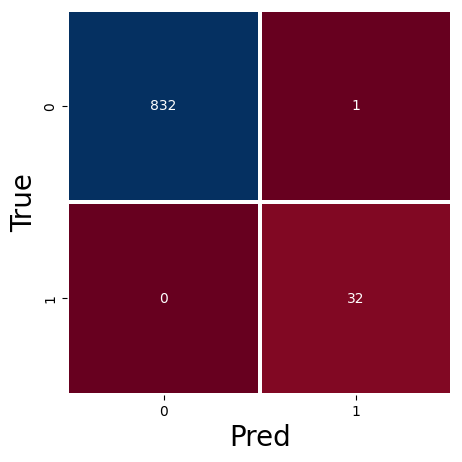

acc = 0.9988439306358381
precision = 0.9696969696969697
TPR = 1.0
FAR = 0.0012004801920768306
FRR = 0.0


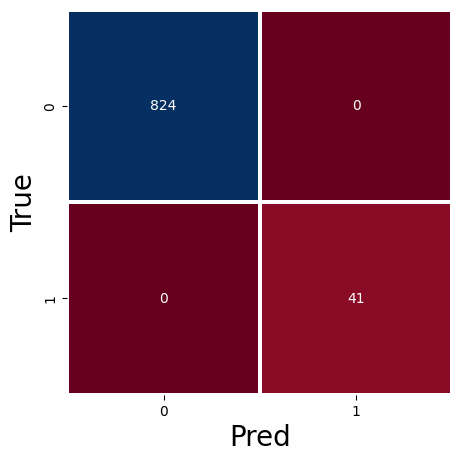

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


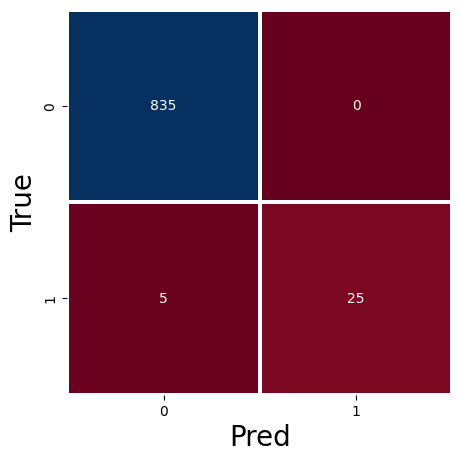

acc = 0.9942196531791907
precision = 1.0
TPR = 0.8333333333333334
FAR = 0.0
FRR = 0.16666666666666666


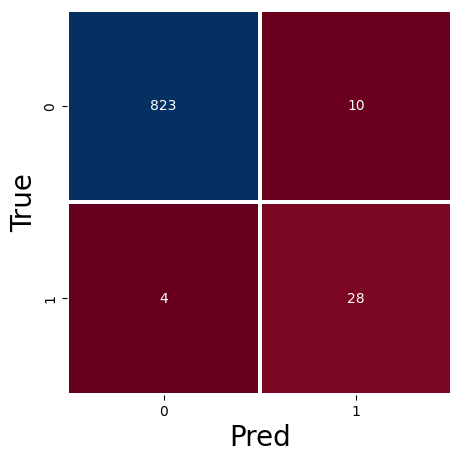

acc = 0.9838150289017341
precision = 0.7368421052631579
TPR = 0.875
FAR = 0.012004801920768308
FRR = 0.125
average acc = 0.9946400420388861
average precision = 0.9430597635267882
average TPR = 0.9369549850755522
average FAR = 0.002751418810976935
average FRR = 0.06304501492444789
average EER = 0.012004801920768308


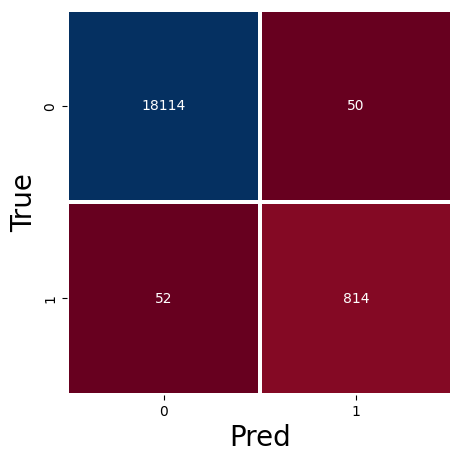

In [6]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as rt

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

i=0
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    '''
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        sess = rt.InferenceSession(
            f"./models/model{i}.onnx", providers=rt.get_available_providers())
        input_name = sess.get_inputs()[0].name
        #print(X_test.astype(np.float32).to_dict('split')['data'])
        #break
        y_pred = sess.run(None, {input_name: X_test.astype(np.float32).to_dict('split')['data']})[0]

        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    i+=1
    '''
    
    sess = rt.InferenceSession(
            f"./models/model{i}.onnx", providers=rt.get_available_providers())
    input_name = sess.get_inputs()[0].name
        #print(X_test.astype(np.float32).to_dict('split')['data'])
        #break
    y_pred = sess.run(None, {input_name: X_test.astype(np.float32).to_dict('split')['data']})[0]
    i+=1
    predicted_targets = np.append(predicted_targets, y_pred)
    actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()
